### **``Exploration Notebook``** 
``Equity Impact on Employee Attrition in the Workplace``

``Created by: Mijail Q. Mariano``

``13AUGUST2022``

----

In [1]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# numpy import
import numpy as np
import random

# importing acquire module
import acquire

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "darkgrid")

# plotly/visual import
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# file cleaning modules
from skimpy import clean_columns

# scipy import
# import scipy.stats as stats
# from math import sqrt

# importing datetime module
# import datetime


from sklearn.model_selection import train_test_split

# sklearn data science library
# from sklearn.impute import KNNImputer
# from sklearn.impute import MissingIndicator
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.metrics import mean_squared_error
# from sklearn.impute import IterativeImputer
# from sklearn.cluster import KMeans

# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.feature_selection import SelectKBest, RFE, f_regression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection import permutation_importance

----
#### **``Initial Planning/Ideas``**

Individual Data Science Project:

Mijail Mariano

August 13th 2022

**<u>``1. Formulating the question``</u>**

``This question should be:``

* About social equity or of similar importance (i.e., inequality, racial discrimination, social-mobility, equal opportunity)
* The question is to be freamed in a way that can be quantitatively measured in terms of organizational value & also raises the question around -  “How equal/diverse or fair is an organization's current workplace?”

**target variable: "Attrition"**

**<u>``2. Exploration questions``</u>**

**``What are you attempting to predict/help to address:``**

``Employee/Company Attrition Rate``

* What is company attrition?
* Why is company attrition important?
* What are the employee attrition demographics?
* Are there pros to attrition? If so, what are these?

**``What specifically are you attempting to investigate/understand:``**

``Equity in the workplace and its impact on attrition``

*Ok, but what specifically?...*

``Do socioeconomic/location factors such as:``

* Where an employee is from/grows-up (County level) impact whether or not they remain with a company?
* The high-school graduation rate
* Incarceration/prison rate
* Fraction of population married by 35 years old
* Poverty rate
* Teenage birth rate

``Are there other questions that may be important to answer?``

How much does an employee's geographical background (where they are from) impact their decision to remain or leave the company?
Are there socioeconomic/employee demographic differences between those employees who leave the company and those who remain? (descriptive/summary statistics)

**<u>``3. Methodology``</u>**

**``Note:``** 

For this project I am assuming the company's geographical location to be New York City, NY and that employees are only from counties within the three (3) tri-state areas. This includes counties solely from the state's of Connecticut, New Jersey, and New York. To conduct the analysis I will also use a random generator to blindly assign birthplace/locations where employees grew-up and the socioeconomic variables from those locations to statistically explore these variables.

``Where’s the data from?``

To conduct this analysis and potentially generate a predictive company attrition model I combine real socioeconomic and economic data from Harvard’s Opportunity Atlast with an artificially created 2017 IBM Human Resources Kaggle dataset of a small-medium sized company (~1500 records). .

The Opportunity Atlas is a collaborative social equality project through Harvard University, the US Census Bureau, and the US Internal Revenue Service. The initiative’s aim is to track and plot socioeconomic data by exact US states, counties, cities, and neighborhoods in order to understand the childrens’ outcomes and prospect of social mobility. 

*The Atlas is composed of ~21mil Americans born between 1978-1983 who are in their mid-late thirties today. The platform and estimates are based on:

* The 2000 and 2010 Decennial Census short form
* Federal income tax returns for 1989, 1994, 1995, and 1998-2015
* Data from the American Community Survey

<u>Reference Links:</u>
* https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
* https://www.opportunityatlas.org/

``Why couldn’t you use a real dataset?``

Given the sensitive nature of real employee information, it is relatively difficult to attain similar publicly available data from businesses. Additionally, since it is not common for organizations to collect similar socioeconomic information/drivers that I attempt to investigate - the combination of synthetic and real data seemed like an adequate method for scientific testing.

``So how should I think about this data?``

You can think about this data and the subsequent estimates as a way to understand how geographical/environmental characteristics potentially play a role in employee tenure. Additionally, these estimates may also help organizations to understand potential employee equity differences in order to address them and successfully retain essential employees. 

``Why might these employees decide to leave their company?`` 

(said another way)....
How might these demographic differences contribute to an employee’s decision to stay or leave their company?

Ok, so what happens if employers don’t retain these employees?

**<u>``4. What can employers do to retain these employees?``</u>**

(placeholder for recommendations)


``Opportunity Atlas (Equity DF): features/variables``

1. High_School_Graduation_Rate_rP_gP_pall\
Fraction of children who grew up in this area with a high school degree or a GED. Estimates have a margin of error; for example, standard error at county level for children with parents at 25th percentile is 1% pooling race and gender groups and 3% for black men. This outcome is available only at the county (not tract) level due to small sample sizes. (Source: American Community Survey)

2. Household_Income_at_Age_35_rP_gP_pall\
Average annual household income in 2014-15 for children (now in their mid-30s) who grew up in this area. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is $1,917 pooling race and gender groups and $2,721 for black men. (Source: Federal income tax records)

3. Incarceration_Rate_rP_gP_pall\
Fraction of children who grew up in this area who were in prison or jail on April 1, 2010. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 1% pooling race and gender groups and 4% for black men. (Source: 2010 Decennial Census)

4. Fraction_Married_at_Age_35_rP_gP_pall\
Fraction of children who grew up in this area who are married in 2015 (in their mid-30s). Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 3% pooling race and gender groups and 4% for black men. (Source: Income Tax Records)

5. Poverty_Rate_in_2012-16\
Fraction of all residents of this area with household incomes below the federal poverty line in 2012-16. (Source: American Community Survey.)

6. Teenage_Birth_Rate_women_only_rP_gF_pall\
Fraction of women who grew up in this area who claimed ever a child who was born when the women were between the ages of 13 and 19 as a dependent when filing taxes. Estimates have a margin of error; for example, standard error at tract level for children with parents at 25th percentile is 4% pooling race groups and 6% for black women. (Source: Income Tax Records)


``IBM Dataset: features/variables``
1. Age
2. Attrition
3. BusinessTravel
4. DailyRate
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. EmployeeNumber
11. EnvironmentSatisfaction
12. Gender
13. HourlyRate
14. JobInvolvement
15. JobLevel
16. JobRole
17. JobSatisfaction
18. MaritalStatus
19. MonthlyIncome
20. MonthlyRate
21. NumCompaniesWorked
22. Over18
23. OverTime
24. PercentSalaryHike
25. PerformanceRating
26. RelationshipSatisfaction
27. StandardHours
28. StockOptionLevel
29. TotalWorkingYears
30. TrainingTimesLastYear
31. WorkLifeBalance
32. YearsAtCompany
33. YearsInCurrentRole
34. YearsSinceLastPromotion
35. YearsWithCurrManager


----

### **``Data Acquisition and Preparation``**

In [2]:
# let's import the IBM employee data first

ibm_df = pd.read_csv("/Users/mijailmariano/Desktop/IBM_HR-Employee-Attrition.csv")
print()
print(f'IBM dataset shape: {ibm_df.shape}')
ibm_df.head()


IBM dataset shape: (1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [3]:
# let's import the opportunity atlas data

equity_df = pd.read_csv("/Users/mijailmariano/Desktop/equity_table.csv")
print()
print(f'Equity dataset shape: {equity_df.shape}')
equity_df.head()


Equity dataset shape: (17, 12)


county_name state       cty  distance  household_income_at_35  \
0     Bergen County    NJ  cty34003  19 miles                   63424   
1      Bronx County    NY  cty36005  10 miles                   32542   
2      Essex County    NJ  cty34013  20 miles                   43298   
3  Fairfield County    CT  cty09001  30 miles                   55614   
4     Hudson County    NJ  cty34017   9 miles                   41374   

   high-school_graduation_rate  percentage_married_by_35  incarceration_rate  \
0                         0.94                      0.51                0.00   
1                         0.78                      0.22                0.02   
2                         0.89                      0.33                0.02   
3                         0.92                      0.46                0.01   
4                         0.87                      0.35                0.01   

   women_teenage_birthrate  poverty_rate  employment_rates_at_35yrs  \
0                     0.04          0.07                       0.80   
1                     0.28          0.31                       0.74   
2                     0.20          0.17                       0.78   
3                     0.09          0.09                       0.79   
4                     0.19          0.18                       0.78   

   single_parent_frac  
0                0.20  
1                0.59  
2                0.43  
3                0.26  
4                0.37

In [4]:
# replacing/removing the word "miles" in distance

# equity_df["distance"] = equity_df["distance"].str.replace("miles", "").astype(int)
# equity_df.dtypes.sort_values()

In [5]:
# number of unique county distances

# equity_df["distance"].nunique()

In [6]:
# let's use pandas' qcut method to parse out distance groups

# intervals = pd.Series(pd.cut(
#         equity_df["distance"], 
#         bins = equity_df["distance"].nunique(), 
#         duplicates = "drop").sort_values().tolist())

# intervals.unique()

In [7]:
# viewing counties by distance sorted

# equity_df[["county_name", "distance"]].sort_values("distance")

In [8]:
# setting counties by distance
# [(0.971, 3.9], (3.9, 6.8], (6.8, 9.7], (9.7, 12.6], (18.4, 21.3], (24.2, 27.1], (27.1, 30.0]]

# area_one = equity_df[equity_df["distance"] <= 5].county_name.tolist()
# area_two = equity_df[(equity_df["distance"] > 5) & (equity_df["distance"] <= 10)].county_name.tolist()
# area_three = equity_df[(equity_df["distance"] > 10) & (equity_df["distance"] <= 21)].county_name.tolist()
# area_four = equity_df[(equity_df["distance"] > 21) & (equity_df["distance"] <= 27)].county_name.tolist()
# area_five = equity_df[(equity_df["distance"] > 27) & (equity_df["distance"] <= 30)].county_name.tolist()

# print(area_one)
# print('----------------------------------------------------')
# print(area_two)
# print('----------------------------------------------------')
# print(area_three)
# print('----------------------------------------------------')
# print(area_four)
# print('----------------------------------------------------')
# print(area_five)

In [9]:
# creating a function to randomly apply county based on the employee's distance from home

def get_county(x, lst_a, lst_b, lst_c, lst_d, lst_e):
        '''where x = employees' work distance from home in miles. 
        function will iterate through all records and randomly assign a county based on distance from work.'''
        lst = []

        if x <= 5:
                county = random.choice(lst_a)
                lst.append(county)

        elif x > 5 and x <= 10:
                county = random.choice(lst_b)
                lst.append(county)

        elif x > 10 and x <= 21:
                county = random.choice(lst_c)
                lst.append(county)
        
        elif x > 27 and x <= 30:
                county = random.choice(lst_e)
                lst.append(county)

        else:
                county = lst_d[0]
                lst.append(county)

        # returning the list of counties
        return lst

In [10]:
# creating a random generated county list 

# random.seed(548)
# county_lst = ibm_df["DistanceFromHome"].apply(get_county, args = (area_one, area_two, area_three, area_four, area_five))
# # let's flatten the county list
# county_lst = [val for sublist in county_lst for val in sublist]
# county_lst[:5]

In [11]:
# let's create a pandas series and assign the county list to the ibm dataframe

# county_lst = pd.Series(county_lst)
# county_lst.shape

In [12]:
# assigning the county series to the ibm dataframe

# ibm_df["county_name"] = county_lst
# ibm_df.head() # checks out!

In [13]:
# merging the two tables/dfs on county name
# bringing over socioeconomic data from equity_df 

# emp_df = ibm_df.merge(
#     equity_df,
#     how = "left",
#     left_on = "county_name",
#     right_on = "county_name"
# ).drop(columns = "distance")

# emp_df.head() # checks out!

In [14]:
# catching the dataframe

# emp_df.to_csv("/Users/mijailmariano/codeup-data-science/drivers_of_workplace_equity/emp_df.csv", index = False)

In [15]:
# importing the dataframe 

df = acquire.get_employee_df()
df.head()

df shape: (1470, 46)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager      county_name state  \
0                        0                     5     Kings County    NY   
1                        1                     7     Bronx County    NY   
2                        0                     0     Kings County    NY   
3                        3                     0     Kings County    NY   
4                        2                     2  New York County    NY   

        cty  household_income_at_35  high-school_graduation_rate  \
0  cty36047                   37229                         0.84   
1  cty36005       

In [16]:
# can consider removing/dropping the following features/columns
# "over_18": all employees meet this criteria
# "employee_count": redundant information

df = acquire.clean_employee_df(df)
df.head()

df shape: (1470, 43)


age  attrition    business_travel  daily_rate              department  \
1   41       True      Travel_Rarely        1102                   Sales   
2   49      False  Travel_Frequently         279  Research & Development   
4   37       True      Travel_Rarely        1373  Research & Development   
5   33      False  Travel_Frequently        1392  Research & Development   
7   27      False      Travel_Rarely         591  Research & Development   

   distance_from_home education education_field environment_satisfaction  \
1                   1         2   Life Sciences                        2   
2                   8         1   Life Sciences                        3   
4                   2         2           Other                        4   
5                   3         4   Life Sciences                        4   
7                   2         1         Medical                        1   

   gender  hourly_rate job_involvement job_level               job_role  \
1  Female           94               3         2        Sales Executive   
2    Male           61               2         2     Research Scientist   
4    Male           92               2         1  Laboratory Technician   
5  Female           56               3         1     Research Scientist   
7    Male           40               3         1  Laboratory Technician   

  job_satisfaction marital_status  monthly_income  monthly_rate  \
1                4         Single            5993         19479   
2                2        Married            5130         24907   
4                3         Single            2090          2396   
5                3        Married            2909         23159   
7                2        Married            3468         16632   

   num_companies_worked over_time  percent_salary_hike performance_rating  \
1                     8       Yes                   11                  3   
2                     1        No                   23                  4   
4                     6       Yes                   15                  3   
5                     1       Yes                   11                  3   
7                     9        No                   12                  3   

  relationship_satisfaction standard_hours stock_option_level  \
1                         1             80                  0   
2                         4             80                  1   
4                         2             80                  0   
5                         3             80                  0   
7                         4             80                  1   

   total_working_years  training_times_last_year work_life_balance  \
1                    8                         0                 1   
2                   10                         3                 3   
4                    7                         3                 3   
5                    8                         3                 3   
7                    6                         3                 3   

   years_at_company  years_in_current_role  years_since_last_promotion  \
1                 6                      4                           0   
2                10                      7                           1   
4                 0                      0                           0   
5                 8                      7                           3   
7                 2                      2                           2   

   years_with_curr_manager      county_name state       cty  \
1                        5     Kings County    NY  cty36047   
2                        7     Bronx County    NY  cty36005   
4                        0     Kings County    NY  cty36047   
5                        0     Kings County    NY  cty36047   
7                        2  New York County    NY  cty36061   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   

In [17]:
# let's check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1470 non-null   int64  
 1   attrition                    1470 non-null   bool   
 2   business_travel              1470 non-null   object 
 3   daily_rate                   1470 non-null   int64  
 4   department                   1470 non-null   object 
 5   distance_from_home           1470 non-null   int64  
 6   education                    1470 non-null   object 
 7   education_field              1470 non-null   object 
 8   environment_satisfaction     1470 non-null   object 
 9   gender                       1470 non-null   object 
 10  hourly_rate                  1470 non-null   int64  
 11  job_involvement              1470 non-null   object 
 12  job_level                    1470 non-null   object 
 13  job_role          

In [18]:
# initial summary statistics

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats.sort_index()

count     mean     std      min      25%  \
age                         1470.00    36.92    9.14    18.00    30.00   
daily_rate                  1470.00   802.49  403.51   102.00   465.00   
distance_from_home          1470.00     9.19    8.11     1.00     2.00   
employment_rates_at_35yrs   1470.00     0.76    0.03     0.73     0.73   
high_school_graduation_rate 1470.00     0.86    0.05     0.78     0.81   
hourly_rate                 1470.00    65.89   20.33    30.00    48.00   
household_income_at_35      1470.00 43599.31 8981.27 32542.00 37229.00   
incarceration_rate          1470.00     0.01    0.00     0.00     0.01   
monthly_income              1470.00  6502.93 4707.96  1009.00  2911.00   
monthly_rate                1470.00 14313.10 7117.79  2094.00  8047.00   
num_companies_worked        1470.00     2.69    2.50     0.00     1.00   
percent_salary_hike         1470.00    15.21    3.66    11.00    12.00   
percentage_married_by_35    1470.00     0.35    0.08     0.22     0.29   
poverty_rate                1470.00     0.17    0.06     0.05     0.13   
single_parent_frac          1470.00     0.35    0.09     0.16     0.30   
total_working_years         1470.00    11.28    7.78     0.00     6.00   
training_times_last_year    1470.00     2.80    1.29     0.00     2.00   
women_teenage_birthrate     1470.00     0.17    0.06     0.04     0.12   
years_at_company            1470.00     7.01    6.13     0.00     3.00   
years_in_current_role       1470.00     4.23    3.62     0.00     2.00   
years_since_last_promotion  1470.00     2.19    3.22     0.00     0.00   
years_with_curr_manager     1470.00     4.12    3.57     0.00     2.00   

                                 50%      75%      max    range  
age                            36.00    43.00    60.00    42.00  
daily_rate                    802.00  1157.00  1499.00  1397.00  
distance_from_home              7.00    14.00    29.00    28.00  
employment_rates_at_35yrs       0.74     0.78     0.82     0.09  
high_school_graduation_rate     0.84     0.91     0.94     0.17  
hourly_rate                    66.00    83.75   100.00    70.00  
household_income_at_35      37826.00 51773.00 65975.00 33433.00  
incarceration_rate              0.01     0.01     0.02     0.02  
monthly_income               4919.00  8379.00 19999.00 18990.00  
monthly_rate                14235.50 20461.50 26999.00 24905.00  
num_companies_worked            2.00     4.00     9.00     9.00  
percent_salary_hike            14.00    18.00    25.00    14.00  
percentage_married_by_35        0.32     0.42     0.54     0.32  
poverty_rate                    0.17     0.23     0.31     0.26  
single_parent_frac              0.34     0.38     0.59     0.43  
total_working_years            10.00    15.00    40.00    40.00  
training_times_last_year        3.00     3.00     6.00     6.00  
women_teenage_birthrate         0.19     0.20     0.28     0.24  
years_at_company                5.00     9.00    40.00    40.00  
years_in_current_role           3.00     7.00    18.00    18.00  
years_since_last_promotion      1.00     3.00    15.00    15.00  
years_with_curr_manager         3.00     7.00    17.00    17.00

In [19]:
# let's loop through and inspect columns and unique values

for col in df.columns:
    print(f'Column: {col.upper()}')
    print(f'Date type: {df[col].dtype}')
    print(f'Missing values: {df[col].isnull().any()}')
    print(f'Number of unique values: {df[col].nunique()}')
    print(f'Data Sample: {list(df[col].head(10).sort_values())}')
    print('-------------------------------------------------------------------')

Column: AGE
Date type: int64
Missing values: False
Number of unique values: 43
Data Sample: [27, 30, 32, 33, 36, 37, 38, 41, 49, 59]
-------------------------------------------------------------------
Column: ATTRITION
Date type: bool
Missing values: False
Number of unique values: 2
Data Sample: [False, False, False, False, False, False, False, False, True, True]
-------------------------------------------------------------------
Column: BUSINESS_TRAVEL
Date type: object
Missing values: False
Number of unique values: 3
Data Sample: ['Travel_Frequently', 'Travel_Frequently', 'Travel_Frequently', 'Travel_Frequently', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely', 'Travel_Rarely']
-------------------------------------------------------------------
Column: DAILY_RATE
Date type: int64
Missing values: False
Number of unique values: 886
Data Sample: [216, 279, 591, 1005, 1102, 1299, 1324, 1358, 1373, 1392]
-------------------------------------------------

<function matplotlib.pyplot.show(close=None, block=None)>

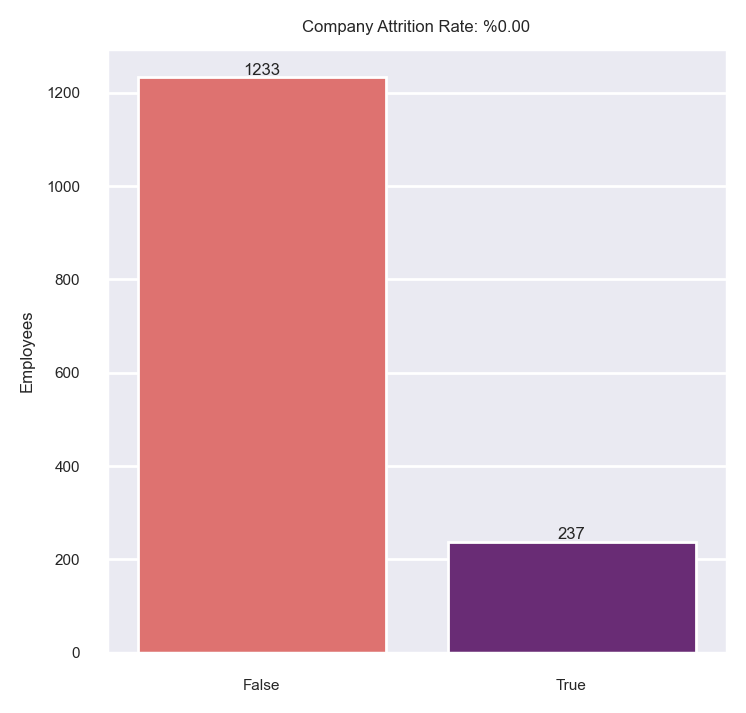

In [20]:
# let's examine the target variable
plt.figure(figsize = (4, 4))
sns.set(font_scale = 0.5)

ax = sns.countplot(df["attrition"].sort_values(), palette="magma_r")

ax.bar_label(ax.containers[0])
plt.title('Company Attrition Rate: %{:.2f}'.format((len(df[df["attrition"] == "Yes"])/df.shape[0])*100))
plt.xlabel(None)
plt.ylabel("Employees")
plt.show

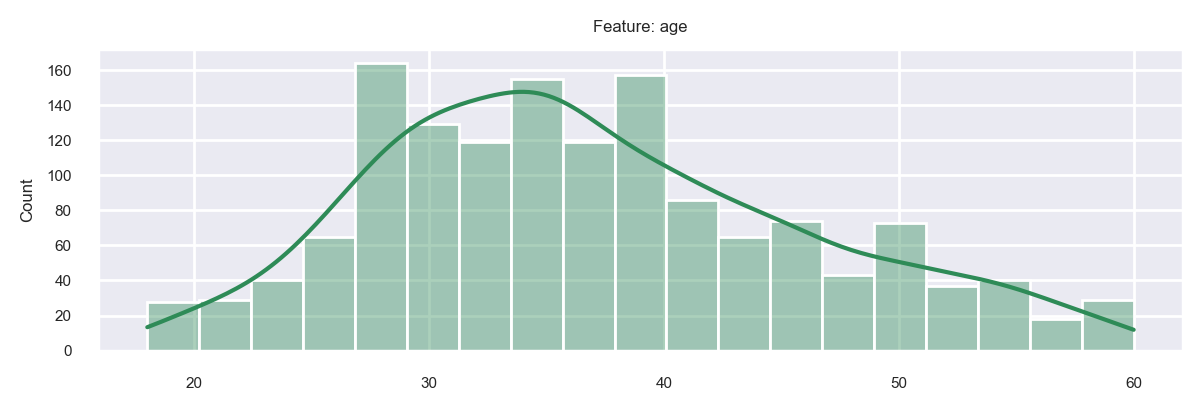

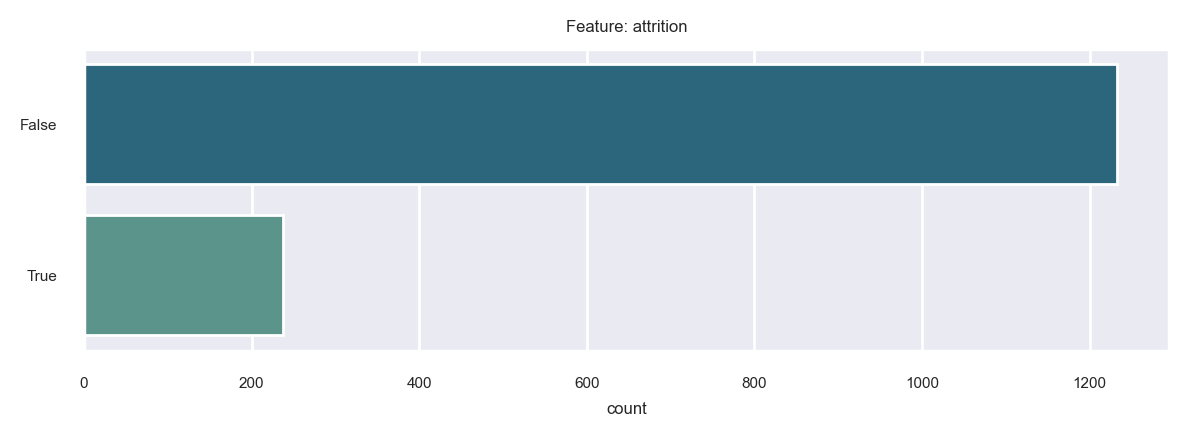

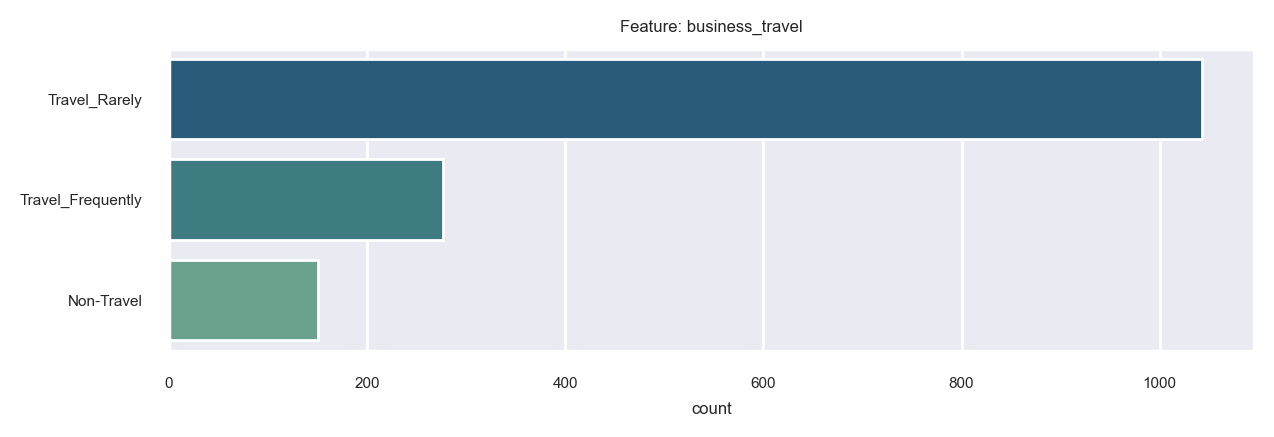

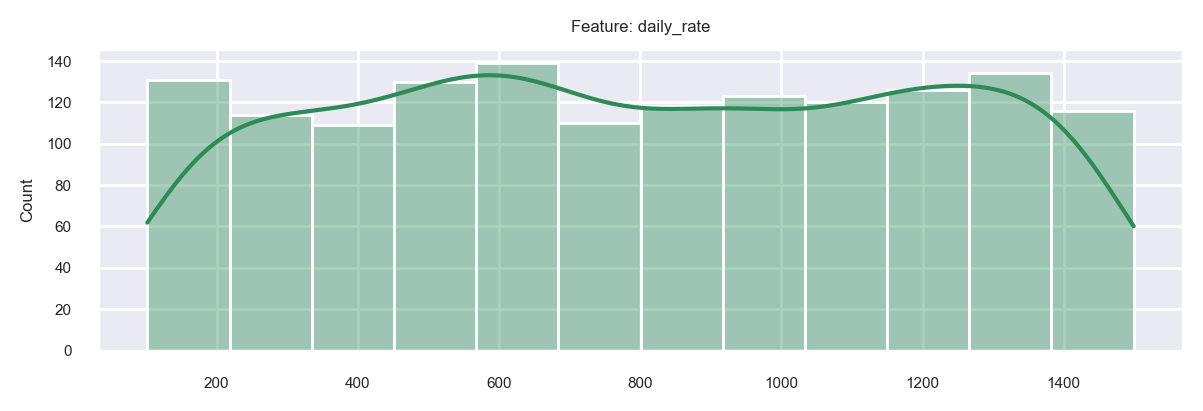

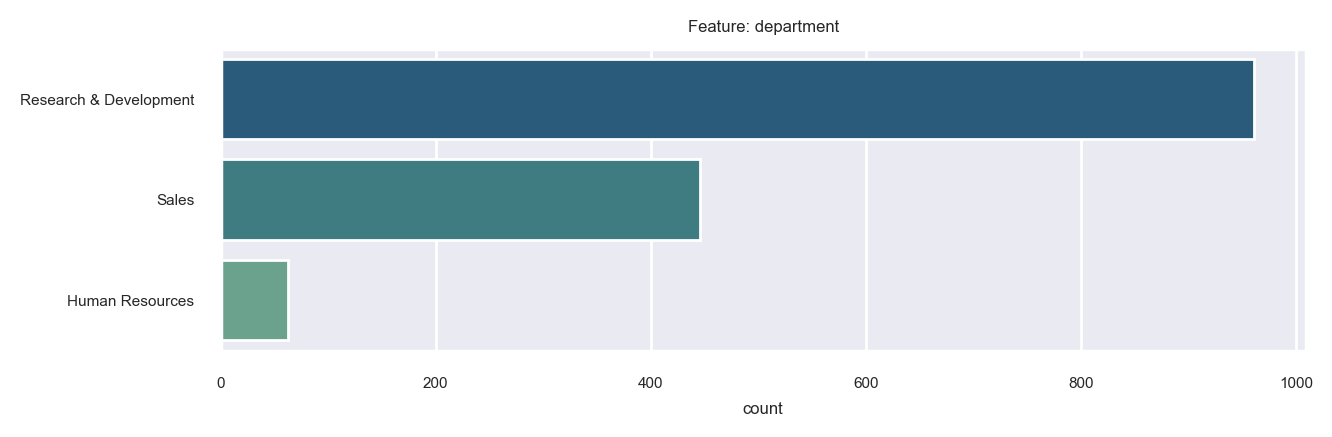

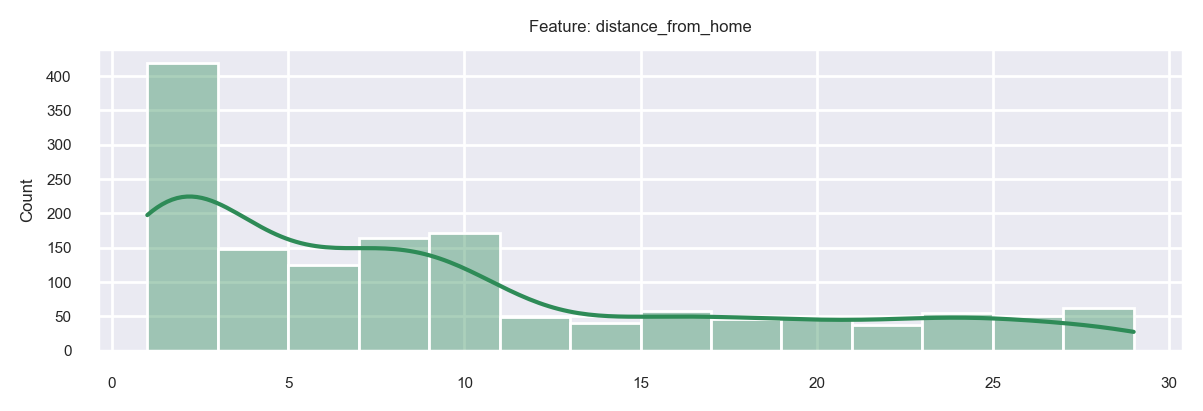

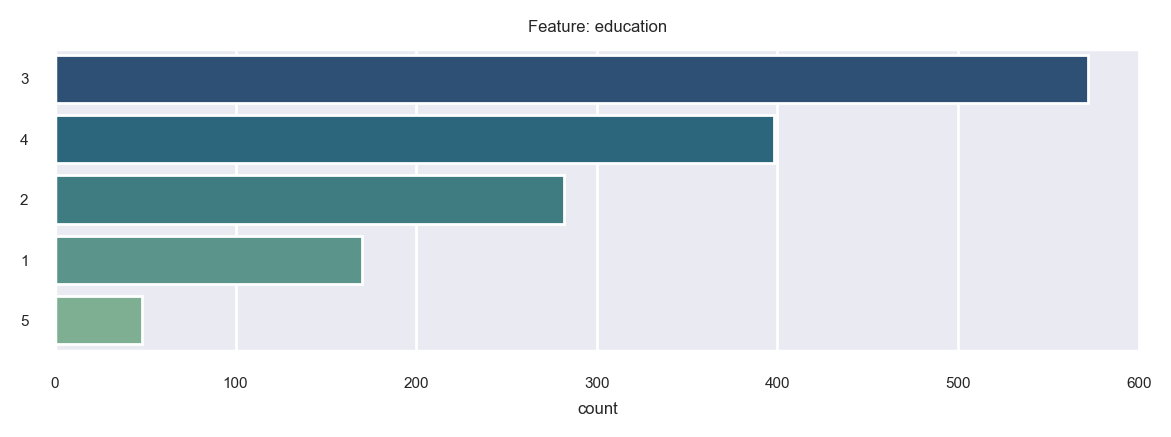

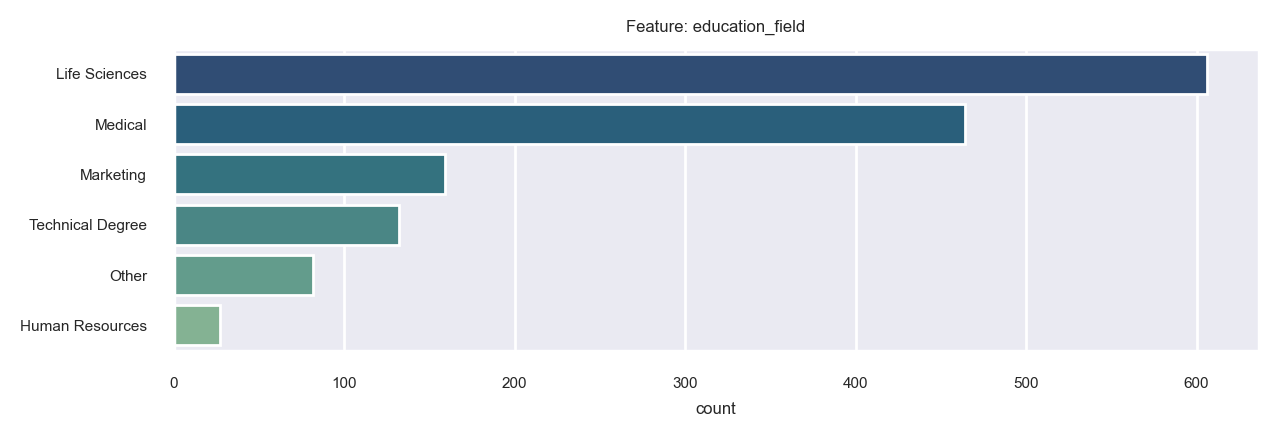

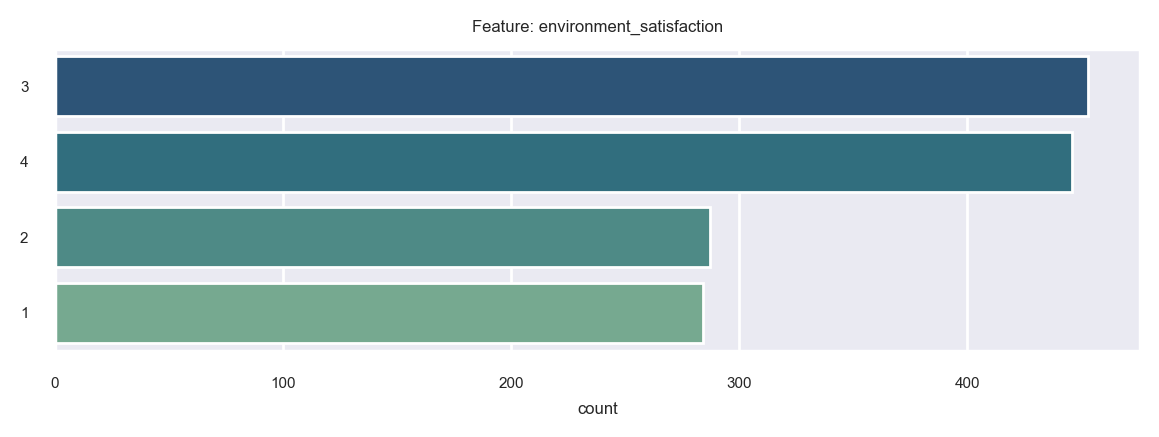

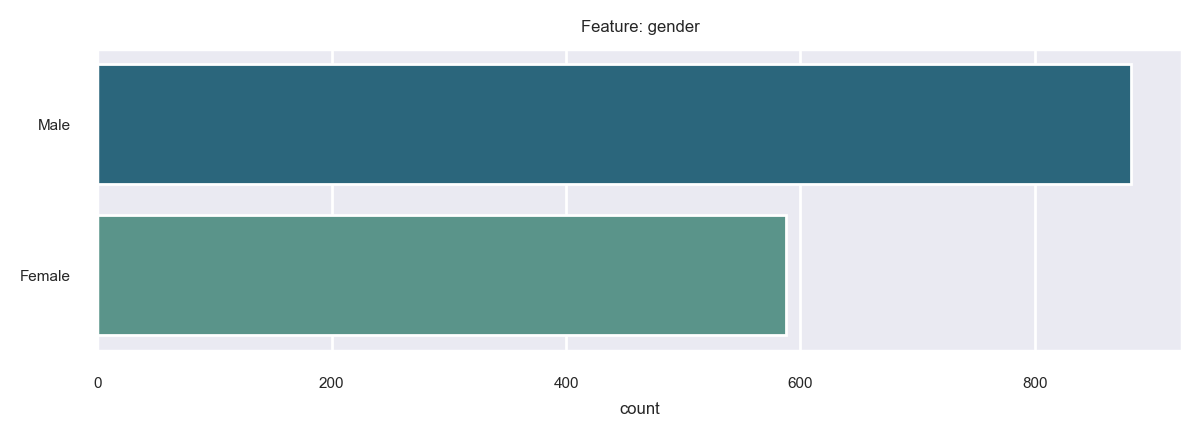

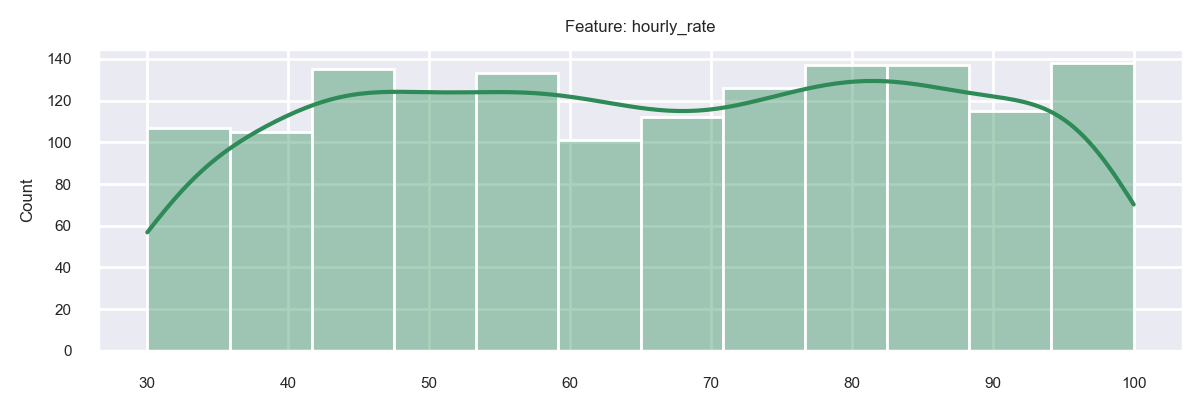

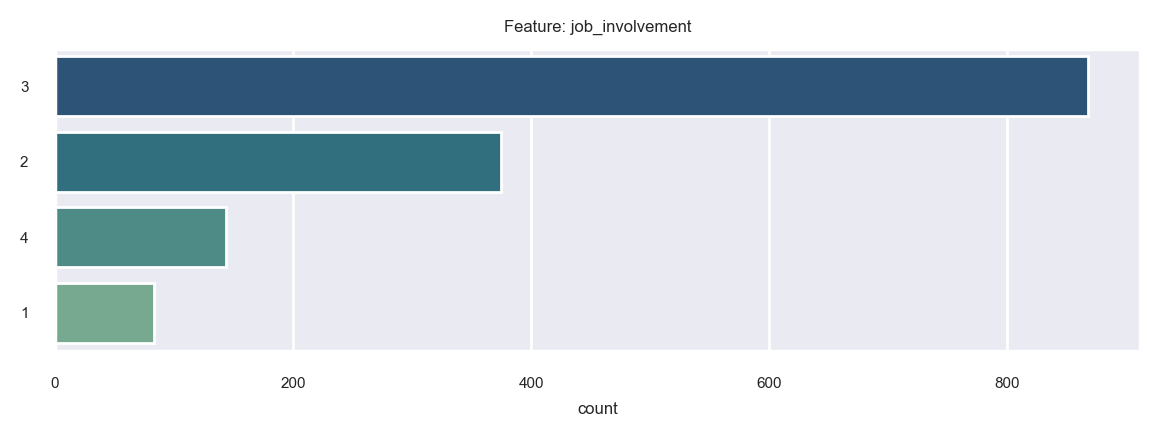

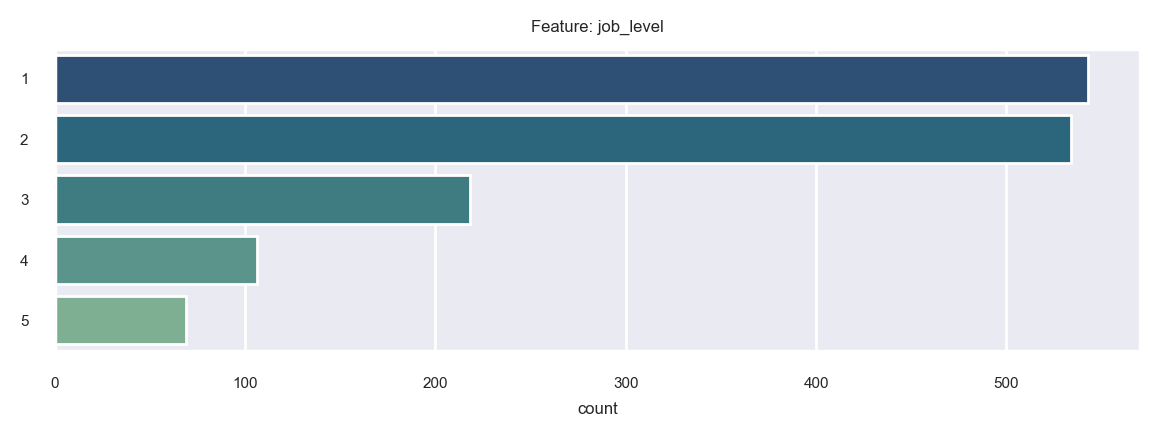

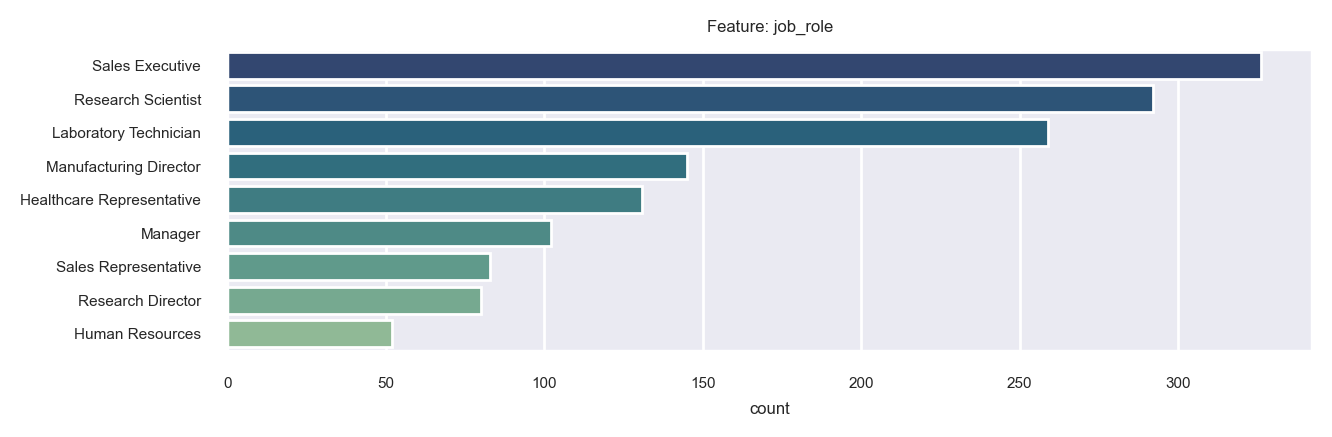

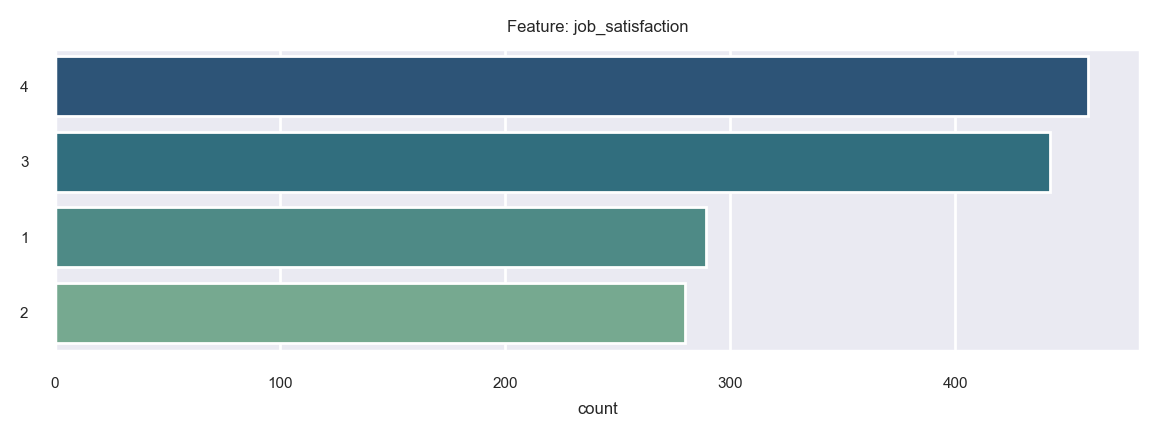

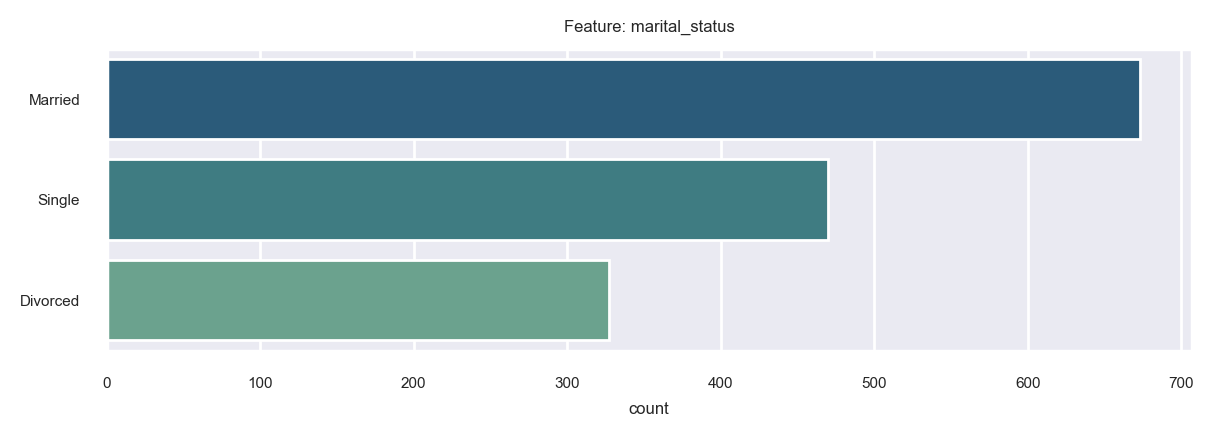

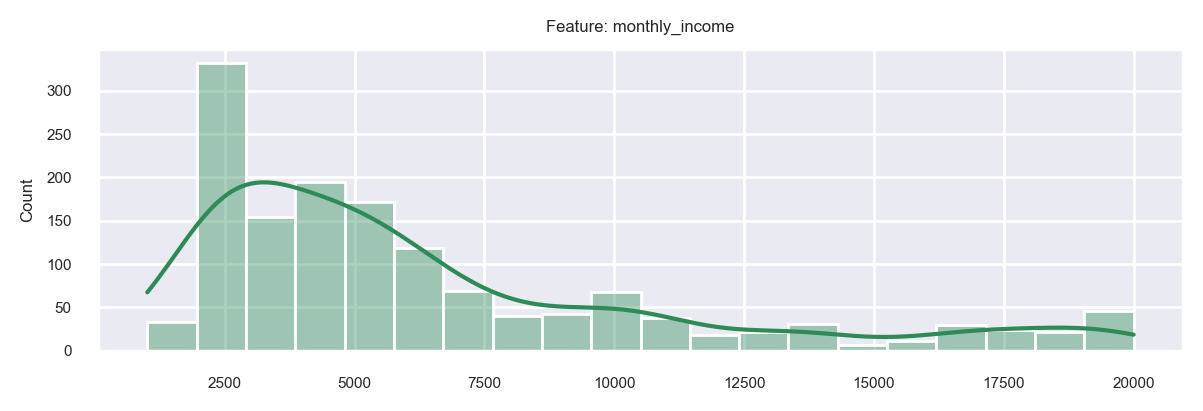

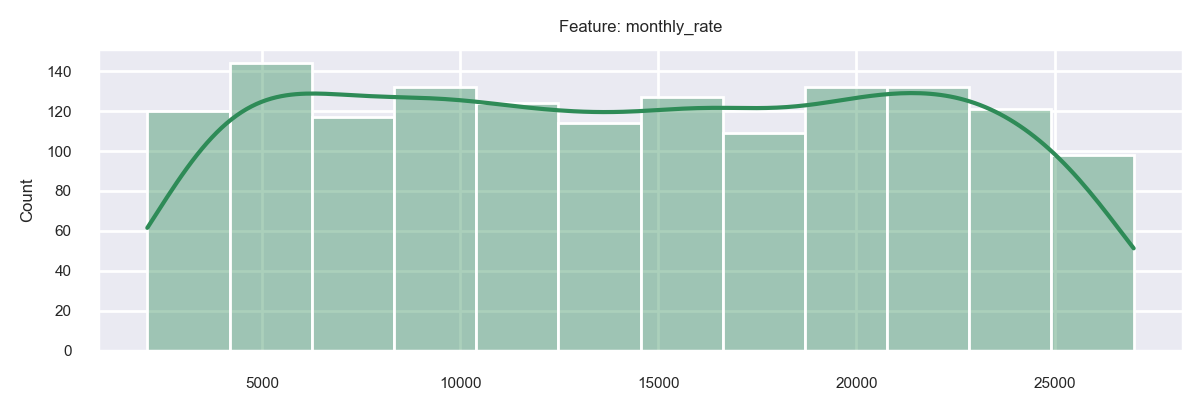

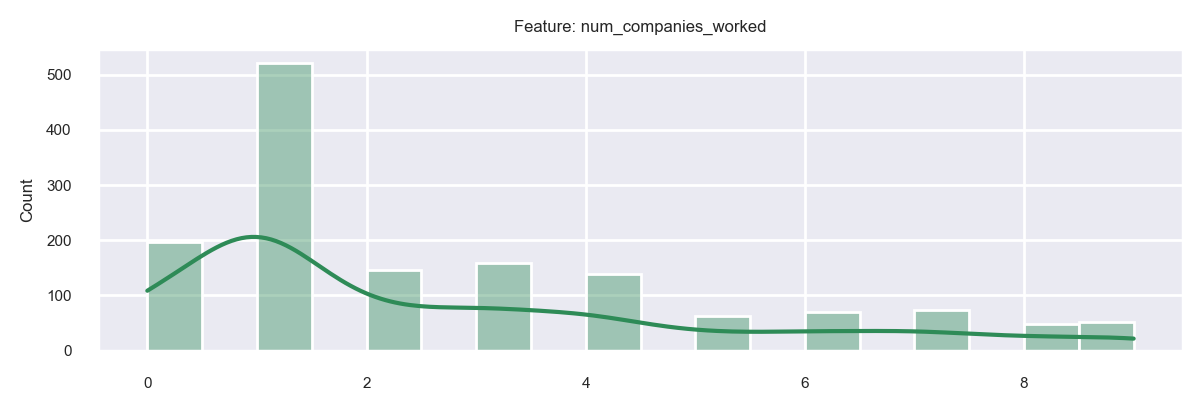

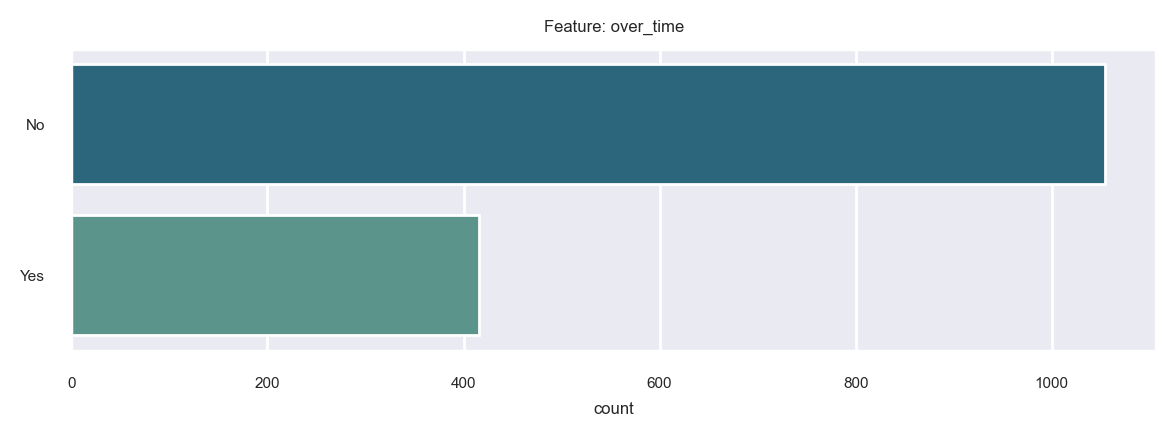

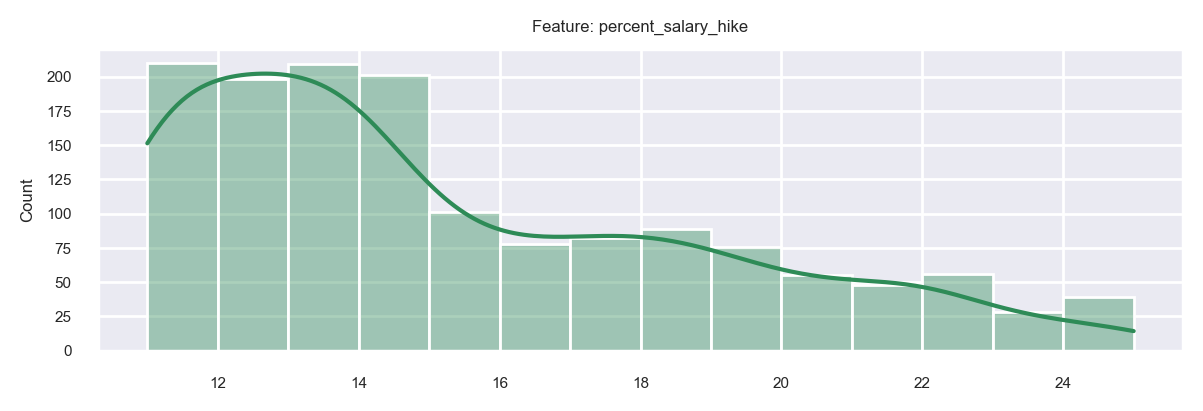

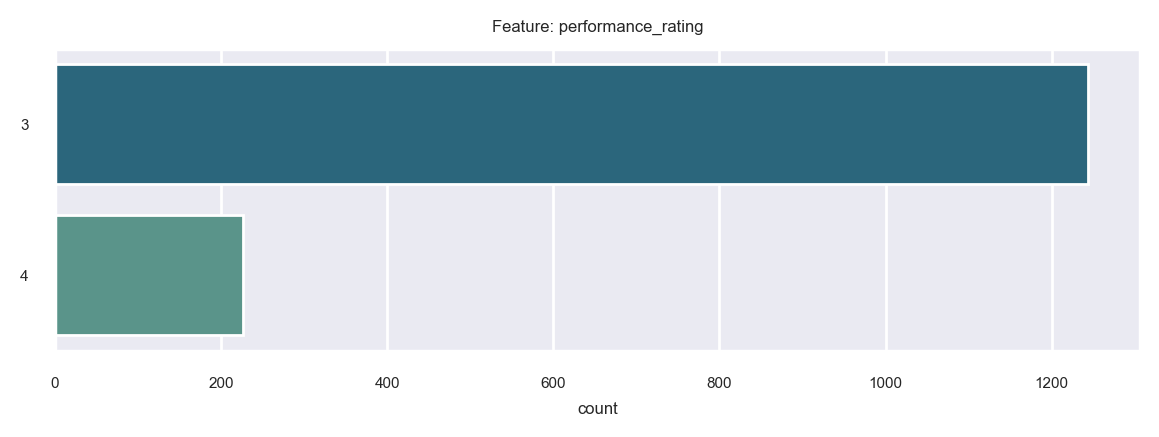

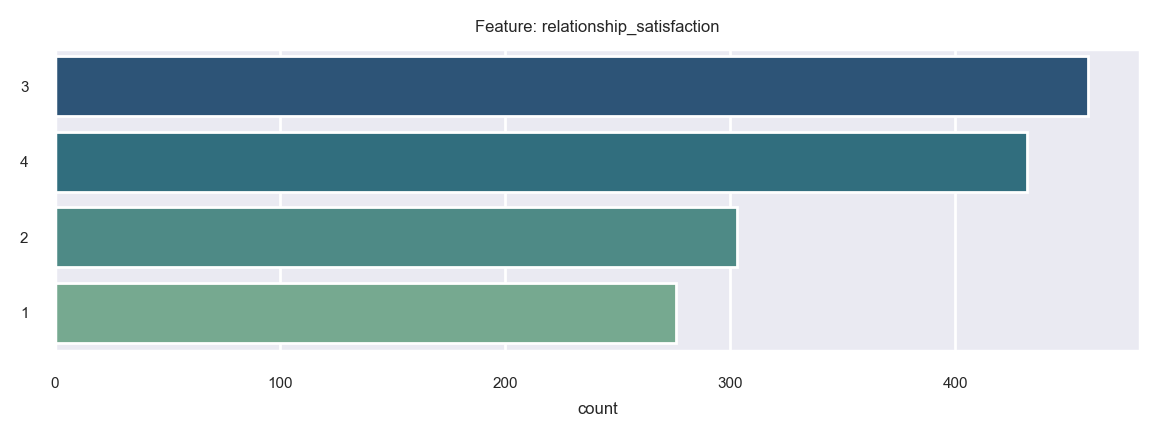

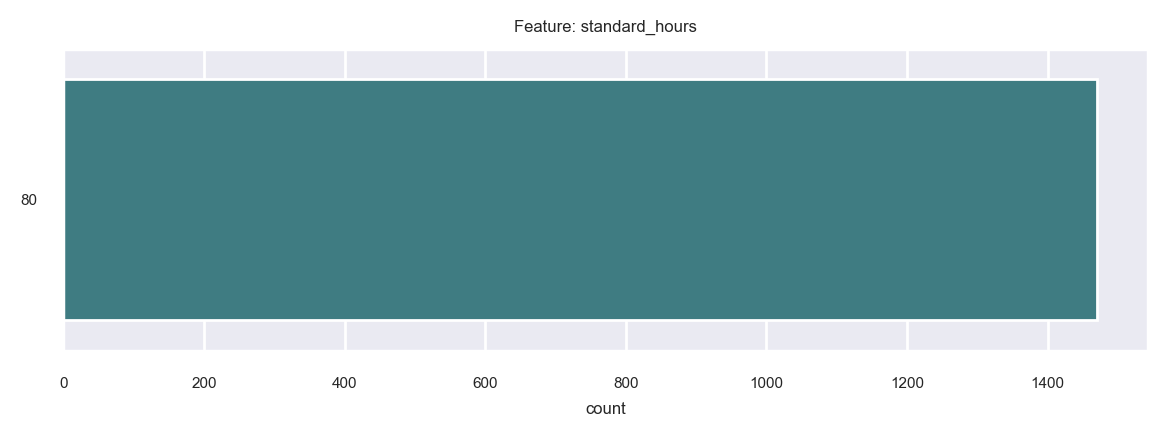

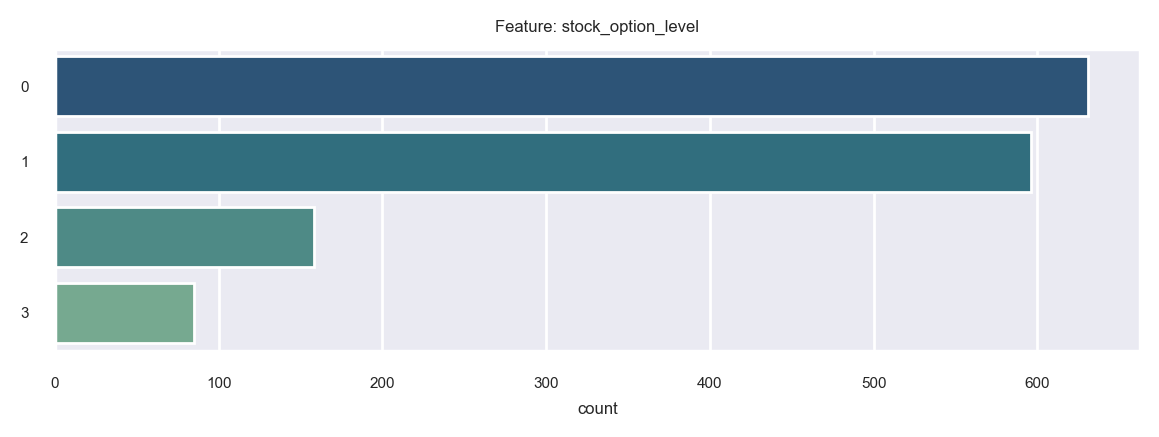

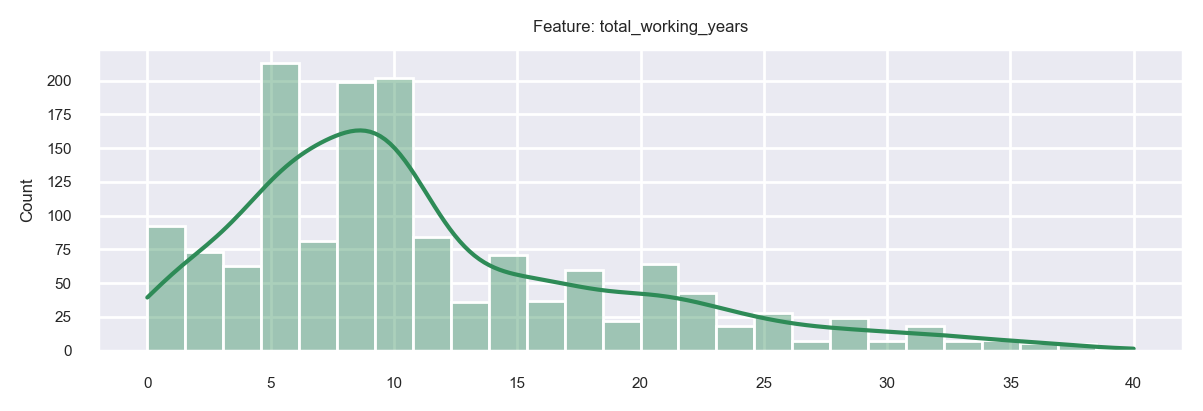

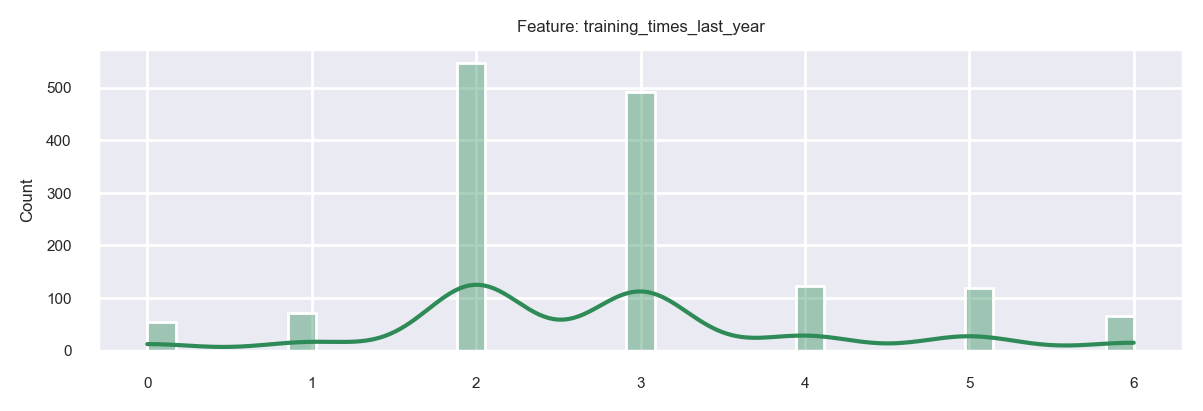

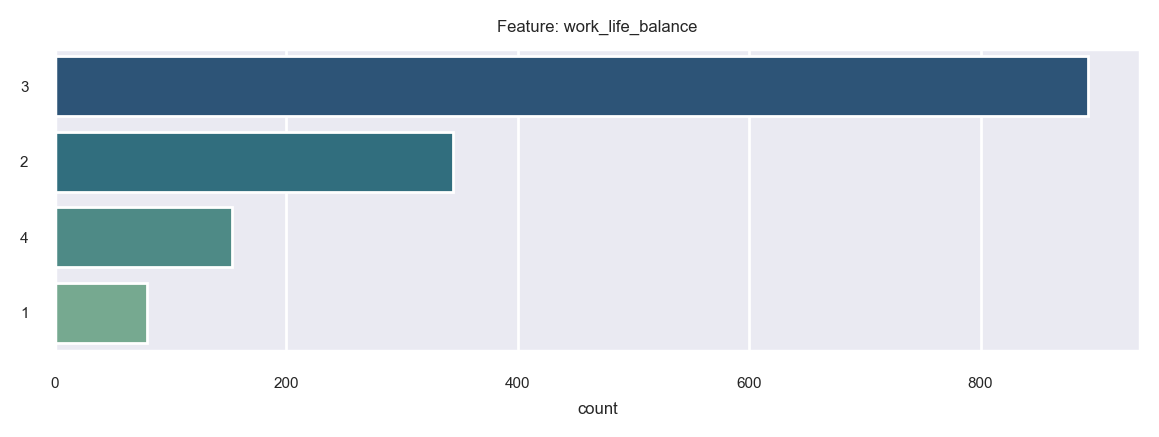

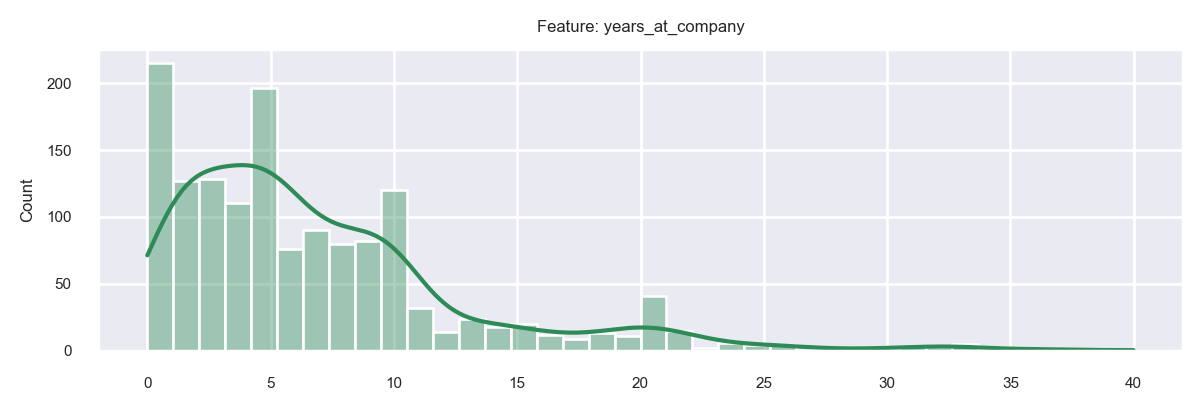

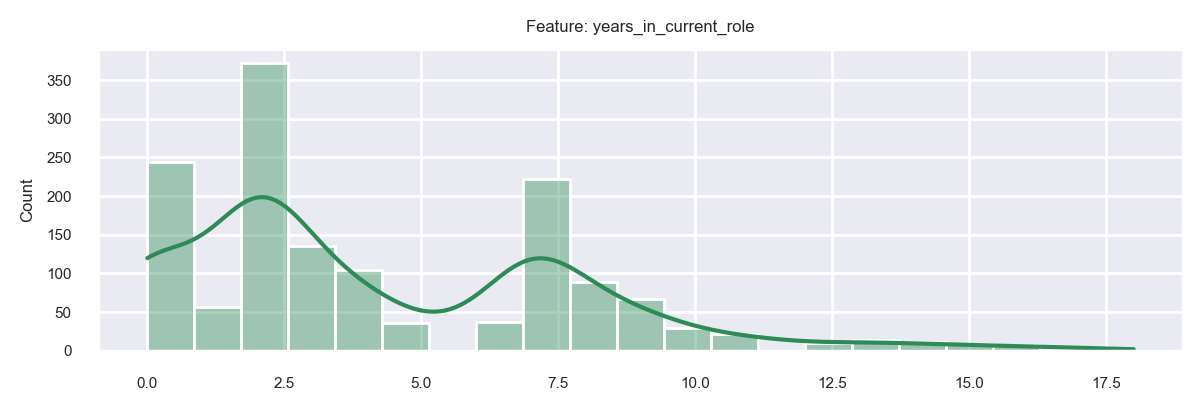

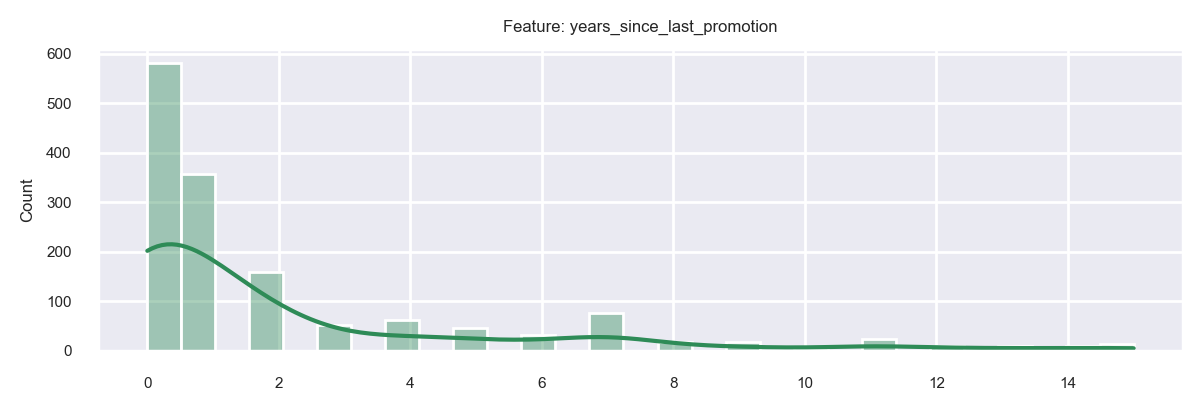

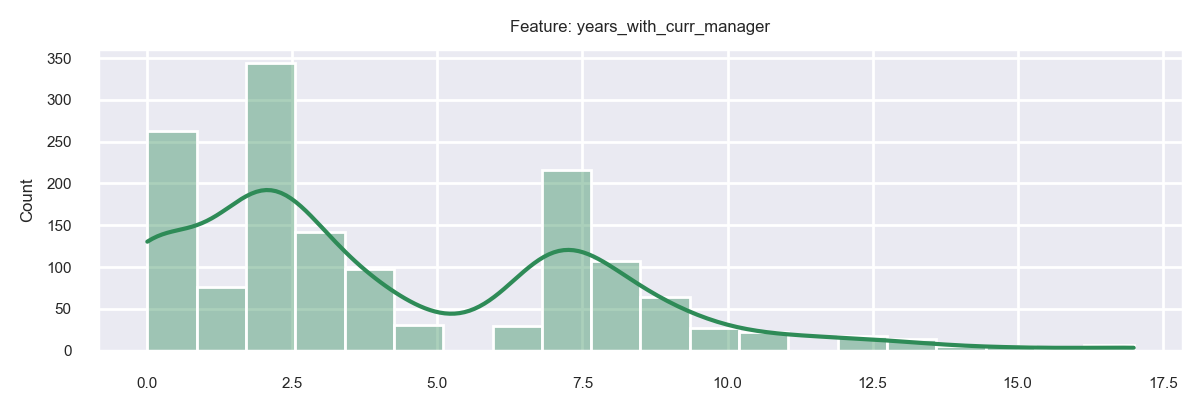

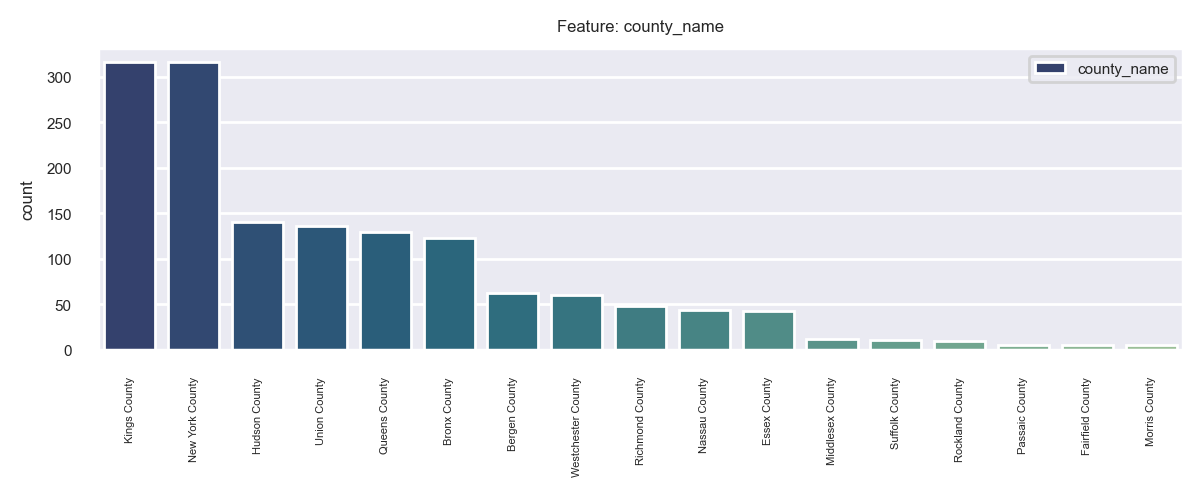

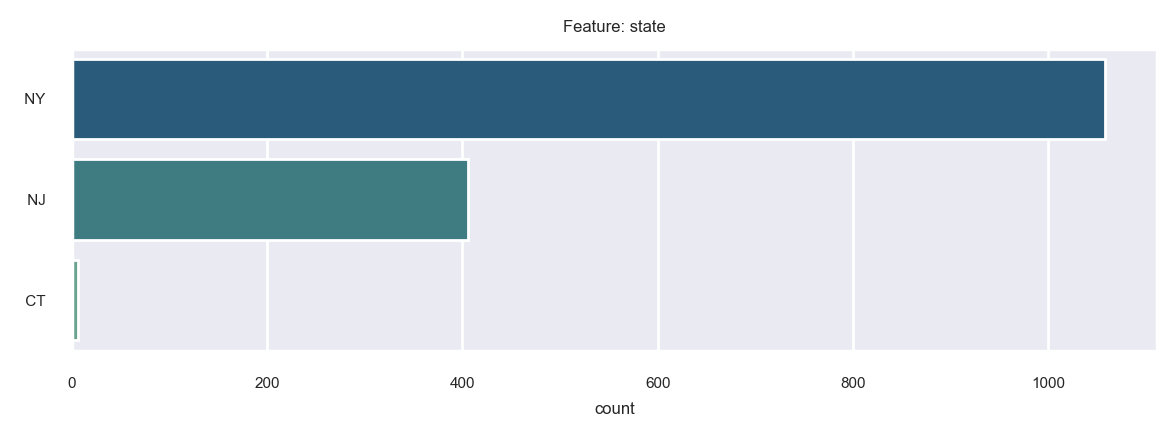

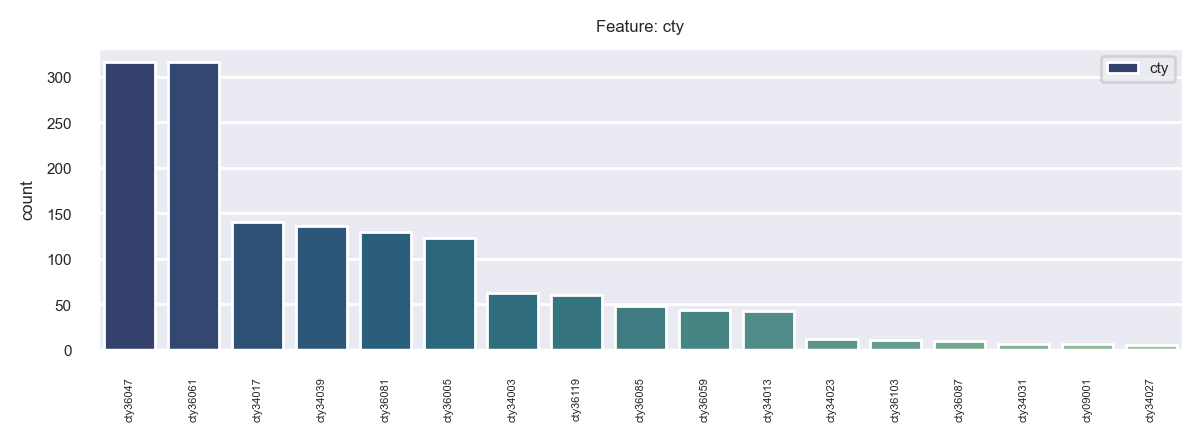

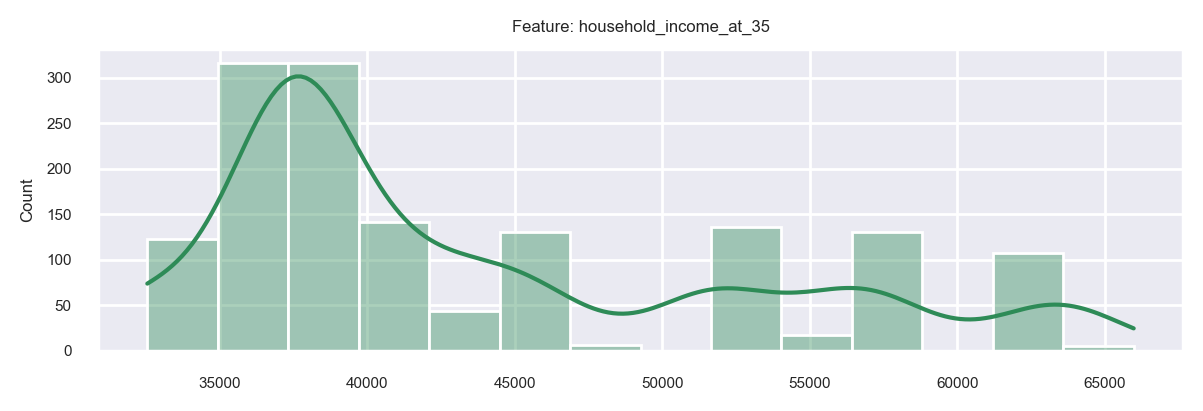

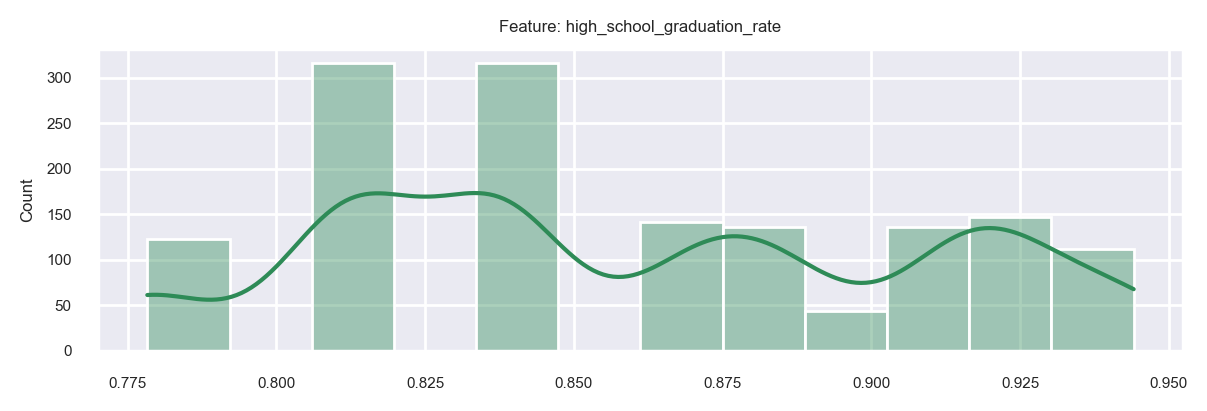

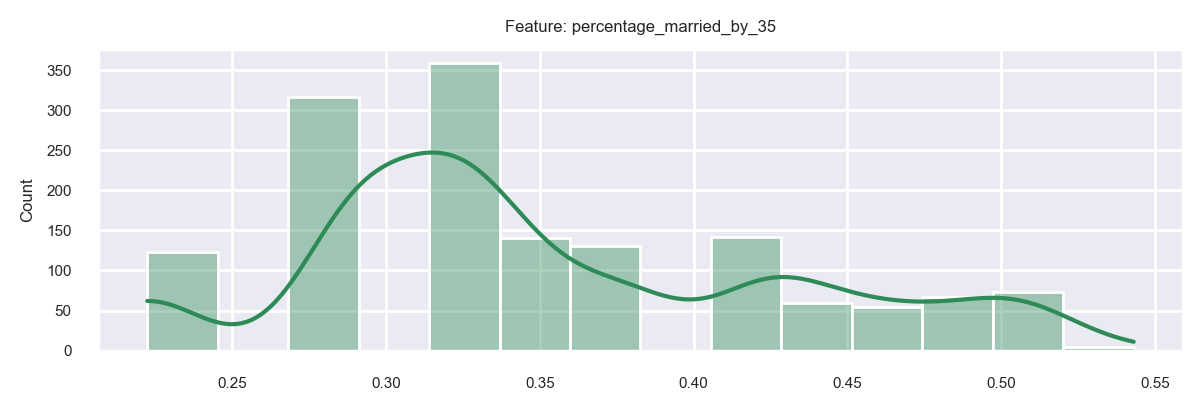

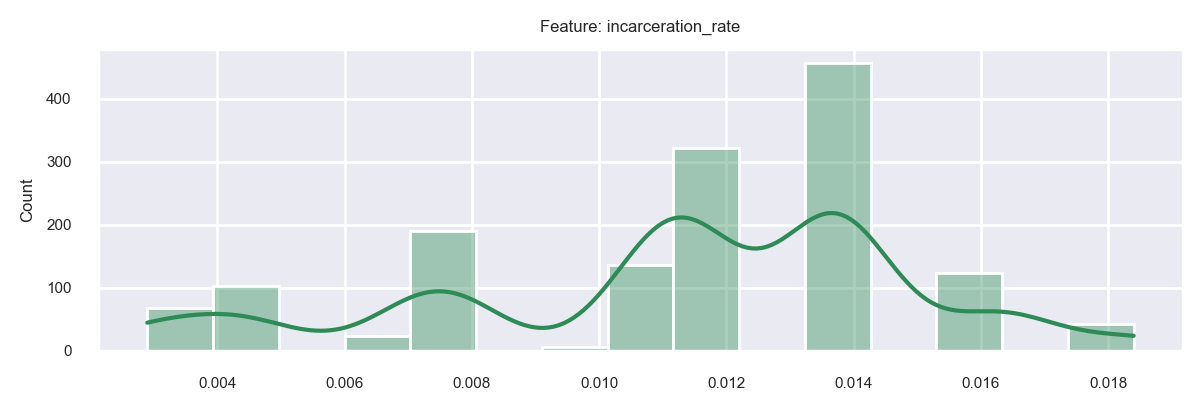

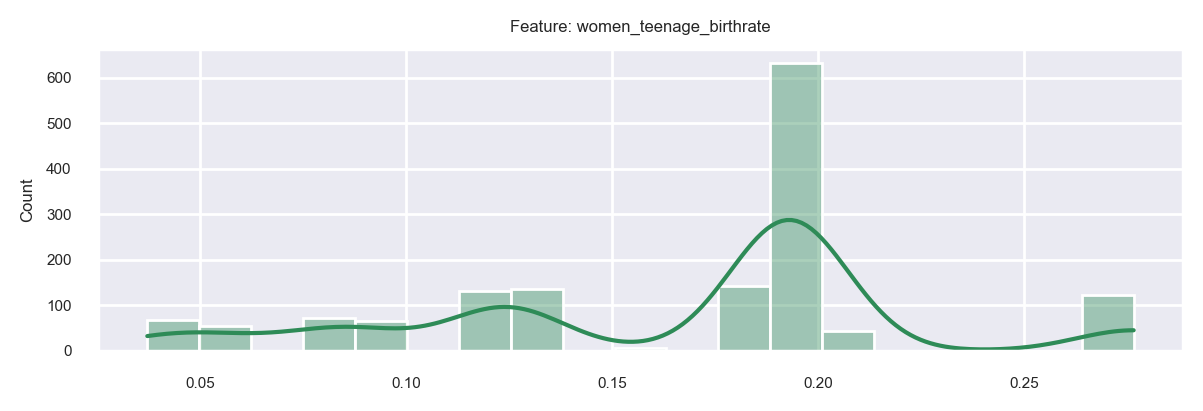

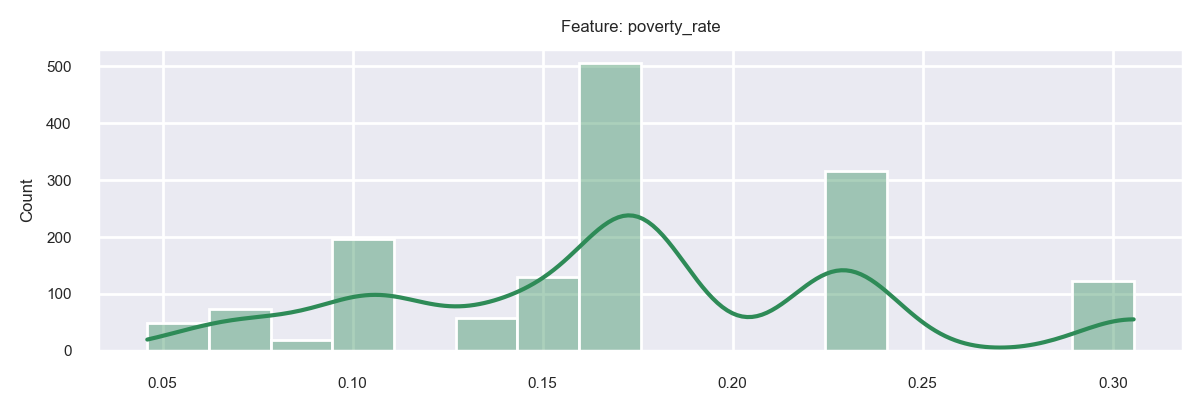

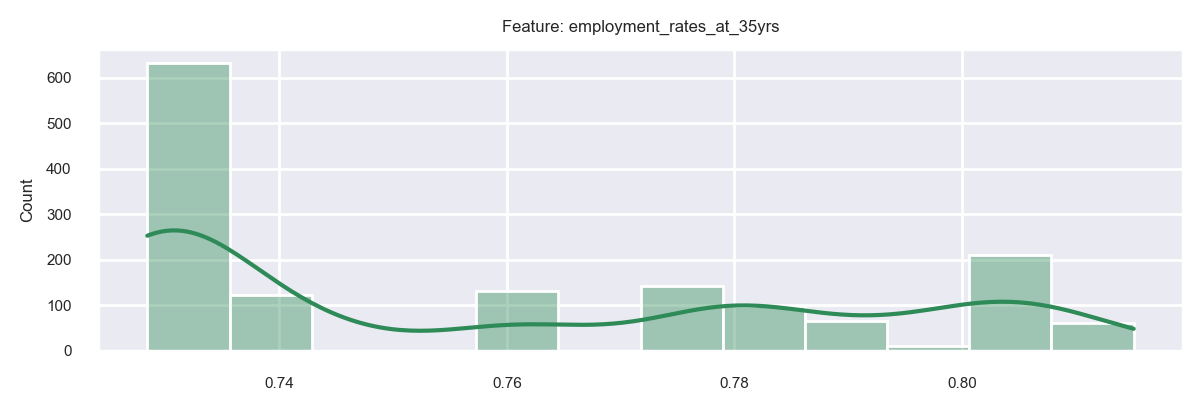

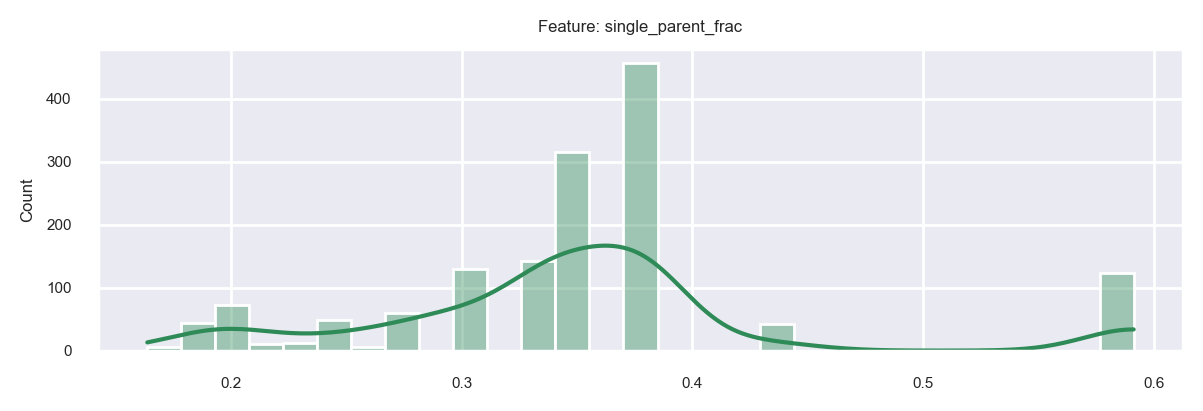

In [21]:
# plotting individual columns/features by data type

for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        plt.figure(figsize = (7, 2))
        sns.histplot(
            df[col],
            color = "seagreen",
            alpha = 0.4,
            kde = True)

        plt.title(f'Feature: {col}')
        plt.xlabel(None)
        plt.show()
    
    elif col == "cty" or col == "county_name": 
        # treating large discrete count plots seperate
        plt.figure(figsize = (7, 2))
        sns.countplot(
            df[col],
            order = df[col].value_counts().index,
            label = col, 
            palette="crest_r")

        plt.legend()
        # plt.xticks(rotation = 90)
        plt.tick_params(
                        axis='x', # changes apply to the x-axis
                        rotation = 90,
                        labelsize = 4)
        plt.xlabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

    else:
        plt.figure(figsize = (7, 2))
        sns.countplot(
            y = df[col],
            order = df[col].value_counts().index, 
            orient = "h", 
            palette="crest_r")

        plt.ylabel(None)
        plt.title(f'Feature: {col}')
        plt.show()

In [22]:
# classifiying features by data type = discrete/categorical or continuous 

disc_lst = df.select_dtypes(exclude = "number").columns.sort_values().tolist()
cont_lst = df.select_dtypes(include = "number").columns.sort_values().tolist()

print(f'discrete variables:\n{disc_lst}')
print()
print(f'continuous variables:\n{cont_lst}')

discrete variables:
['attrition', 'business_travel', 'county_name', 'cty', 'department', 'education', 'education_field', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'over_time', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'state', 'stock_option_level', 'work_life_balance']

continuous variables:
['age', 'daily_rate', 'distance_from_home', 'employment_rates_at_35yrs', 'high_school_graduation_rate', 'hourly_rate', 'household_income_at_35', 'incarceration_rate', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'percentage_married_by_35', 'poverty_rate', 'single_parent_frac', 'total_working_years', 'training_times_last_year', 'women_teenage_birthrate', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager']


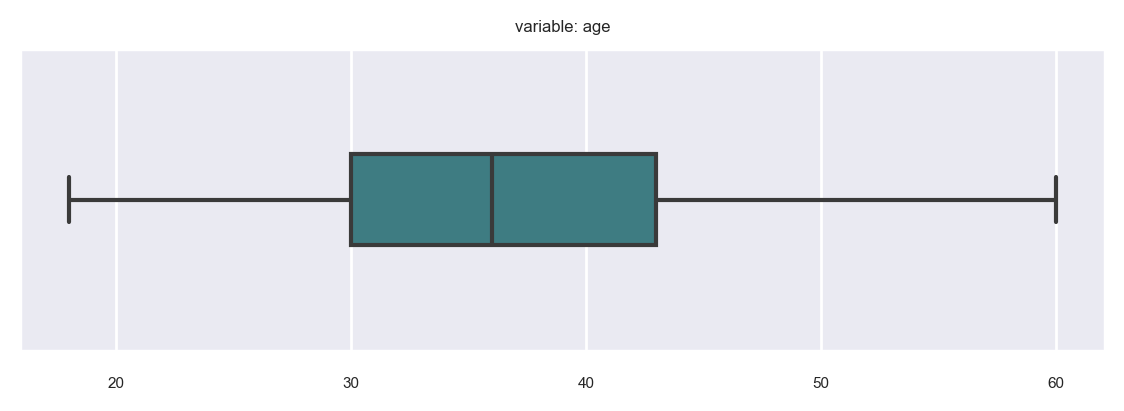

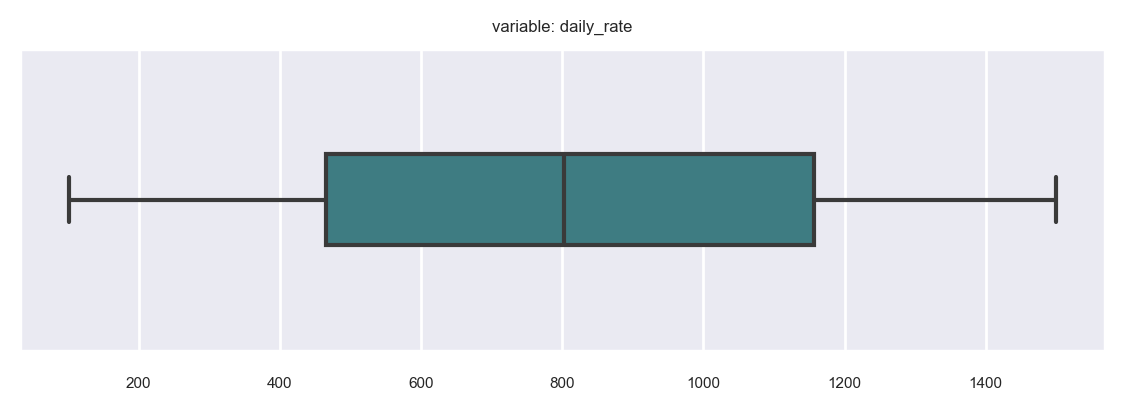

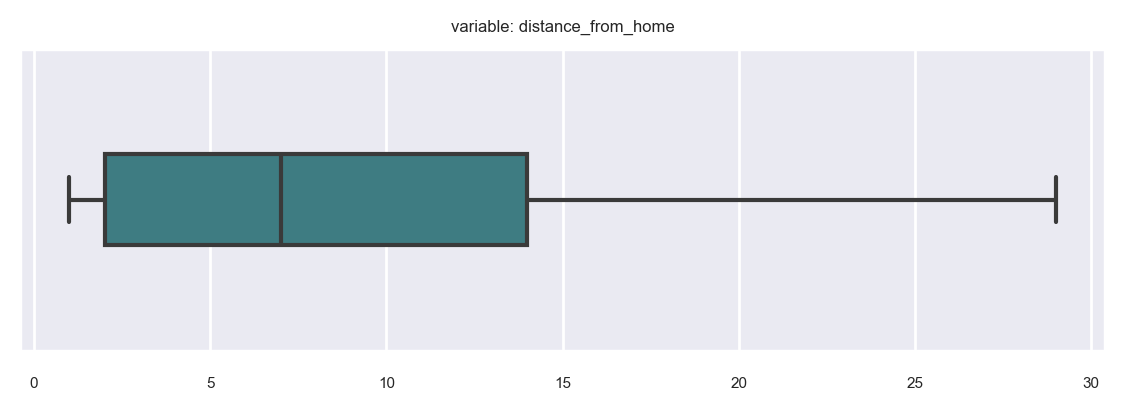

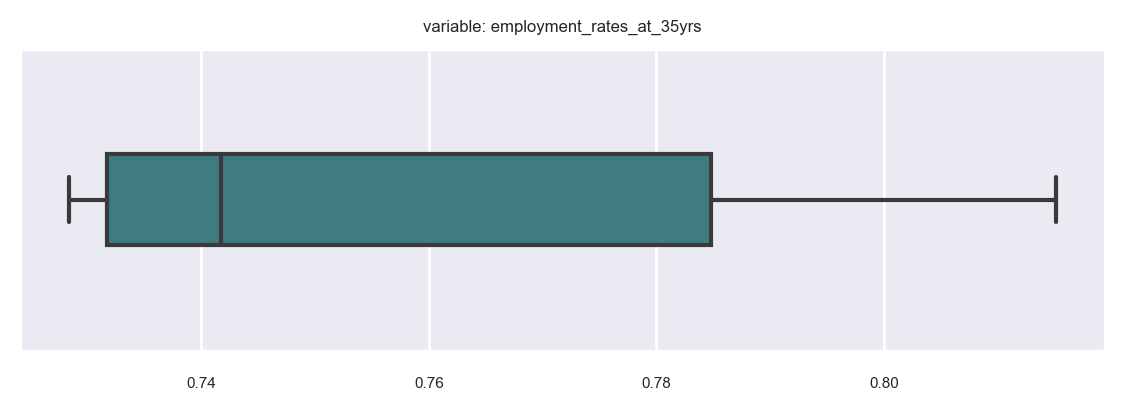

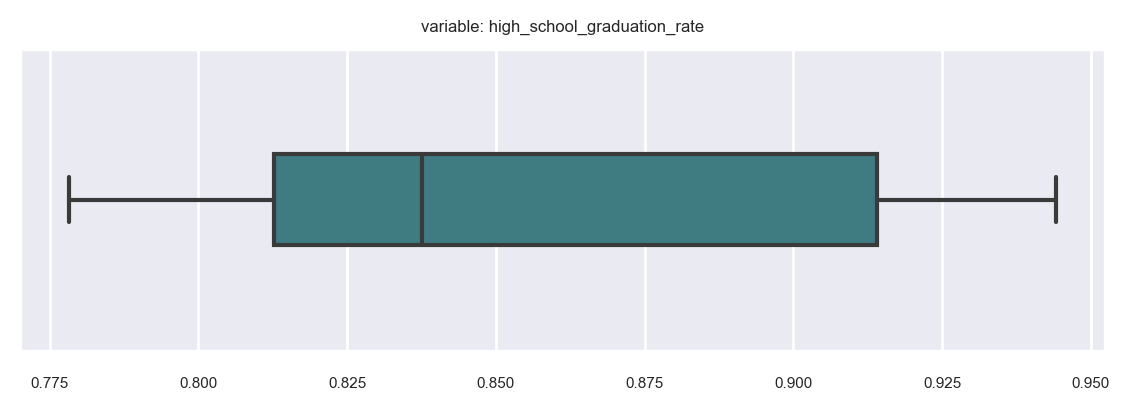

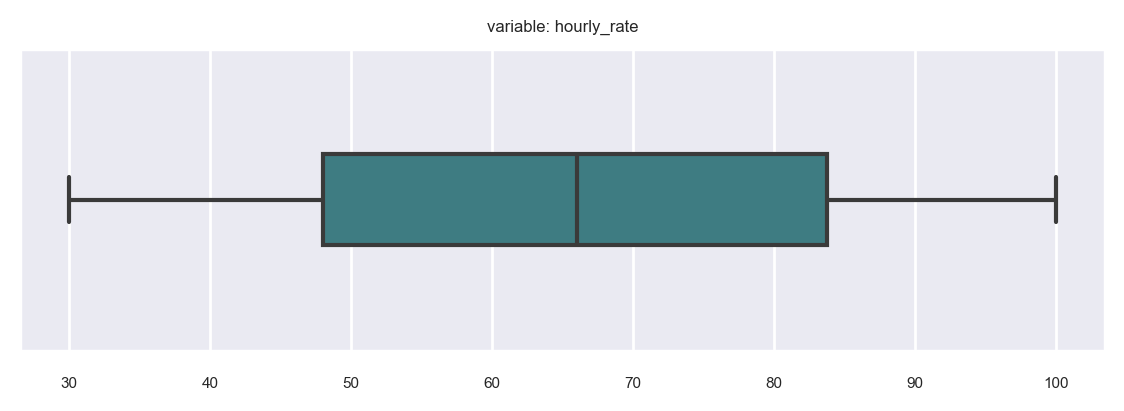

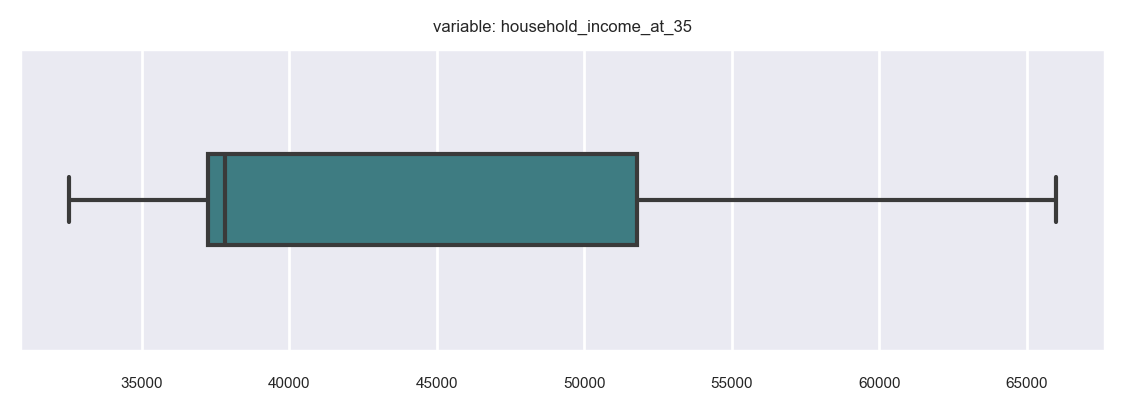

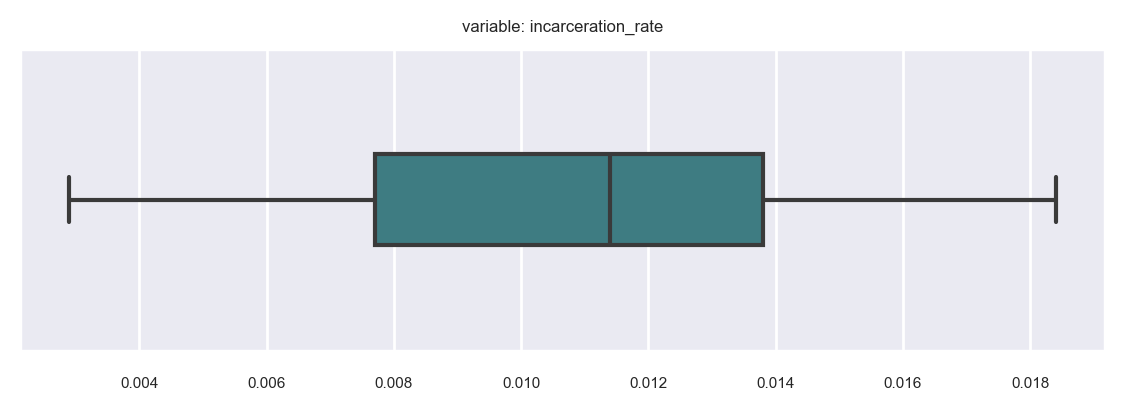

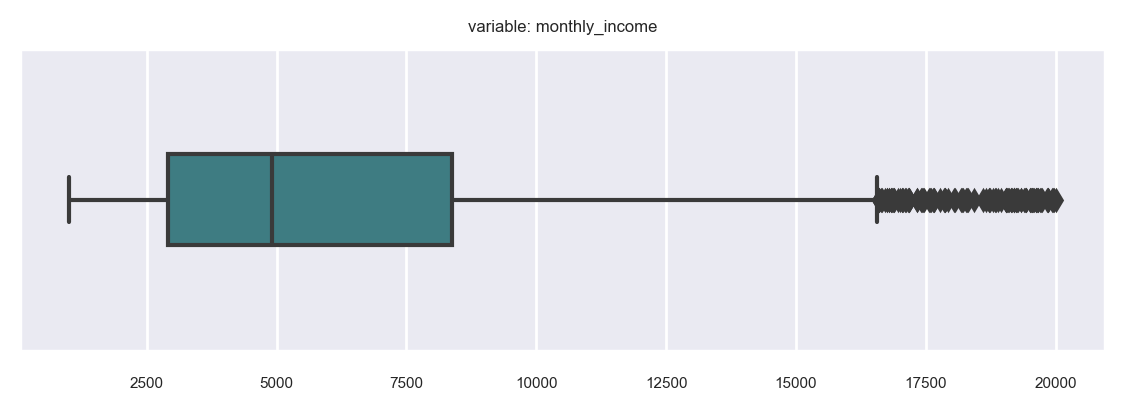

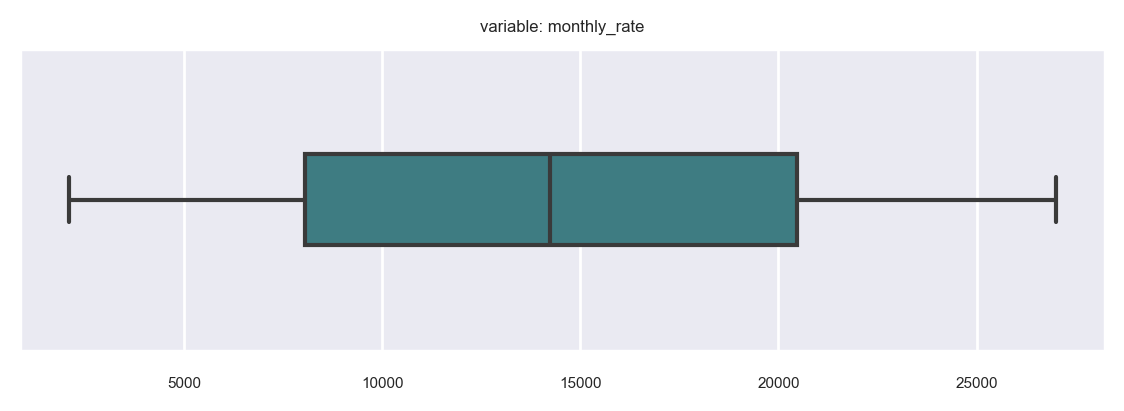

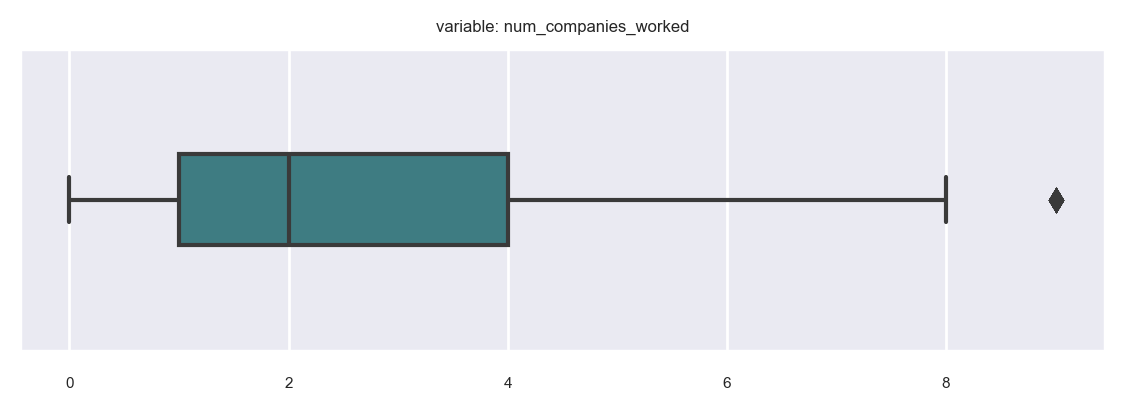

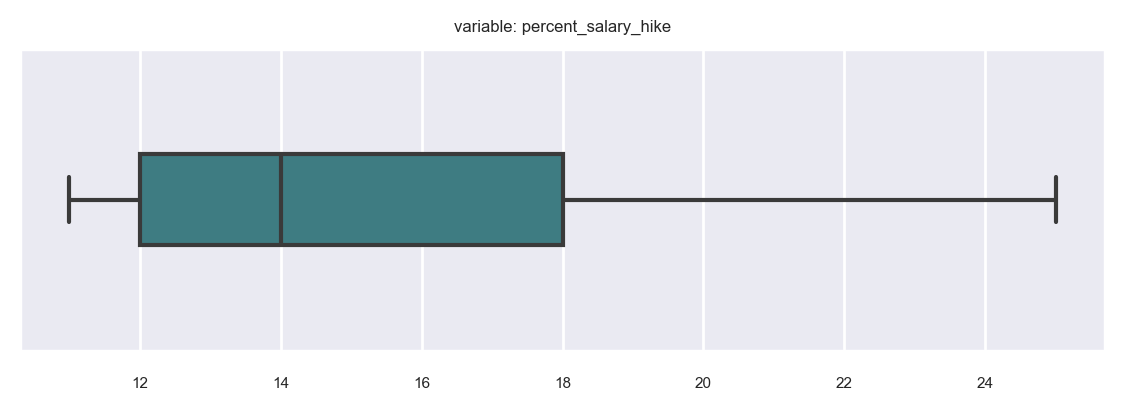

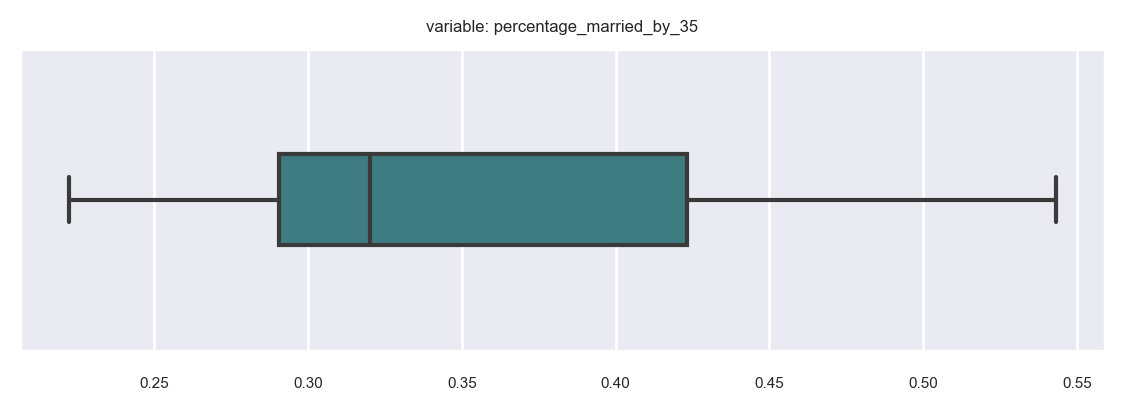

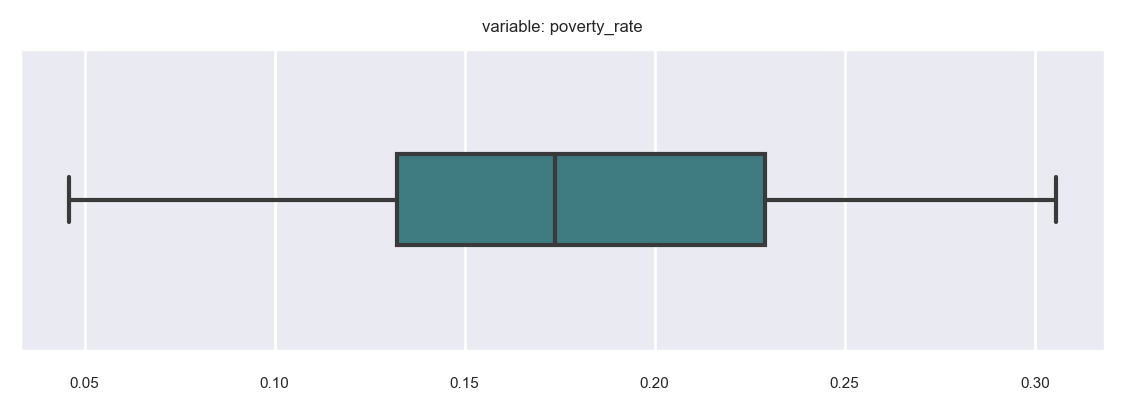

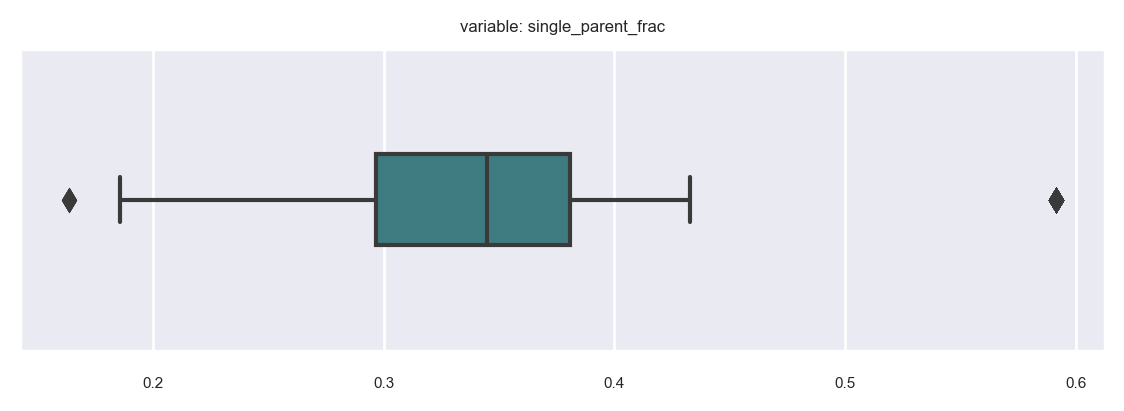

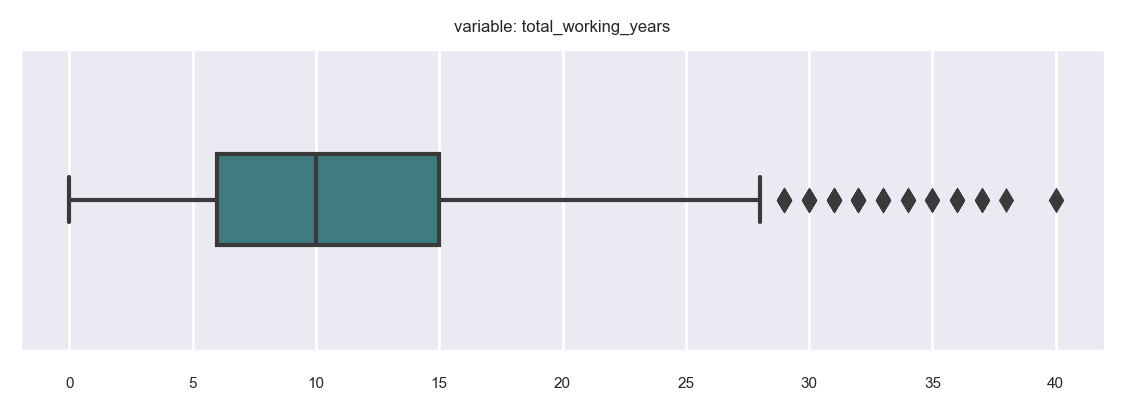

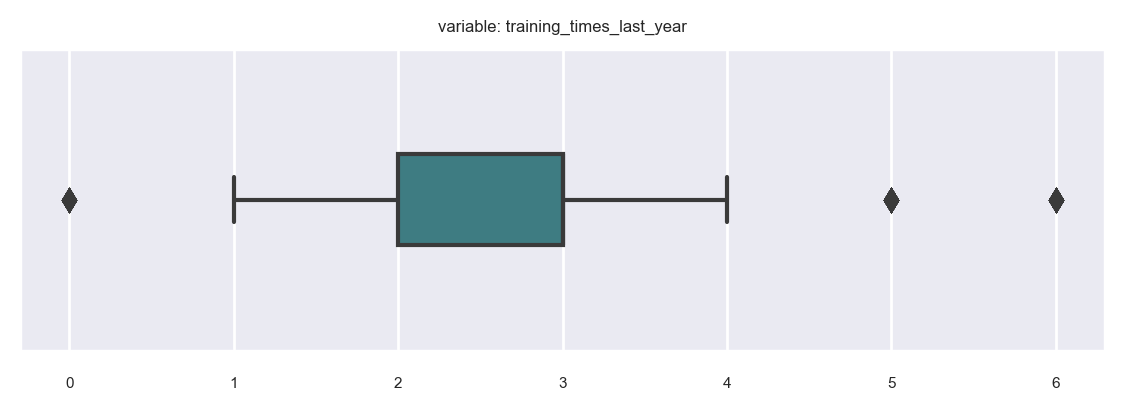

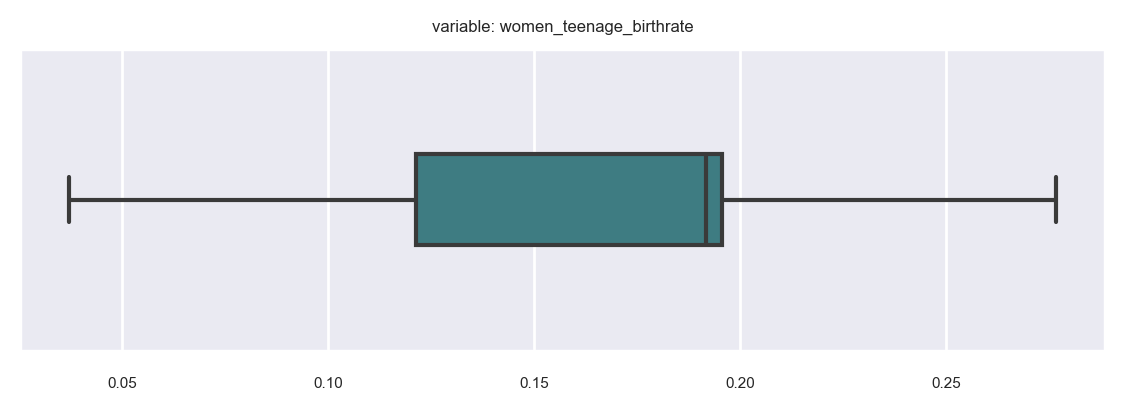

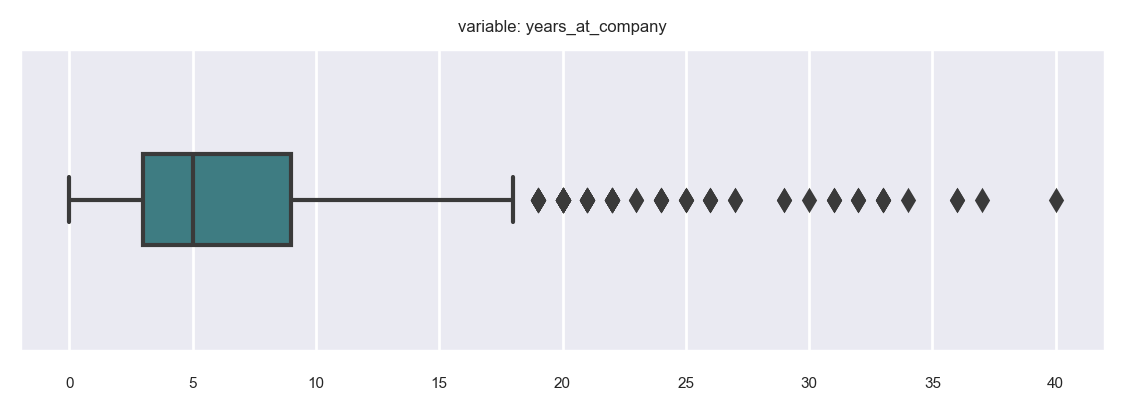

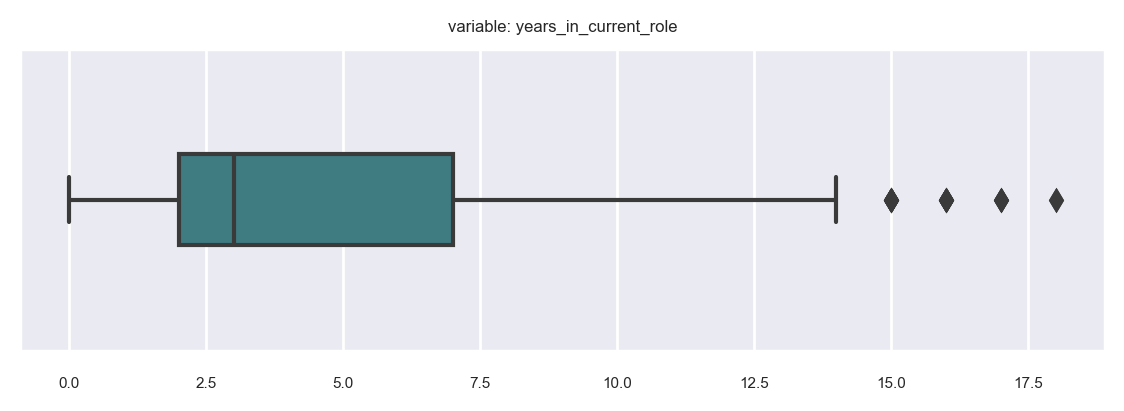

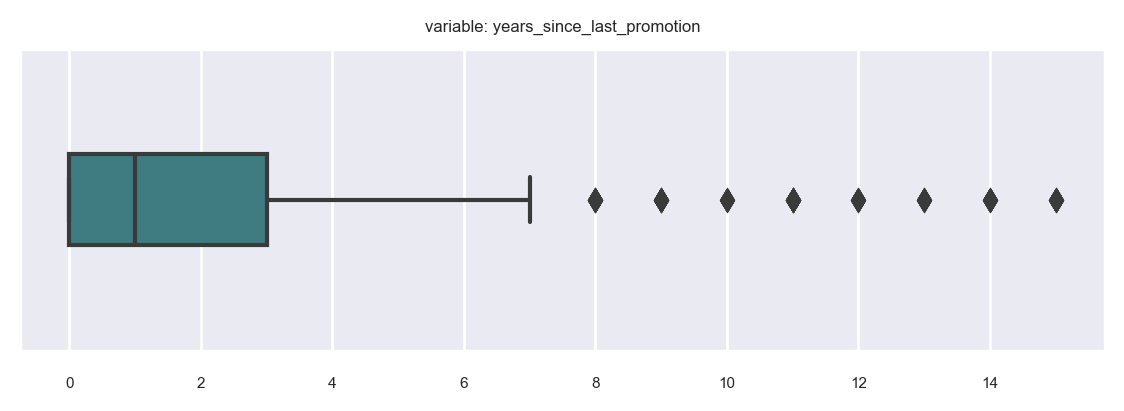

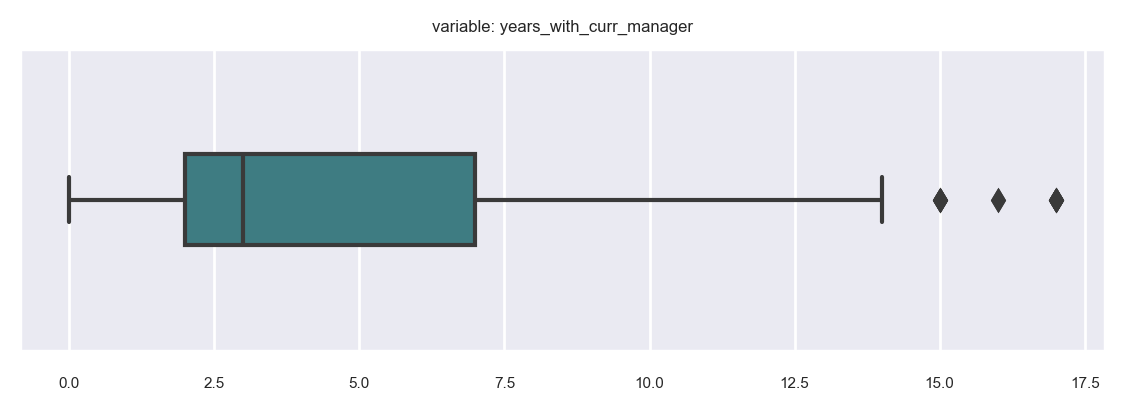

In [23]:
# box plots for continuous variables: are there outliers in the features?

for col in cont_lst:
    plt.figure(figsize = (7, 2))

    sns.boxplot(
        df[col],
        orient = "h", 
        palette = "crest", 
        width= 0.3)

    plt.title(f'variable: {col}')
    plt.ylabel(None)
    plt.xlabel(None)
    plt.show()

In [24]:
# continuous variables: lower and upper bounds using interquartile (IQR) range
'''Function created to determine continuous variable/feature lower/upper bounds using an interquartile range method'''
def get_lower_and_upper_bounds(df):
    holder = []
    num_lst = df.select_dtypes("number").columns.tolist()
    # num_lst = [ele for ele in num_lst if ele not in ("parcel_id", 'longitude', 'latitude', 'blockgroup_assignment')]
    k = 1.5

    # determining continuous features/columns
    for col in df[num_lst]:
        
        # determing 1st and 3rd quartile
        q1, q3 = df[col].quantile([.25, 0.75])
        
        # calculate interquartile range
        iqr = q3 - q1
        
        # set feature/data lower bound limit
        lower_bound = q1 - k * iqr

        # set feature/data upperbound limit
        upper_bound = q3 + k * iqr
        
        metrics = { 
            "column": col,
            "column type": df[col].dtype,
            "iqr": round(iqr, 5),
            "lower_bound": round(lower_bound, 5),
            "lower_outliers": len(df[df[col] < lower_bound]),
            "upper_bound": round(upper_bound, 5),
            "upper_outliers": len(df[df[col] > upper_bound])
        }

        holder.append(metrics)

    new_df = pd.DataFrame(holder)

    # returning the cleaned dataset
    print(f'dataframe shape: {new_df.shape}')

    return new_df

In [25]:
# applying the function to return a lower/upperbounds dataframe

get_lower_and_upper_bounds(df).sort_values(by="upper_outliers", ascending=False)

dataframe shape: (22, 7)


column column type      iqr  lower_bound  \
9      training_times_last_year       int64     1.00         0.50   
21           single_parent_frac     float64     0.08         0.17   
4                monthly_income       int64  5468.00     -5291.00   
12   years_since_last_promotion       int64     3.00        -4.50   
10             years_at_company       int64     6.00        -6.00   
8           total_working_years       int64     9.00        -7.50   
6          num_companies_worked       int64     3.00        -3.50   
11        years_in_current_role       int64     5.00        -5.50   
13      years_with_curr_manager       int64     5.00        -5.50   
7           percent_salary_hike       int64     6.00         3.00   
5                  monthly_rate       int64 12414.50    -10574.75   
3                   hourly_rate       int64    35.75        -5.62   
1                    daily_rate       int64   692.00      -573.00   
2            distance_from_home       int64    12.00       -16.00   
14       household_income_at_35       int64 14544.00     15413.00   
15  high_school_graduation_rate     float64     0.10         0.66   
16     percentage_married_by_35     float64     0.13         0.09   
17           incarceration_rate     float64     0.01        -0.00   
18      women_teenage_birthrate     float64     0.07         0.01   
19                 poverty_rate     float64     0.10        -0.01   
20    employment_rates_at_35yrs     float64     0.05         0.65   
0                           age       int64    13.00        10.50   

    lower_outliers  upper_bound  upper_outliers  
9               54         4.50             184  
21               5         0.51             123  
4                0     16581.00             114  
12               0         7.50             107  
10               0        18.00             104  
8                0        28.50              63  
6                0         8.50              52  
11               0        14.50              21  
13               0        14.50              14  
7                0        27.00               0  
5                0     39083.25               0  
3                0       137.38               0  
1                0      2195.00               0  
2                0        32.00               0  
14               0     73589.00               0  
15               0         1.07               0  
16               0         0.62               0  
17               0         0.02               0  
18               0         0.31               0  
19               0         0.37               0  
20               0         0.86               0  
0                0        62.50               0

#### ``Outlier Observations``

**Intentionally choosing to leave the socioeconomic/opportunity atlas data for testing. Additionally, since these are actual community figures and may subsequently impact an employees attrition decision.**

<u>Ater applying an interquartile range with a k value of 1.5, I will apply/ommit the following outlier cleaning:</u>

**monthly_income:** upperbound $16581.00

- this signals to me that these employees are either contractors or senior leaders at the company. If they are senior leaders, my assumption is that they are more reluctant to make an employment change due to their potential leadership responsibilities, role, and stated salary. 

**year_since_last_promotion:** upperbound 7.50 years

- this signals to me that these employees may already be seeking other opportunities elsewhere - potentially with an employer that is willing to offer them a better position with greater responsibilities, and salary. I will ommit employees over the dataset upperbound.

**years_at_company:** upperbound 18.00 years

- this signals to me that these employees may be reluctant to leave their current employer given the length of their tenure. Additionally, the current median employee tenure in the US is ~5 years, I will ommit employees over this upperbound.

**total_working_years:** upperbound 28.50 year

- similar to above, these employees may also be enroute to retirement or are simply less willing to make a career/employment shift given this late into their careers. Additionally, they might have also learned ways in which they can successfully navigate the socioeconomic challenges apparent in their communities. I will ommit employees over this upperbound.

**years_in_current_role:** upperbound 14.50 years

- given the median US employee/employer tenure, I assume that these employees 1. may already be seeking other opportunities or 2. are comfortable in their current roles and thefore are less willing to take socioeconomic factors as reason to leave their company. 

**years_with_curr_manager:** upperbound 14.50 years

- same as above, yet there could also be a relationship factor thats prevelant in the employees' tenure. Employees may have a good working relationship with their managers where they potentially feel "heard" and are having their socioeconomic concerns addressed. I will ommit employees over this upperbound.

----

``references:``

- https://www.bls.gov/news.release/tenure.nr0.htm


In [26]:
# creating a function to clean outliers at upperbounds

def df_outliers(df):

    # monthly income / leadership or seniority
    df = df[df["monthly_income"] <= 16581.00]
    
    # length of working tenure
    df = df[df["total_working_years"] <= 28.00]

    # length of tenure at current company
    df = df[df["years_at_company"] <= 18.00]

    # number of years since last promotion
    df = df[df["years_since_last_promotion"] <= 7.50]

    # number of years in current role 
    df = df[df["years_in_current_role"] <= 14.50]

    # number of year with current manager
    df = df[df["years_with_curr_manager"] <= 14.50]

    # returning the cleaned dataset
    print(f'dataframe shape: {df.shape}')

    return df

In [27]:
# applying the outlier function

df = df_outliers(df)
df.head()

dataframe shape: (1230, 43)


age  attrition    business_travel  daily_rate              department  \
1   41       True      Travel_Rarely        1102                   Sales   
2   49      False  Travel_Frequently         279  Research & Development   
4   37       True      Travel_Rarely        1373  Research & Development   
5   33      False  Travel_Frequently        1392  Research & Development   
7   27      False      Travel_Rarely         591  Research & Development   

   distance_from_home education education_field environment_satisfaction  \
1                   1         2   Life Sciences                        2   
2                   8         1   Life Sciences                        3   
4                   2         2           Other                        4   
5                   3         4   Life Sciences                        4   
7                   2         1         Medical                        1   

   gender  hourly_rate job_involvement job_level               job_role  \
1  Female           94               3         2        Sales Executive   
2    Male           61               2         2     Research Scientist   
4    Male           92               2         1  Laboratory Technician   
5  Female           56               3         1     Research Scientist   
7    Male           40               3         1  Laboratory Technician   

  job_satisfaction marital_status  monthly_income  monthly_rate  \
1                4         Single            5993         19479   
2                2        Married            5130         24907   
4                3         Single            2090          2396   
5                3        Married            2909         23159   
7                2        Married            3468         16632   

   num_companies_worked over_time  percent_salary_hike performance_rating  \
1                     8       Yes                   11                  3   
2                     1        No                   23                  4   
4                     6       Yes                   15                  3   
5                     1       Yes                   11                  3   
7                     9        No                   12                  3   

  relationship_satisfaction standard_hours stock_option_level  \
1                         1             80                  0   
2                         4             80                  1   
4                         2             80                  0   
5                         3             80                  0   
7                         4             80                  1   

   total_working_years  training_times_last_year work_life_balance  \
1                    8                         0                 1   
2                   10                         3                 3   
4                    7                         3                 3   
5                    8                         3                 3   
7                    6                         3                 3   

   years_at_company  years_in_current_role  years_since_last_promotion  \
1                 6                      4                           0   
2                10                      7                           1   
4                 0                      0                           0   
5                 8                      7                           3   
7                 2                      2                           2   

   years_with_curr_manager      county_name state       cty  \
1                        5     Kings County    NY  cty36047   
2                        7     Bronx County    NY  cty36005   
4                        0     Kings County    NY  cty36047   
5                        0     Kings County    NY  cty36047   
7                        2  New York County    NY  cty36061   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   

In [28]:
# percentage lost after outlier cleaning
# ~19.5% loss of original df

round((df.shape[0] - ibm_df.shape[0])/df.shape[0], 3)

-0.195

In [29]:
# seeing the dataset

df.head()

age  attrition    business_travel  daily_rate              department  \
1   41       True      Travel_Rarely        1102                   Sales   
2   49      False  Travel_Frequently         279  Research & Development   
4   37       True      Travel_Rarely        1373  Research & Development   
5   33      False  Travel_Frequently        1392  Research & Development   
7   27      False      Travel_Rarely         591  Research & Development   

   distance_from_home education education_field environment_satisfaction  \
1                   1         2   Life Sciences                        2   
2                   8         1   Life Sciences                        3   
4                   2         2           Other                        4   
5                   3         4   Life Sciences                        4   
7                   2         1         Medical                        1   

   gender  hourly_rate job_involvement job_level               job_role  \
1  Female           94               3         2        Sales Executive   
2    Male           61               2         2     Research Scientist   
4    Male           92               2         1  Laboratory Technician   
5  Female           56               3         1     Research Scientist   
7    Male           40               3         1  Laboratory Technician   

  job_satisfaction marital_status  monthly_income  monthly_rate  \
1                4         Single            5993         19479   
2                2        Married            5130         24907   
4                3         Single            2090          2396   
5                3        Married            2909         23159   
7                2        Married            3468         16632   

   num_companies_worked over_time  percent_salary_hike performance_rating  \
1                     8       Yes                   11                  3   
2                     1        No                   23                  4   
4                     6       Yes                   15                  3   
5                     1       Yes                   11                  3   
7                     9        No                   12                  3   

  relationship_satisfaction standard_hours stock_option_level  \
1                         1             80                  0   
2                         4             80                  1   
4                         2             80                  0   
5                         3             80                  0   
7                         4             80                  1   

   total_working_years  training_times_last_year work_life_balance  \
1                    8                         0                 1   
2                   10                         3                 3   
4                    7                         3                 3   
5                    8                         3                 3   
7                    6                         3                 3   

   years_at_company  years_in_current_role  years_since_last_promotion  \
1                 6                      4                           0   
2                10                      7                           1   
4                 0                      0                           0   
5                 8                      7                           3   
7                 2                      2                           2   

   years_with_curr_manager      county_name state       cty  \
1                        5     Kings County    NY  cty36047   
2                        7     Bronx County    NY  cty36005   
4                        0     Kings County    NY  cty36047   
5                        0     Kings County    NY  cty36047   
7                        2  New York County    NY  cty36061   

   household_income_at_35  high_school_graduation_rate  \
1                   37229                         0.84   
2                   

In [30]:
# renaming/classifying attrition as boolean T/F values

df["attrition"] = df["attrition"].replace({"Yes": True, "No": False})
df.attrition.head()

1     True
2    False
4     True
5    False
7    False
Name: attrition, dtype: bool

----
### **``Splitting the Original Dataset``**


In [31]:
'''Function created to split the initial dataset into train, validate, and test datsets'''
def train_validate_test_split(df):
    train_and_validate, test = train_test_split(
                                                df, 
                                                test_size = 0.2, 
                                                random_state = 548,
                                                stratify = df["attrition"])
    
    train, validate = train_test_split(
                                    train_and_validate,
                                    test_size = 0.3,
                                    random_state = 548,
                                    stratify = train_and_validate["attrition"])

    print(f'train shape: {train.shape}')
    print(f'validate shape: {validate.shape}')
    print(f'test shape: {test.shape}')

    return train, validate, test

In [32]:
# splitting dataset into training, validate, and test datasets

train, validate, test = train_validate_test_split(df)

train shape: (688, 43)
validate shape: (296, 43)
test shape: (246, 43)


In [33]:
# what is the percentage of the target variable in ea. dataset?
# this checks out!

print(f'target percentage in train: {round(len(train[train["attrition"] == True])/train.shape[0], 3)}')
print(f'target percentage in validate: {round(len(validate[validate["attrition"] == True])/validate.shape[0], 3)}')
print(f'target percentage in test: {round(len(test[test["attrition"] == True])/test.shape[0], 3)}')

target percentage in train: 0.177
target percentage in validate: 0.176
target percentage in test: 0.175


----
#### ``Setting a Baseline: Prediction Employee Attrition``

In [34]:
# let's set an attrition baseline using a mode method for ea. dataset
# For the baseline accuracy, I have taken the mode of the two (2) binary "attrition" options = False and have set this as my random prediction
# baseline accuracy score: the total number of times that the baseline prediction matched the actual employee attrition outcome
# baseline accuracy score: ~82.0% **(note that if the goal is to predict attrition = 1, then baseline accuracy is ~18%)

train_baseline = train
train_baseline["baseline_prediction"] = True
baseline_train = (train_baseline["baseline_prediction"] == train_baseline["attrition"]).mean().round(3)
print(f'Training Baseline Accuracy: % {(baseline_train * 100).round(5)}')

print('-------------------------------------------')

validate_baseline = validate
validate_baseline["baseline_prediction"] = True
baseline_val = (validate_baseline["baseline_prediction"] == validate_baseline["attrition"]).mean().round(3)
print(f'Validate Baseline Accuracy: % {(baseline_val * 100).round(5)}')

Training Baseline Accuracy: % 17.7
-------------------------------------------
Validate Baseline Accuracy: % 17.6


In [35]:
# current continuous variables in dataset

train.select_dtypes(include = "number").columns.tolist()

['age',
 'daily_rate',
 'distance_from_home',
 'hourly_rate',
 'monthly_income',
 'monthly_rate',
 'num_companies_worked',
 'percent_salary_hike',
 'total_working_years',
 'training_times_last_year',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager',
 'household_income_at_35',
 'high_school_graduation_rate',
 'percentage_married_by_35',
 'incarceration_rate',
 'women_teenage_birthrate',
 'poverty_rate',
 'employment_rates_at_35yrs',
 'single_parent_frac']

In [36]:
# let's also look at discrete variables

train.select_dtypes(exclude = "number").columns.tolist()

['attrition',
 'business_travel',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'over_time',
 'performance_rating',
 'relationship_satisfaction',
 'standard_hours',
 'stock_option_level',
 'work_life_balance',
 'county_name',
 'state',
 'cty',
 'baseline_prediction']

In [37]:
# setting continuous variables list

cont_lst = sorted([
'age',
'monthly_income',
'percent_salary_hike',
'total_working_years',
'training_times_last_year',
'years_at_company',
'household_income_at_35',
'high_school_graduation_rate',
'percentage_married_by_35',
'incarceration_rate',
'women_teenage_birthrate',
'poverty_rate',
'employment_rates_at_35yrs',
'single_parent_frac',
'years_since_last_promotion',
'years_in_current_role',
'years_with_curr_manager',
])

cont_lst

['age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'incarceration_rate',
 'monthly_income',
 'percent_salary_hike',
 'percentage_married_by_35',
 'poverty_rate',
 'single_parent_frac',
 'total_working_years',
 'training_times_last_year',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_since_last_promotion',
 'years_with_curr_manager']

In [38]:
# setting disc variables list

disc_lst = sorted([
'stock_option_level',
'work_life_balance',
'education',
'job_involvement',
'job_level',
'job_satisfaction',
'performance_rating',
'relationship_satisfaction',
'county_name',
'state',
'department',
'education_field',
'gender',
'job_role',
'marital_status',
'environment_satisfaction',
'standard_hours'
])

disc_lst

['county_name',
 'department',
 'education',
 'education_field',
 'environment_satisfaction',
 'gender',
 'job_involvement',
 'job_level',
 'job_role',
 'job_satisfaction',
 'marital_status',
 'performance_rating',
 'relationship_satisfaction',
 'standard_hours',
 'state',
 'stock_option_level',
 'work_life_balance']

-----
### ``Exploration: Hypothesis Testing``

    The focus will first be on determined equity/community variables

**"Attrition":** Discrete/Categorical Target Variable

**``Variables not taken into exploration:``**

1. 'business_travel'
2. 'cty'
3. 'daily_rate'
4. 'distance_from_home'
5. 'hourly_rate'
6. 'monthly_rate'
7. 'num_companies_worked'
8. 'over_time'


**``Continuous Variables:``**

1. 'age'
2. 'employment_rates_at_35yrs'
3. 'high_school_graduation_rate'
4. 'household_income_at_35'
5. 'incarceration_rate'
6. 'monthly_income'
7. 'percent_salary_hike'
8. 'percentage_married_by_35'
9. 'poverty_rate'
10. 'single_parent_frac'
11. 'total_working_years'
12. 'training_times_last_year'
13. 'women_teenage_birthrate'
14. 'years_at_company'
15. 'years_since_last_promotion'
16. 'years_in_current_role'
17. 'years_with_curr_manager'

**``Discrete Varibles:``**

1. 'attrition'
2. 'county_name'
3. 'department'
4. 'education'
5. 'education_field'
6. 'environment_satisfaction'
7. 'gender'
8. 'job_involvement'
9. 'job_level'
10. 'job_role'
11. 'job_satisfaction'
12. 'marital_status'
13. 'performance_rating'
14. 'relationship_satisfaction'
15. 'standard_hours'
16. 'state'
17. 'stock_option_level'
18. 'work_life_balance'


In [39]:
# updating datasets with confirmed variables

train = train[[
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'standard_hours',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

validate = validate[[ 
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'standard_hours',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

test = test[[ 
            'attrition',
            'age',
            'monthly_income',
            'percent_salary_hike',
            'total_working_years',
            'training_times_last_year',
            'years_at_company',
            'household_income_at_35',
            'high_school_graduation_rate',
            'percentage_married_by_35',
            'incarceration_rate',
            'women_teenage_birthrate',
            'poverty_rate',
            'employment_rates_at_35yrs',
            'single_parent_frac',
            'years_since_last_promotion',
            'county_name',
            'department',
            'education',
            'education_field',
            'environment_satisfaction',
            'gender',
            'job_involvement',
            'job_level',
            'job_role',
            'job_satisfaction',
            'marital_status',
            'performance_rating',
            'relationship_satisfaction',
            'standard_hours',
            'state',
            'stock_option_level',
            'work_life_balance',
            'years_in_current_role',
            'years_with_curr_manager'
]]

In [40]:
# cleaning dataframes for needed variables

train[disc_lst] = train[disc_lst].astype(object)
validate[disc_lst] = validate[disc_lst].astype(object)
test[disc_lst] = test[disc_lst].astype(object)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 161 to 1918
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attrition                    688 non-null    bool   
 1   age                          688 non-null    int64  
 2   monthly_income               688 non-null    int64  
 3   percent_salary_hike          688 non-null    int64  
 4   total_working_years          688 non-null    int64  
 5   training_times_last_year     688 non-null    int64  
 6   years_at_company             688 non-null    int64  
 7   household_income_at_35       688 non-null    int64  
 8   high_school_graduation_rate  688 non-null    float64
 9   percentage_married_by_35     688 non-null    float64
 10  incarceration_rate           688 non-null    float64
 11  women_teenage_birthrate      688 non-null    float64
 12  poverty_rate                 688 non-null    float64
 13  employment_rates_

In [41]:
# 2nd split: splitting larger datasets into x and y variables

X_train = train.drop(columns = "attrition")
y_train = train['attrition']

X_validate = validate.drop(columns = "attrition")
y_validate = validate['attrition']

X_test = test.drop(columns = "attrition")
y_test = test['attrition']

In [42]:
# checking the target variable
# note: the model will also read boolean type (F/T) as either (0/1)
# False (did not churn):    566 employees
# True (did churn):     122 employees

y_train.value_counts()

False    566
True     122
Name: attrition, dtype: int64

----
### ``Hypothesis Tests: Continuous Variables``

$H_0$: The variable mean of those who leave the company is not statistically different than the population mean.

$H_a$: The variable mean of those who leave the company is statistically different than the population variable mean.

$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

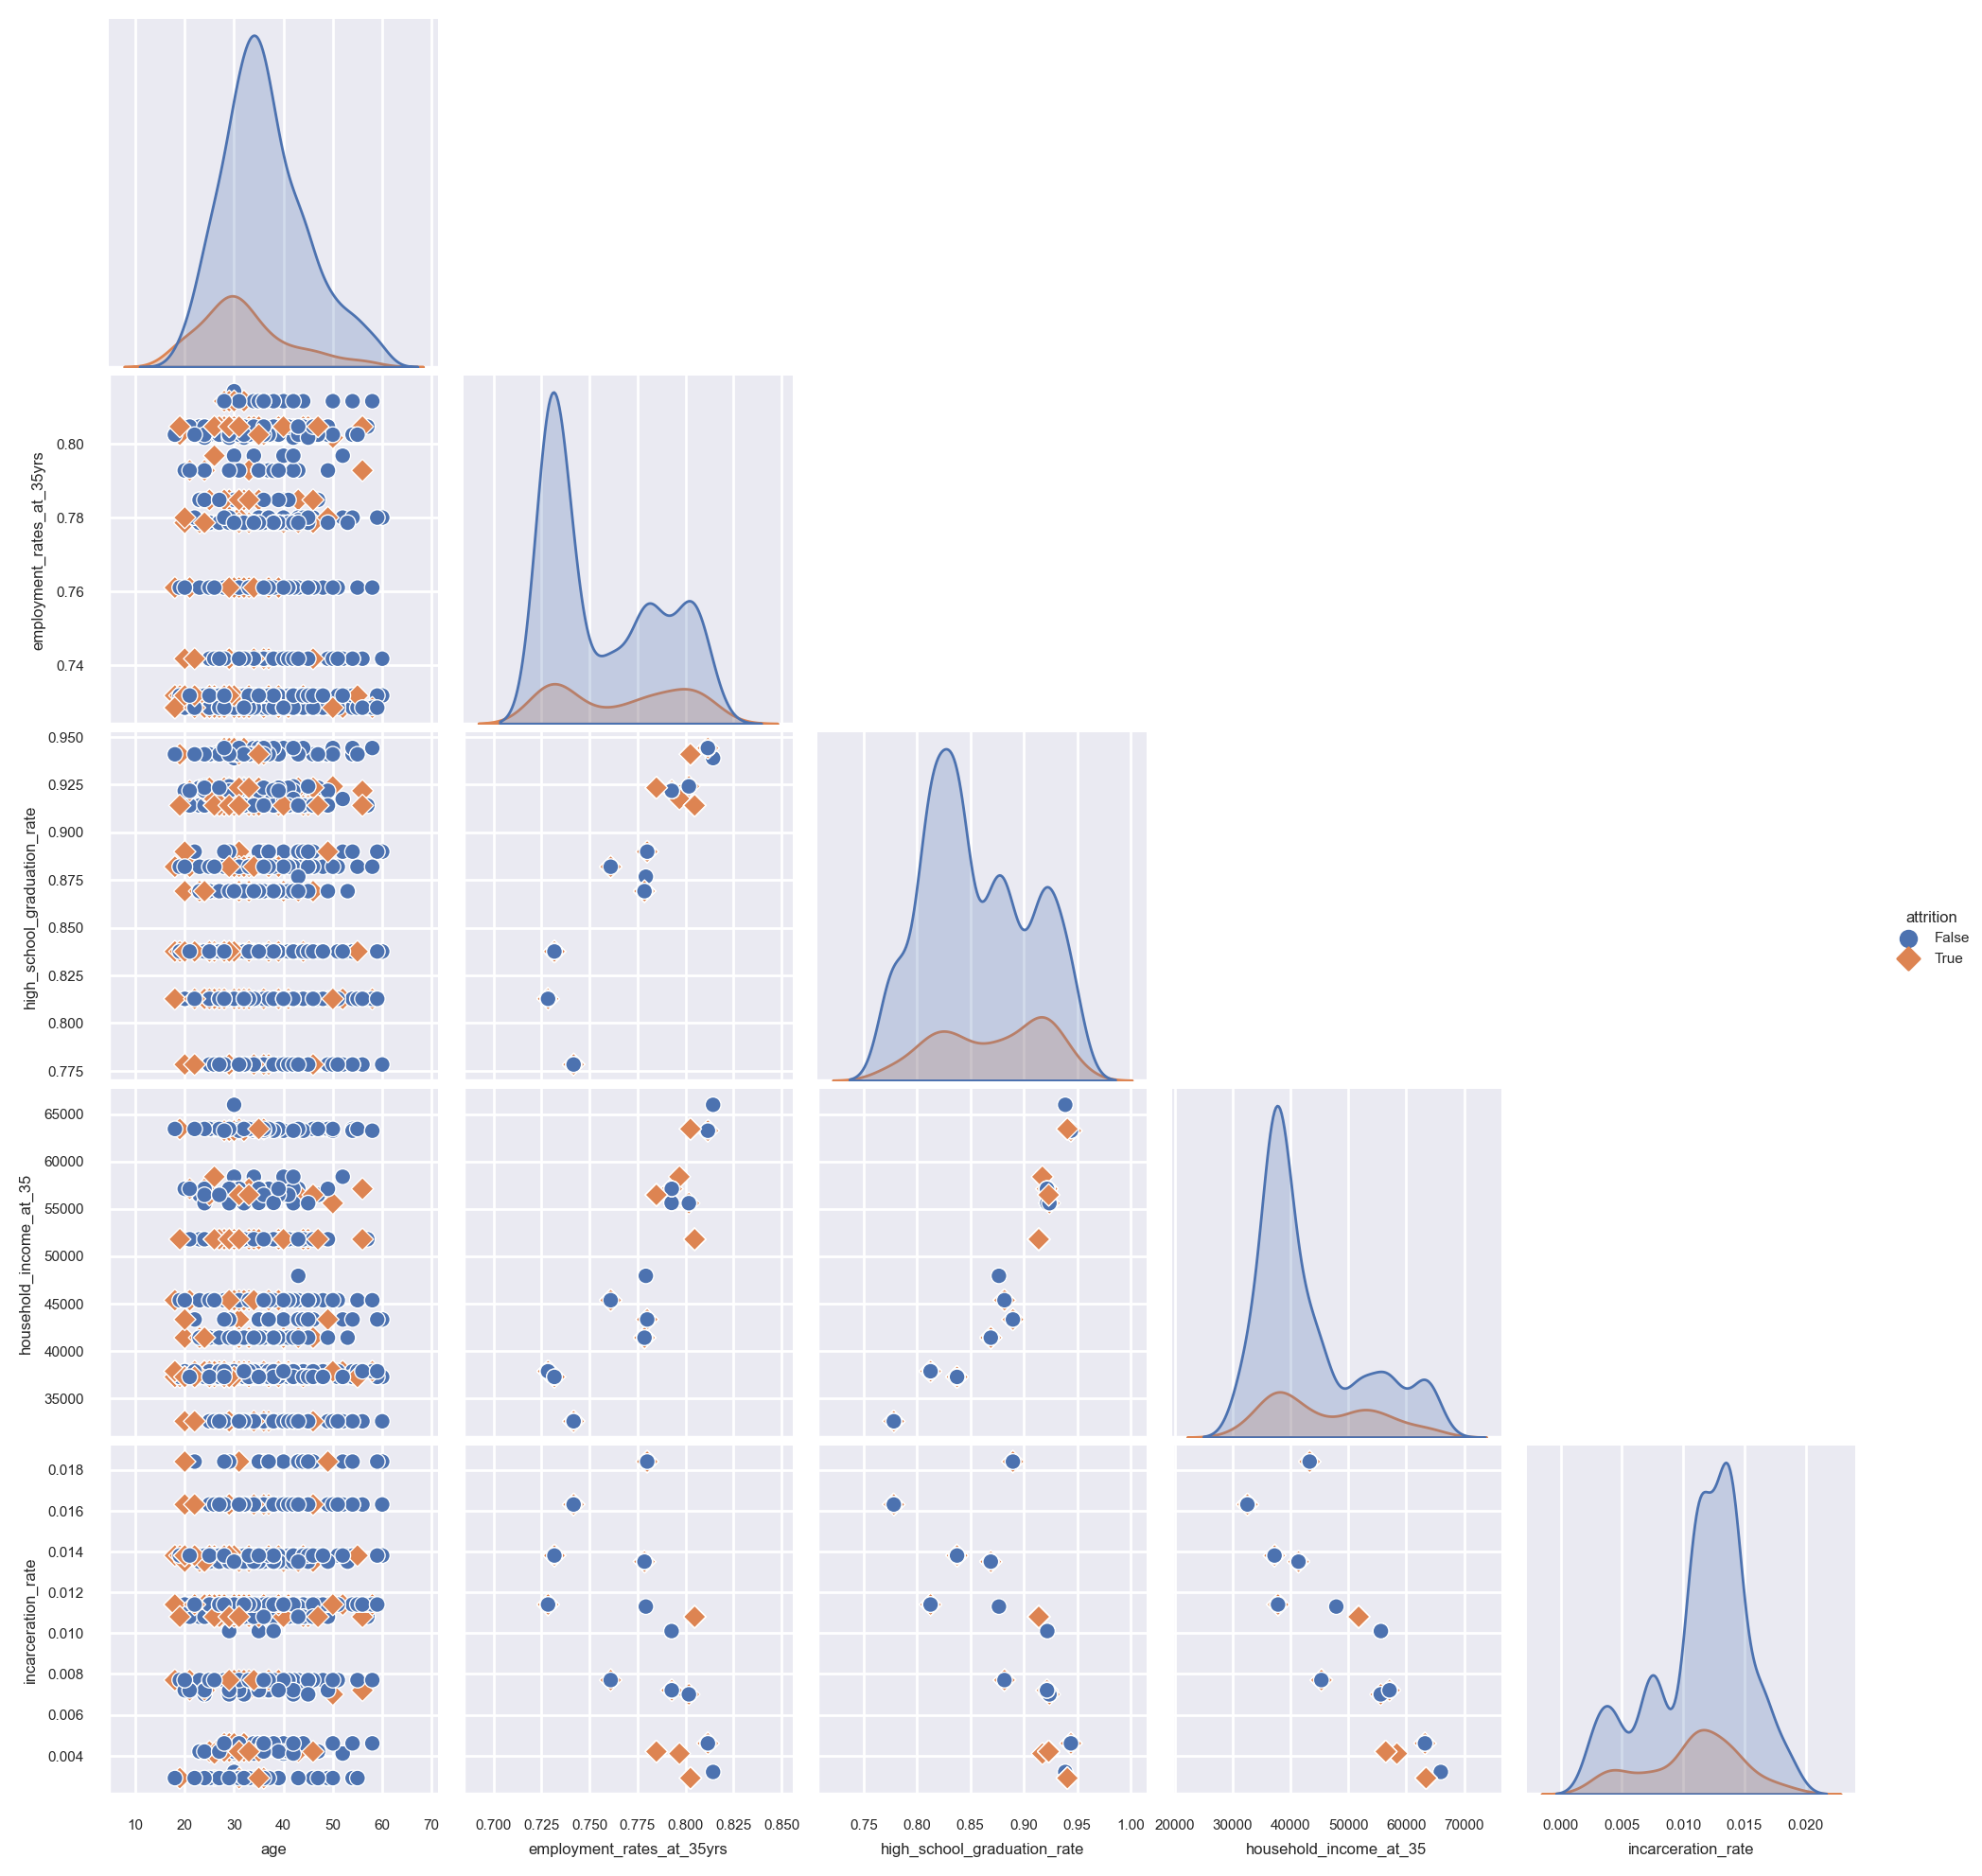

In [69]:
# sns.pairplot (first 6)

sns.pairplot(
    train, 
    vars =[
        'age',
        'employment_rates_at_35yrs',
        'high_school_graduation_rate',
        'household_income_at_35',
        'incarceration_rate'],
    corner = True,  
    hue = "attrition",
    height = 2,
    markers=["o", "D"])

plt.show()

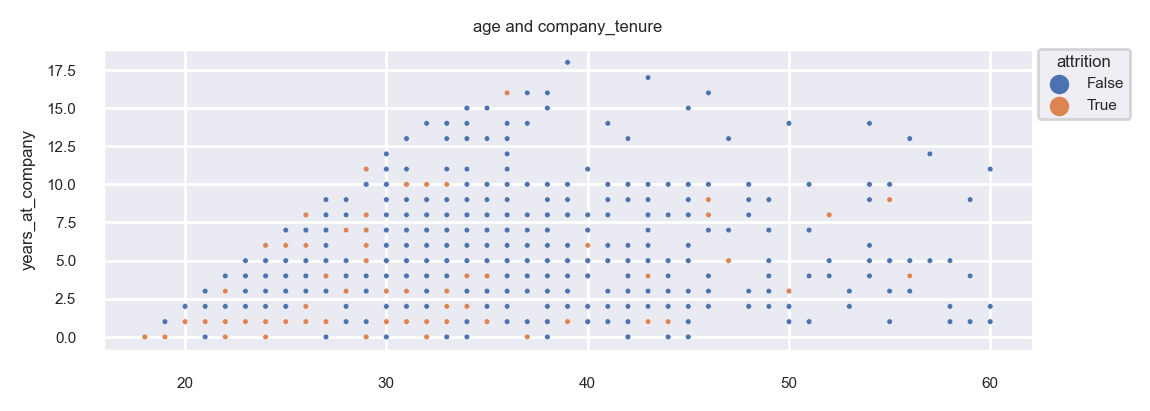

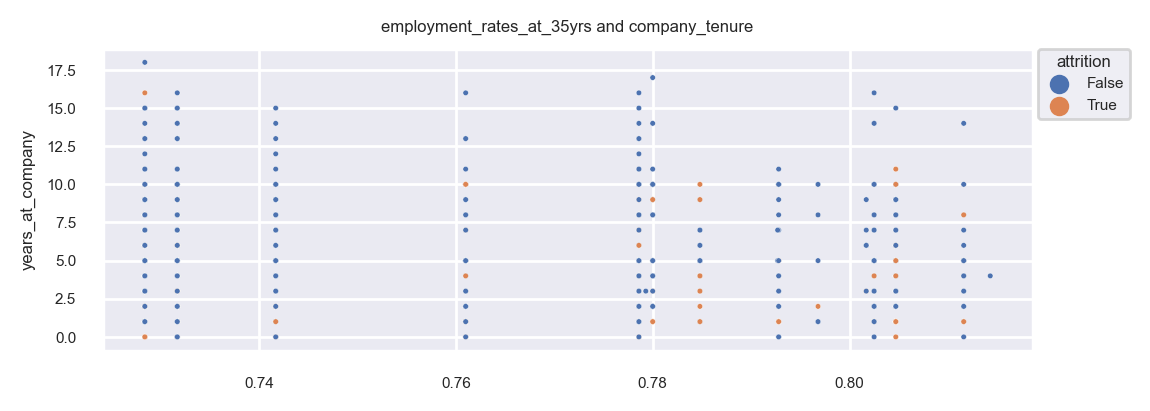

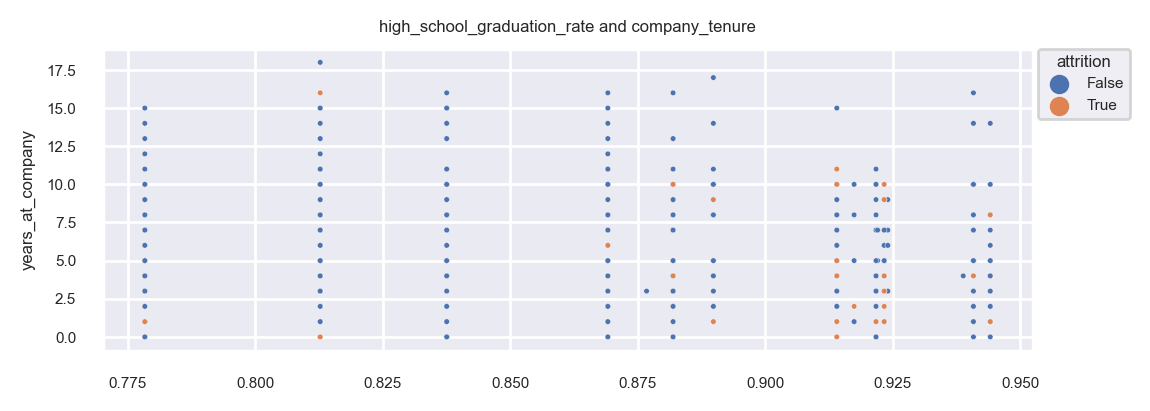

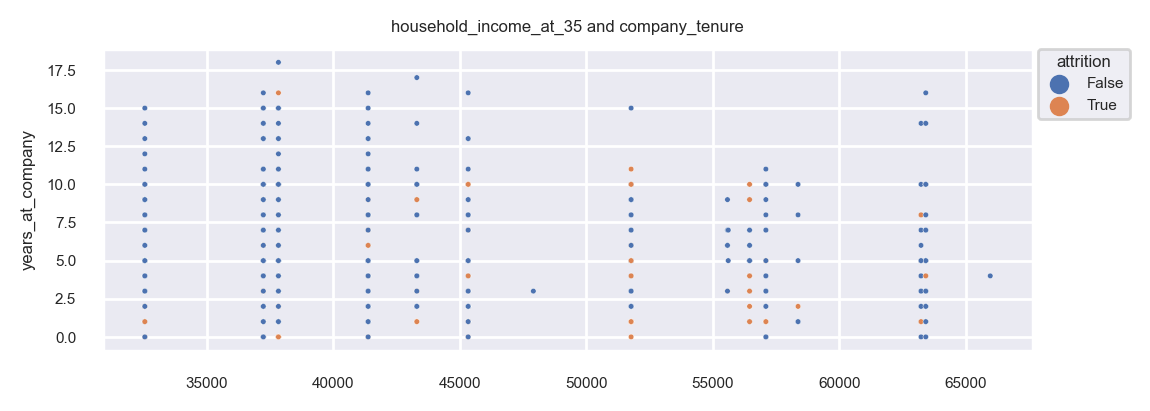

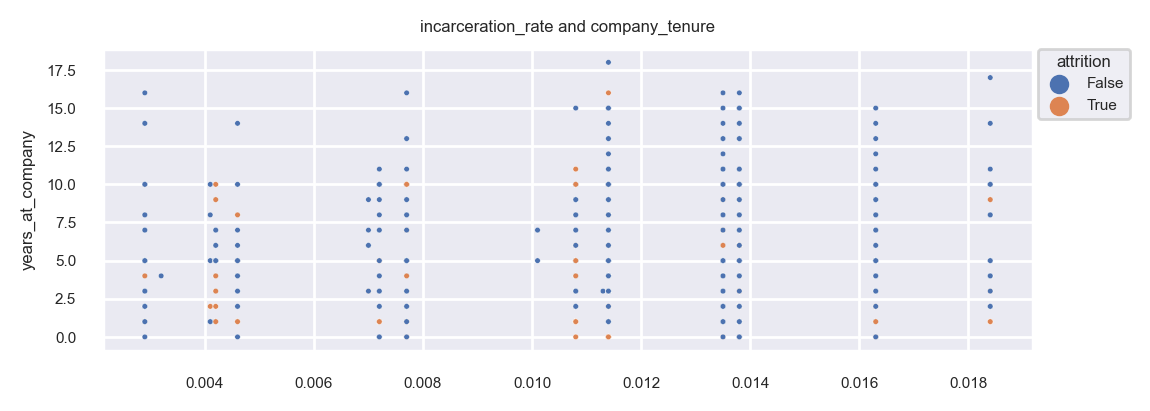

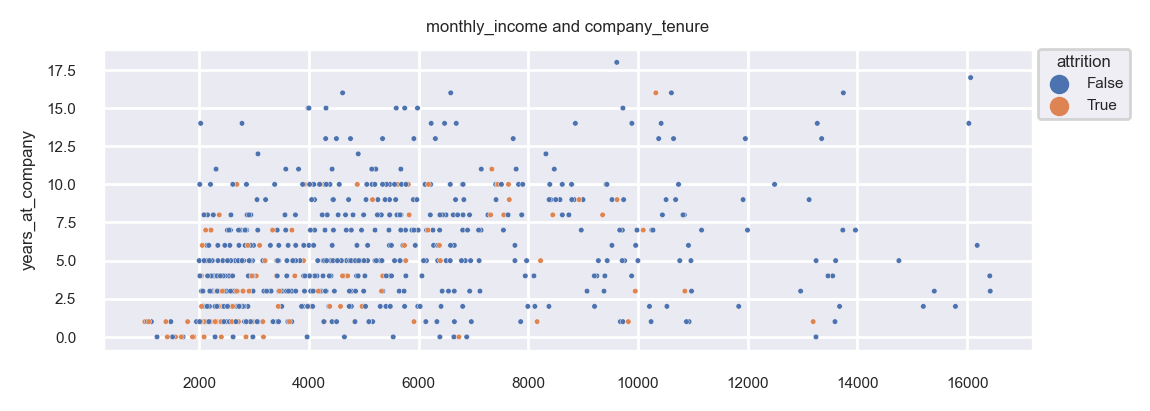

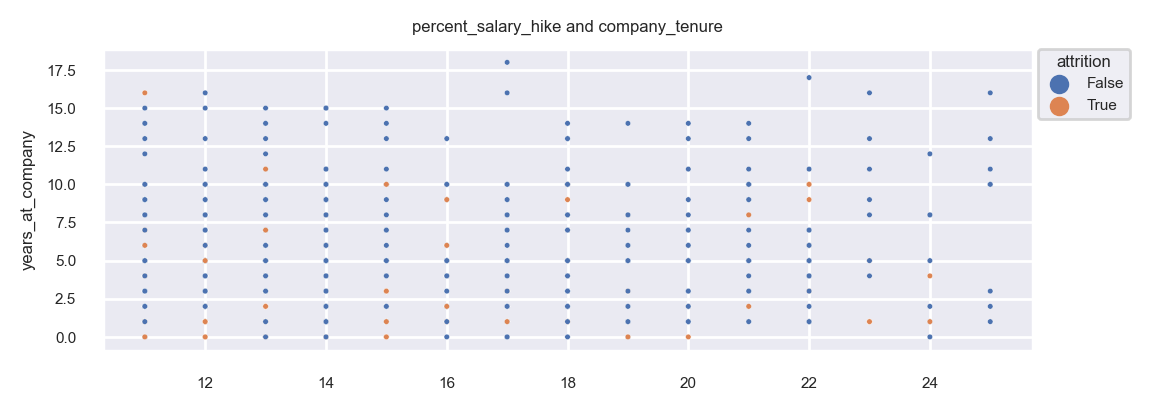

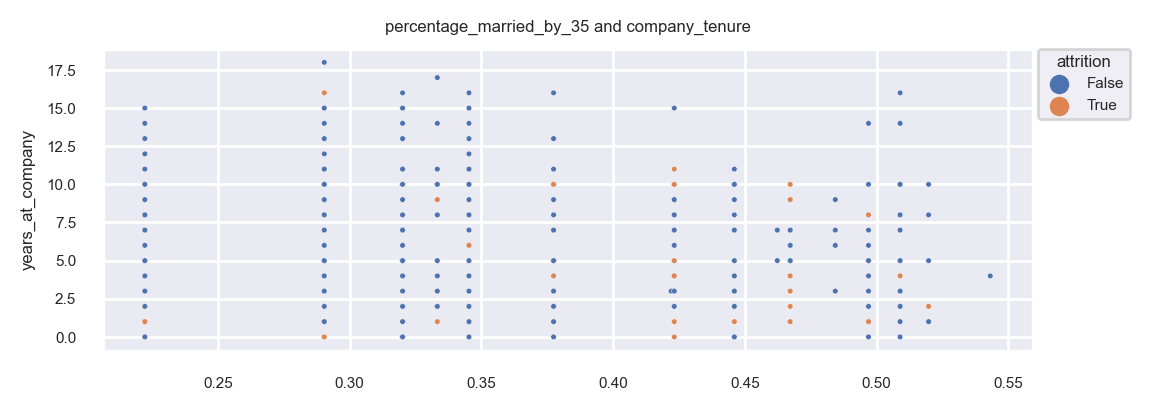

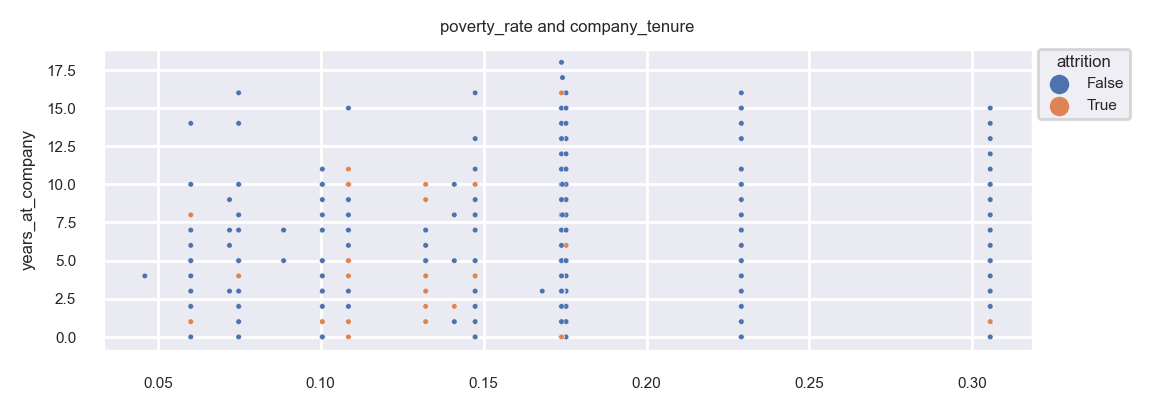

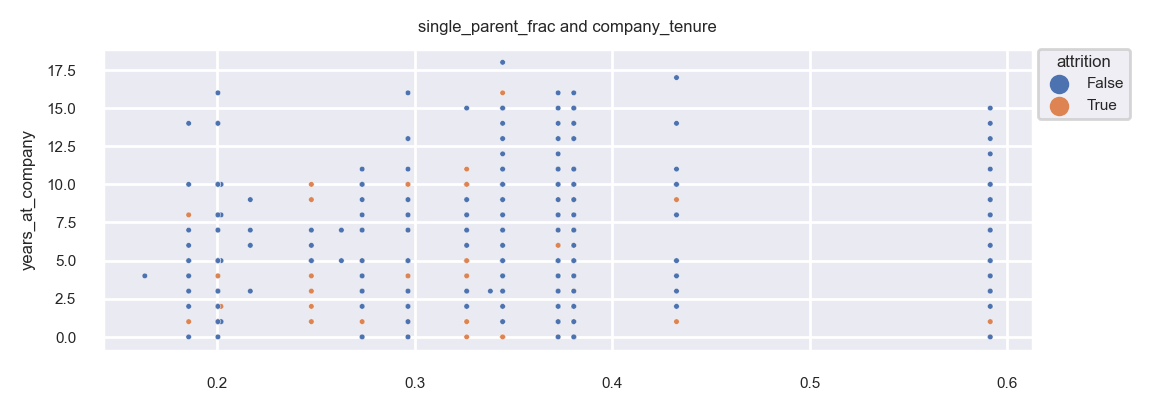

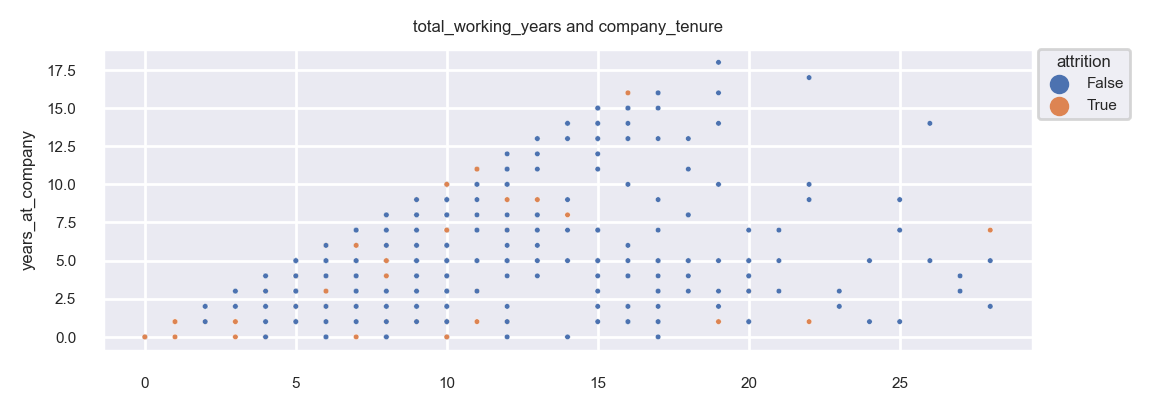

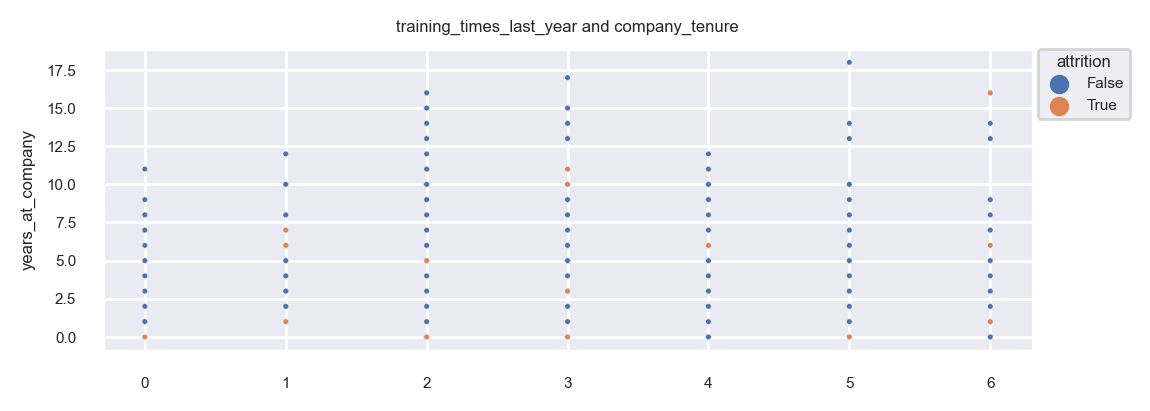

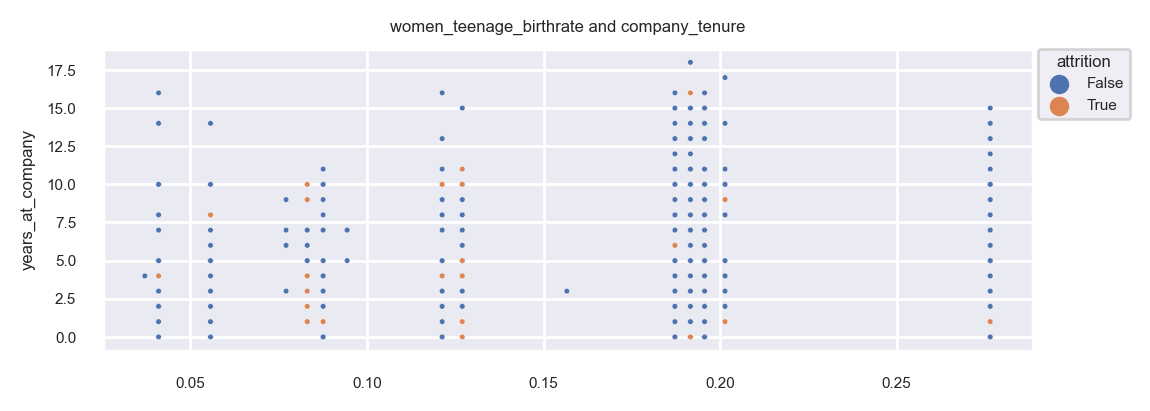

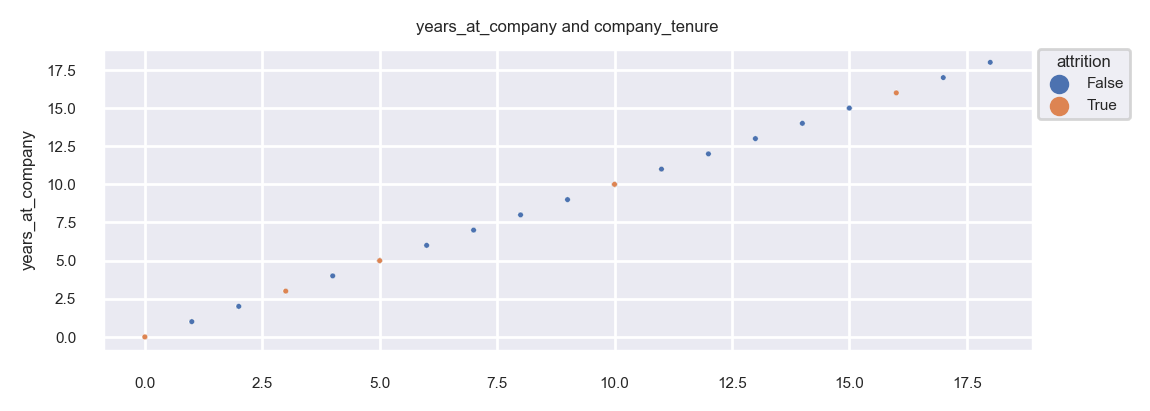

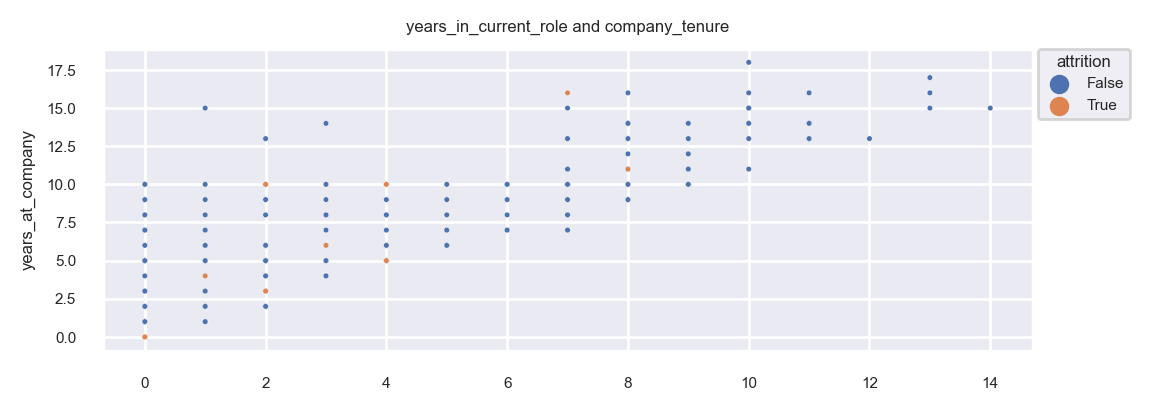

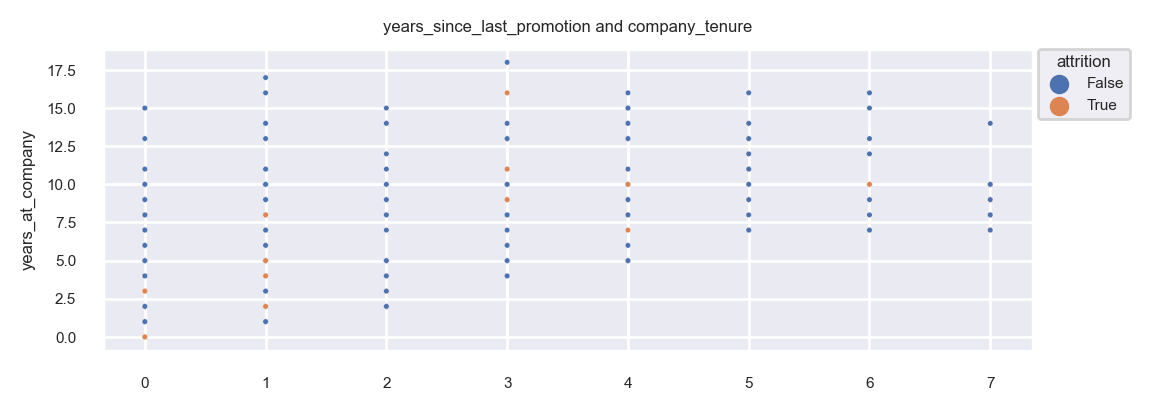

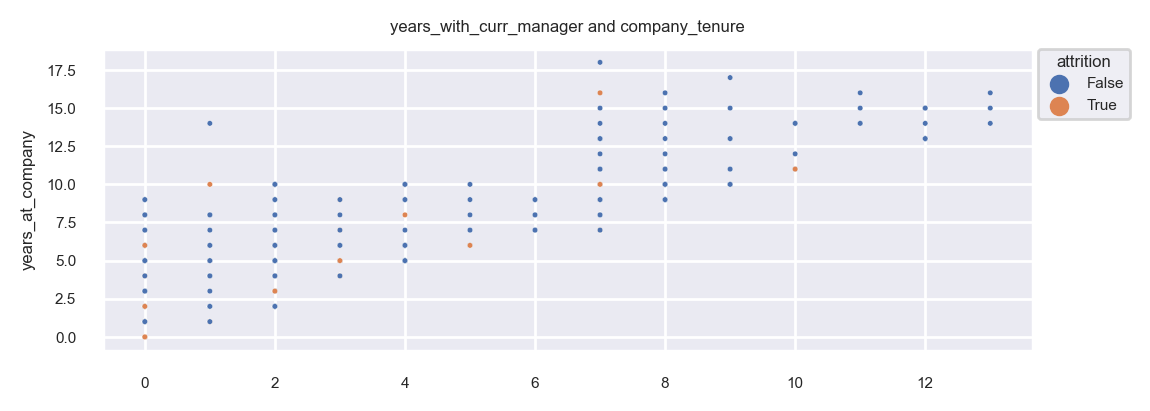

In [ ]:
# plotting continuous variables against target

for col in cont_lst:
    plt.figure(figsize=(6, 2))

    sns.scatterplot(
        train[col],
        train["years_at_company"],
        hue = train["attrition"],
        s = 4)

    plt.legend(
        bbox_to_anchor=(1.105, 1), 
        title = "attrition", 
        loc = 'upper right', 
        borderaxespad = 0)

    plt.title(f'{col} and company_tenure')
    plt.xlabel(None)
    plt.show()

In [101]:
# continuous variables and evaluating statistical signifance in sample mean vs. population mean
import scipy.stats as stats 

alpha = 0.05

metrics = []
for col in cont_lst:
    pop_mean = train[col].mean()
    # sample_2_mean = train[train["attrition"] == False][col]
    sample_1_mean = train[train["attrition"] == True][col]

    t_score, p_value = stats.ttest_1samp(sample_1_mean, pop_mean)

    if p_value < alpha:
        output = {
            "continuous_feature": col,
            "t_score": t_score,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'Column: {col} not statistically significant.')
        print("--------------------------------------")

onesample_t_test_scores = pd.DataFrame(metrics)
onesample_t_test_scores.round(4)

Column: incarceration_rate not statistically significant.
--------------------------------------
Column: percent_salary_hike not statistically significant.
--------------------------------------
Column: single_parent_frac not statistically significant.
--------------------------------------
Column: training_times_last_year not statistically significant.
--------------------------------------
Column: years_since_last_promotion not statistically significant.
--------------------------------------


continuous_feature  t_score  p_value
0                           age    -4.31     0.00
1     employment_rates_at_35yrs     2.72     0.01
2   high_school_graduation_rate     2.59     0.01
3        household_income_at_35     2.38     0.02
4                monthly_income    -4.64     0.00
5      percentage_married_by_35     2.37     0.02
6                  poverty_rate    -2.41     0.02
7           total_working_years    -5.68     0.00
8       women_teenage_birthrate    -2.12     0.04
9              years_at_company    -5.01     0.00
10        years_in_current_role    -4.31     0.00
11      years_with_curr_manager    -4.41     0.00

In [102]:
onesample_t_test_scores.continuous_feature.tolist()

['age',
 'employment_rates_at_35yrs',
 'high_school_graduation_rate',
 'household_income_at_35',
 'monthly_income',
 'percentage_married_by_35',
 'poverty_rate',
 'total_working_years',
 'women_teenage_birthrate',
 'years_at_company',
 'years_in_current_role',
 'years_with_curr_manager']

----

**``1-sample T-test results summary:``**

After initial continuous hypotheses testing against the population mean - we can conclude that the following features/variables hold a statistical relationship with the target:

1. age
2. employment rates at 35yrs
3. high school graduation rate
4. household income at 35
5. monthly income
6. percentage married by 35
7. poverty rate
8. total working years
9. women teenage birthrate
10. years at company
11. years in current role
12. years with curr manager

<u>questions/thoughts after analysis:</u>

there are several features/variables that I will want to further investigate against the population. For example, I wonder if certain features such as "the percentage of single parents" in communities, or the "total number of years since an employee's last promotion" may be less linear and tests such as non-parametric/linear relationship testing may be more suitable for evaluating them against a population.

----
### ``Hypothesis Tests: Categorical/Discrete Variables``

$H_0$: "There is NO association/relationship between observed variable outcomes and expected employee attrition."

$H_a$: "There IS an association/relationship between observed variable outcomes and expected employee attrition."

$\alpha$ = 1 - confidence level (95% confidence level)

$\alpha$: 0.05

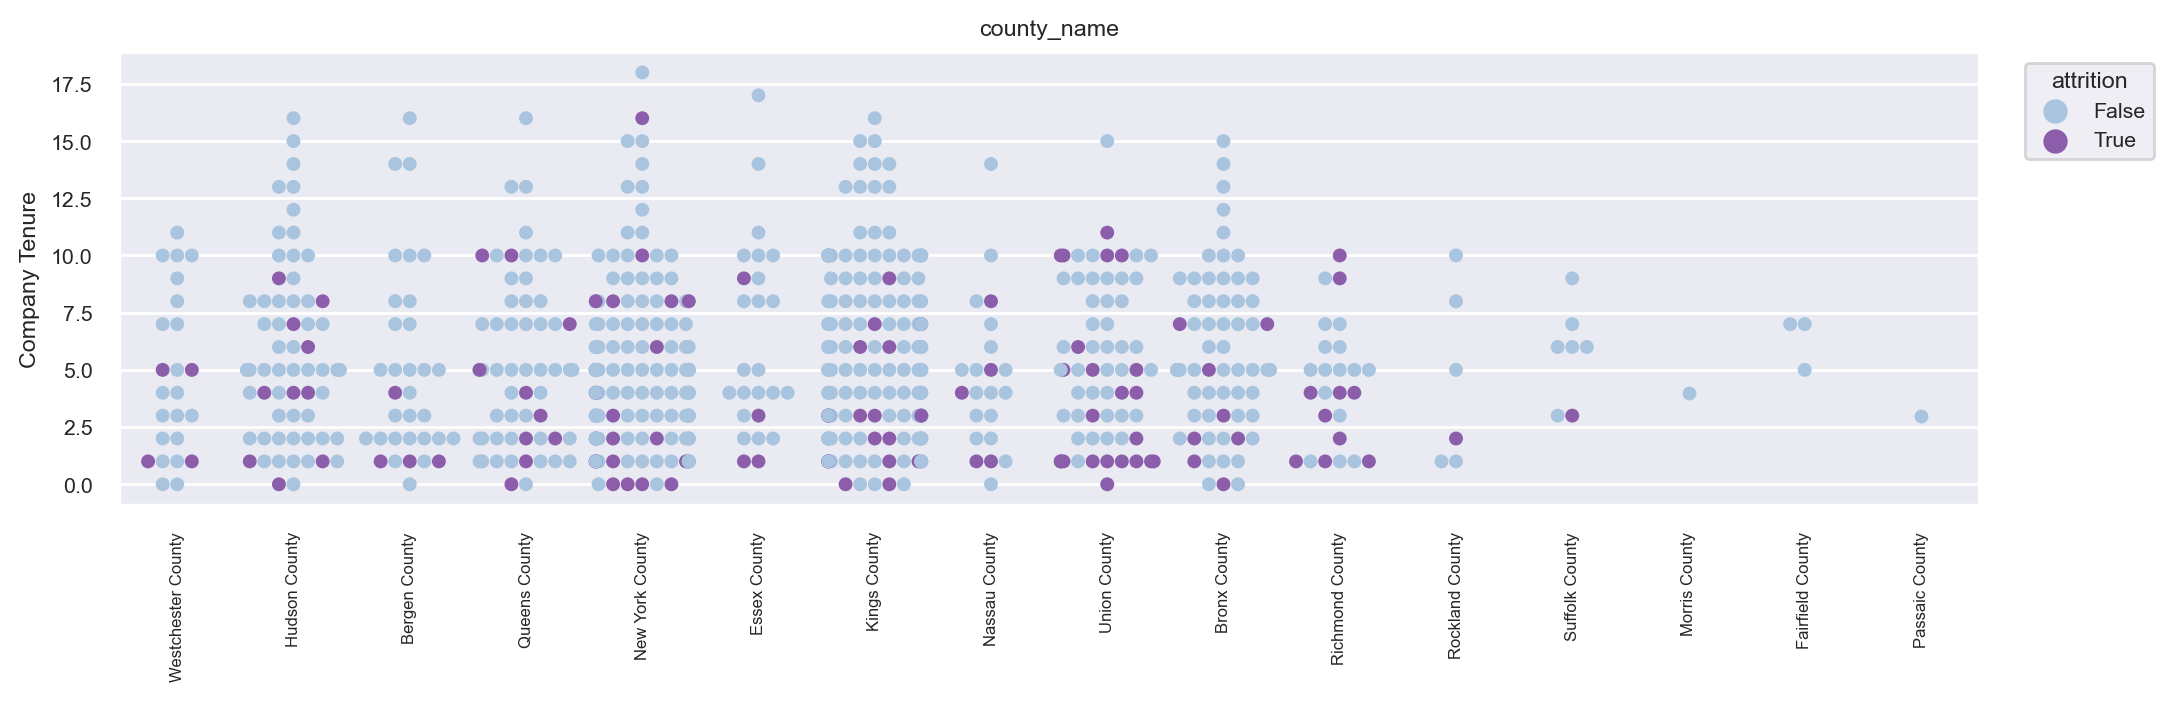

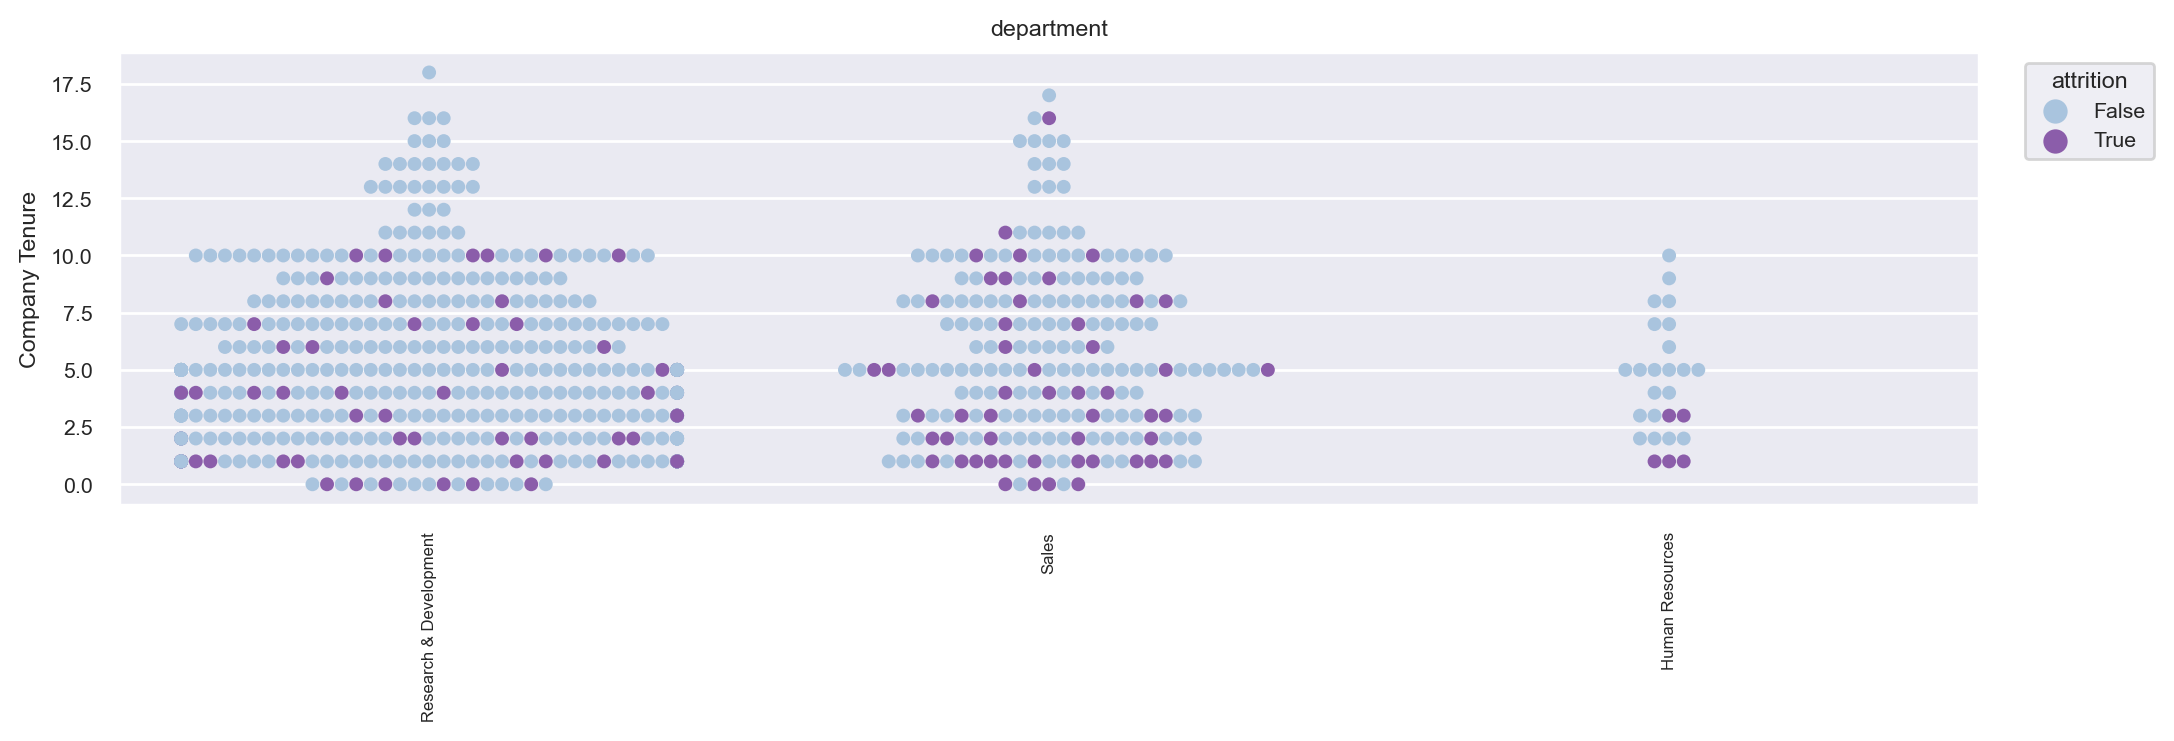

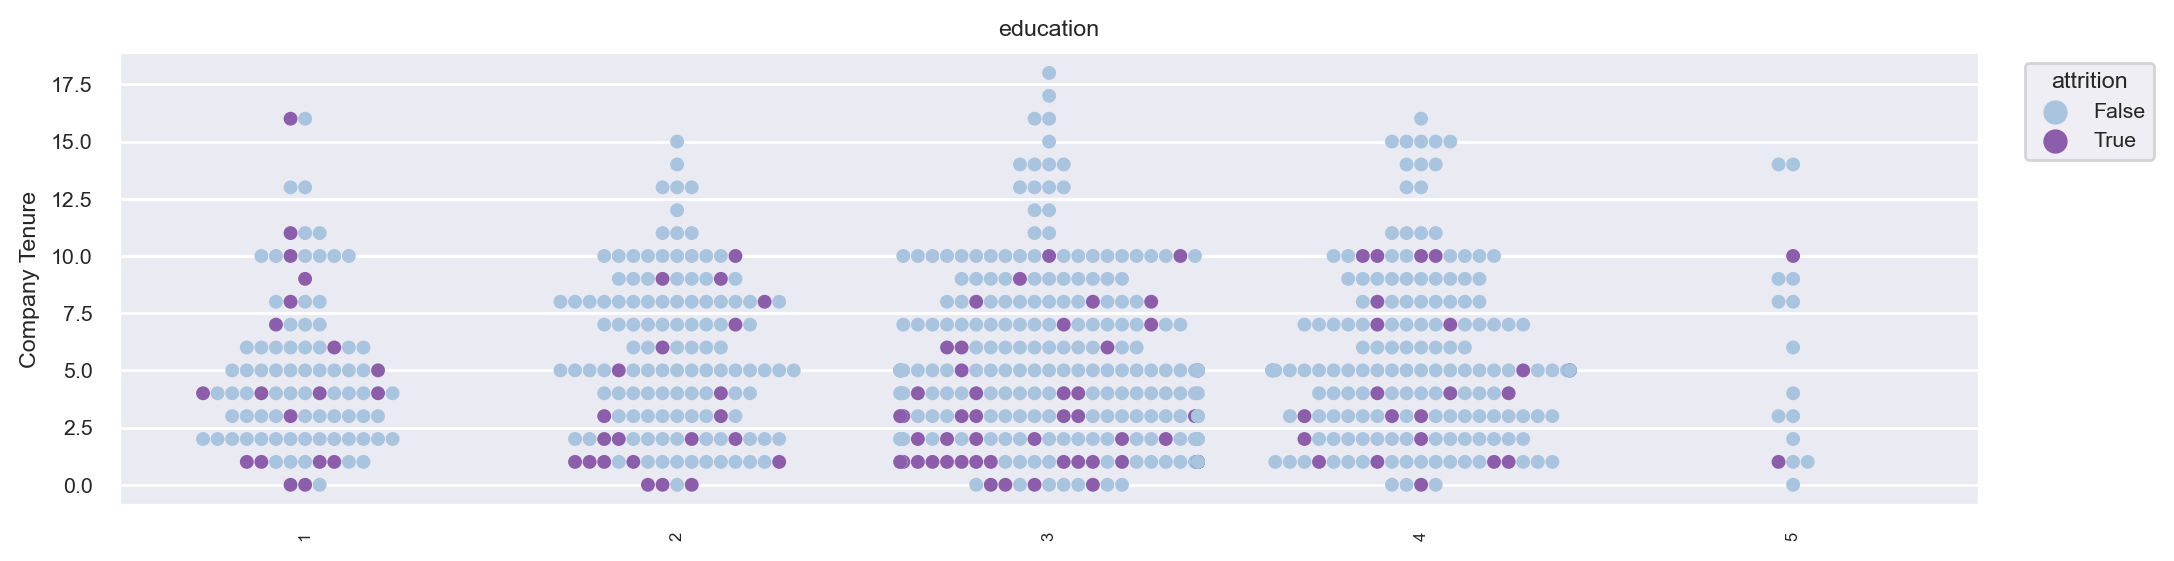

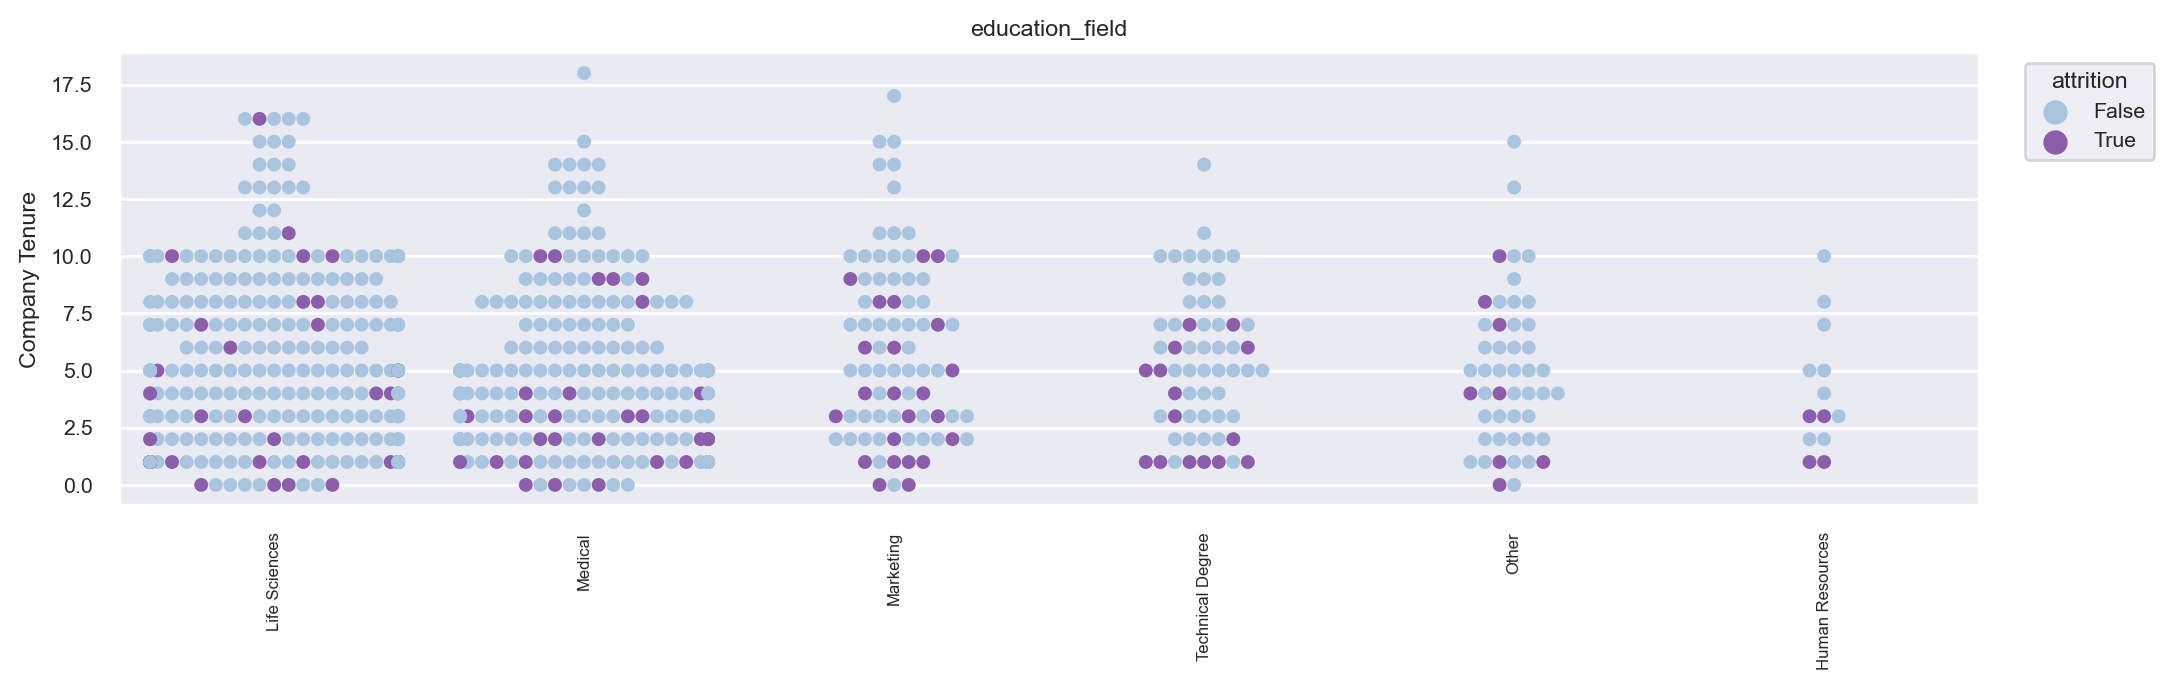

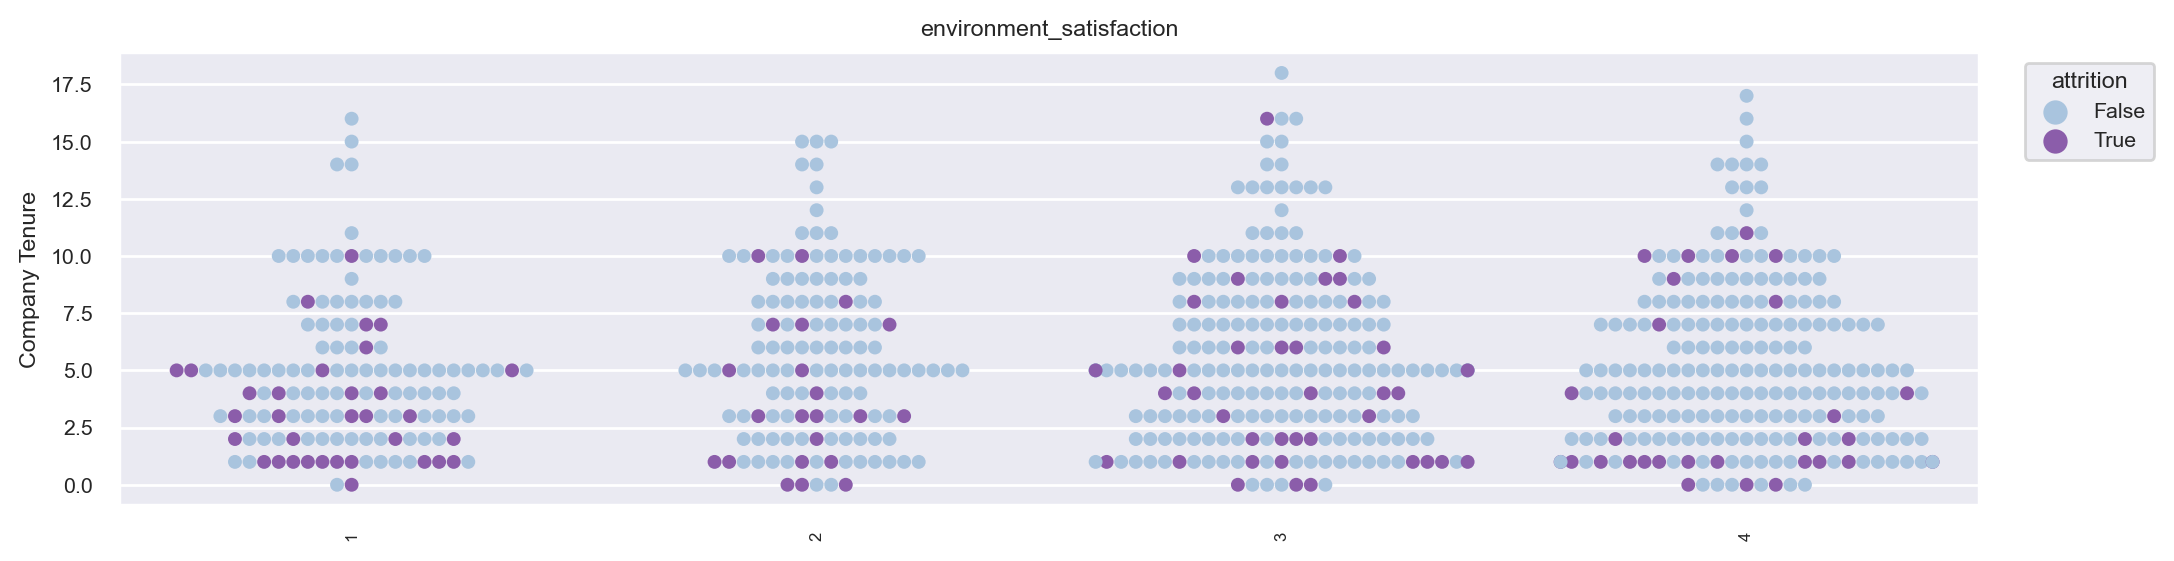

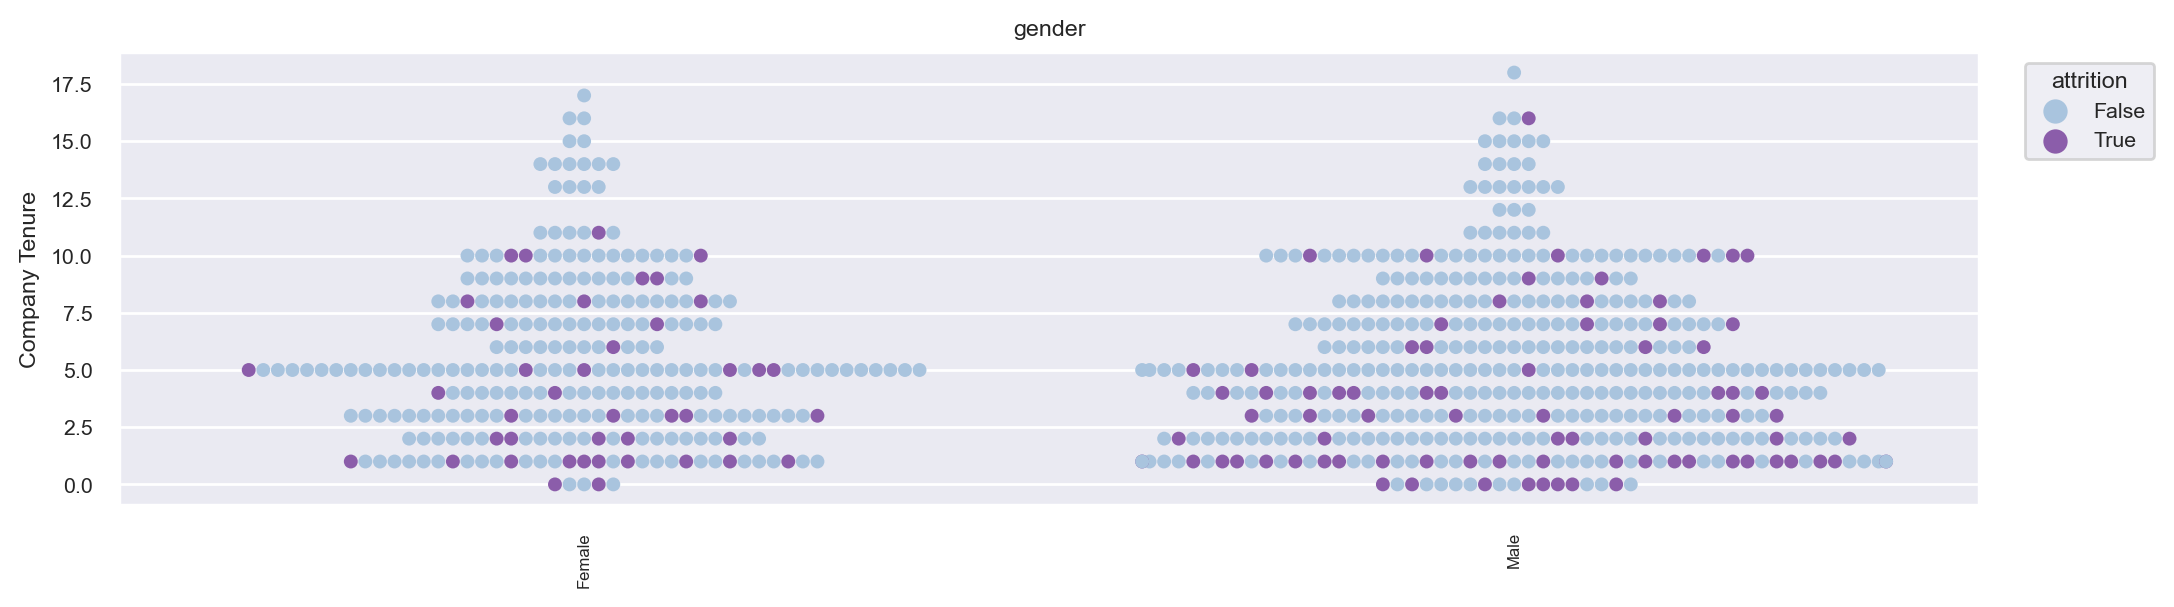

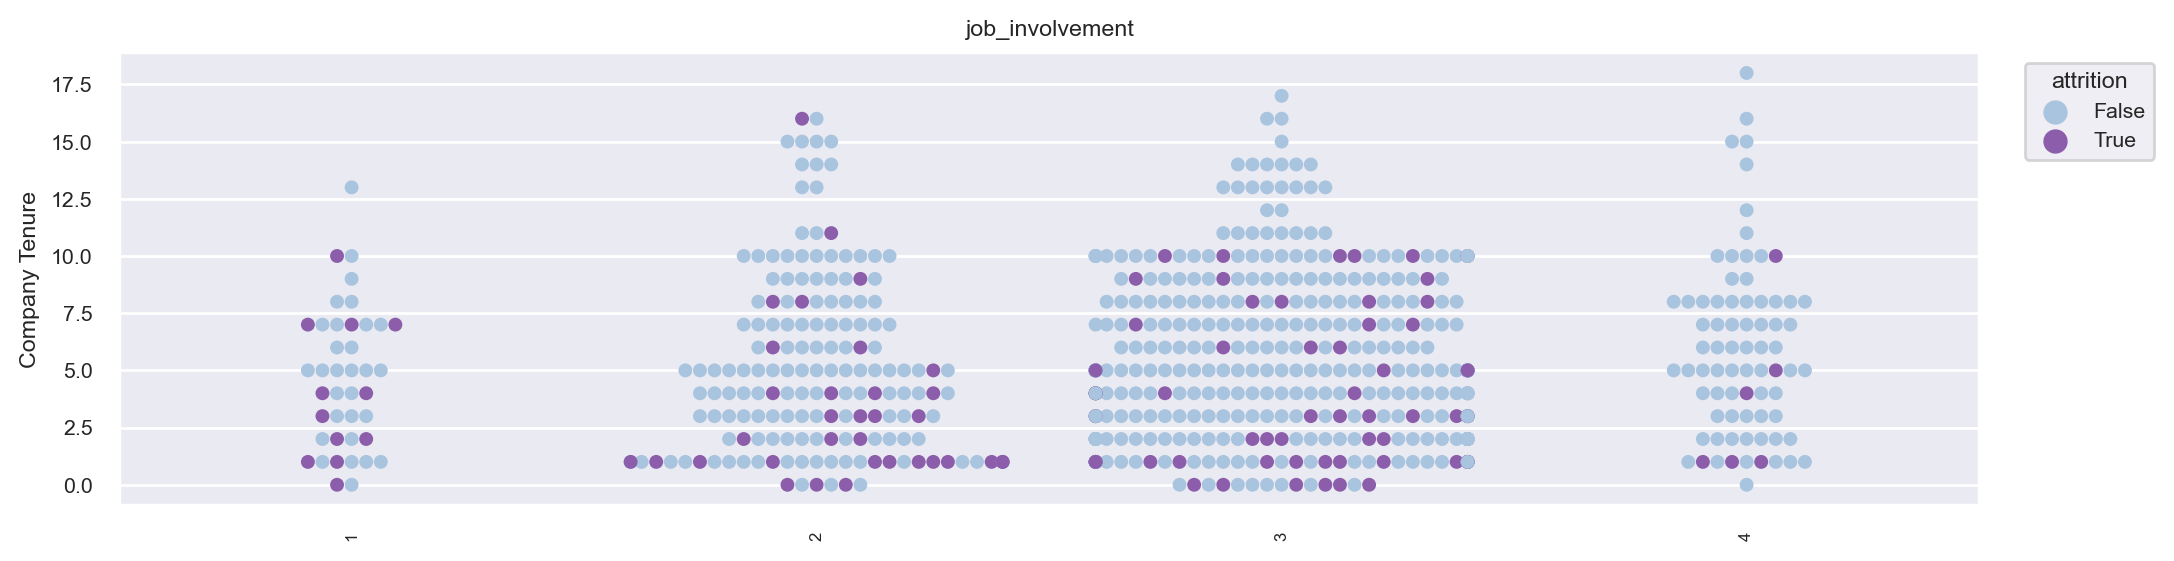

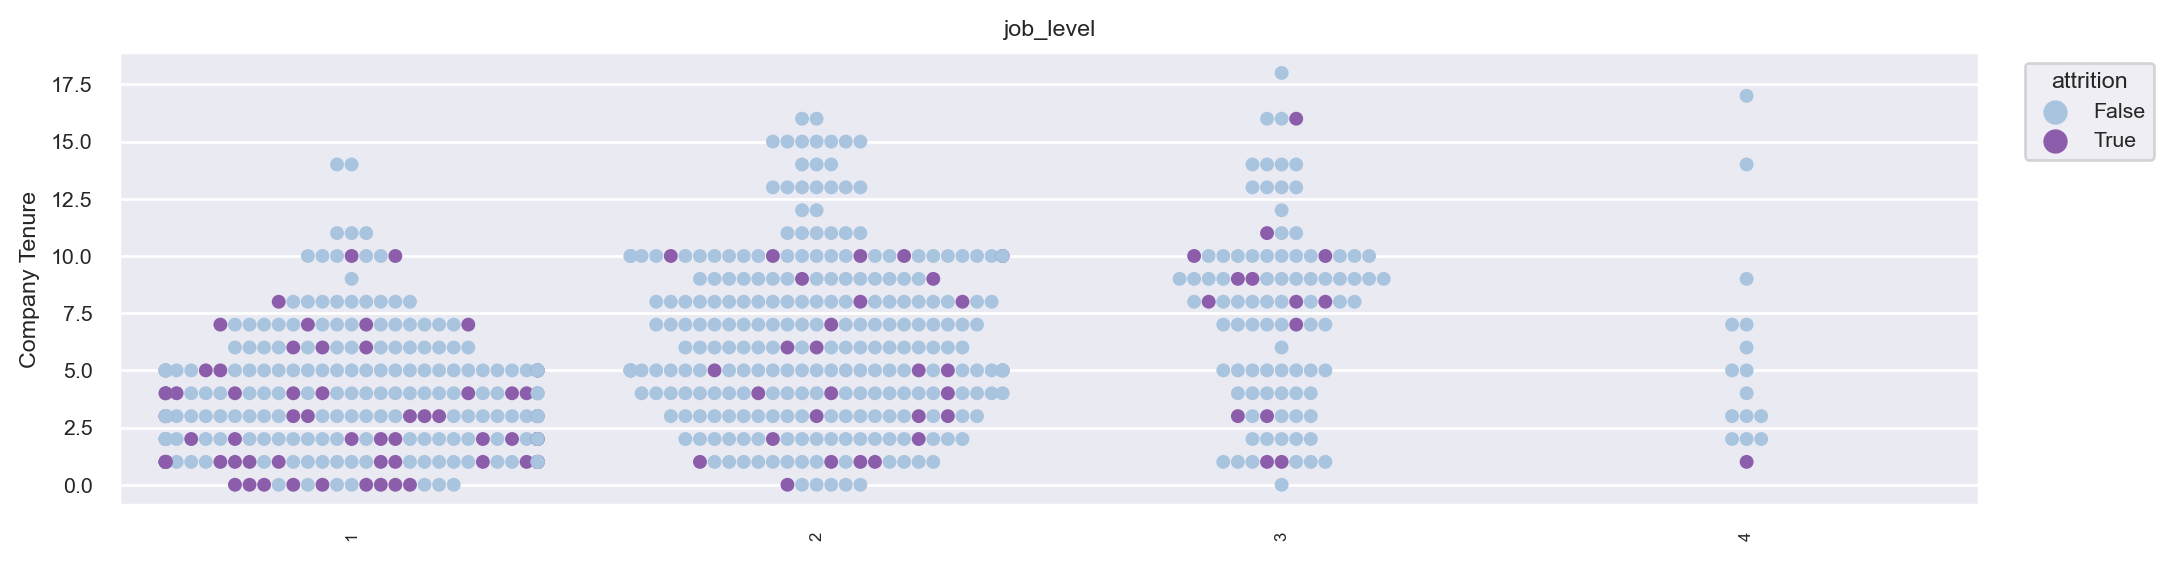

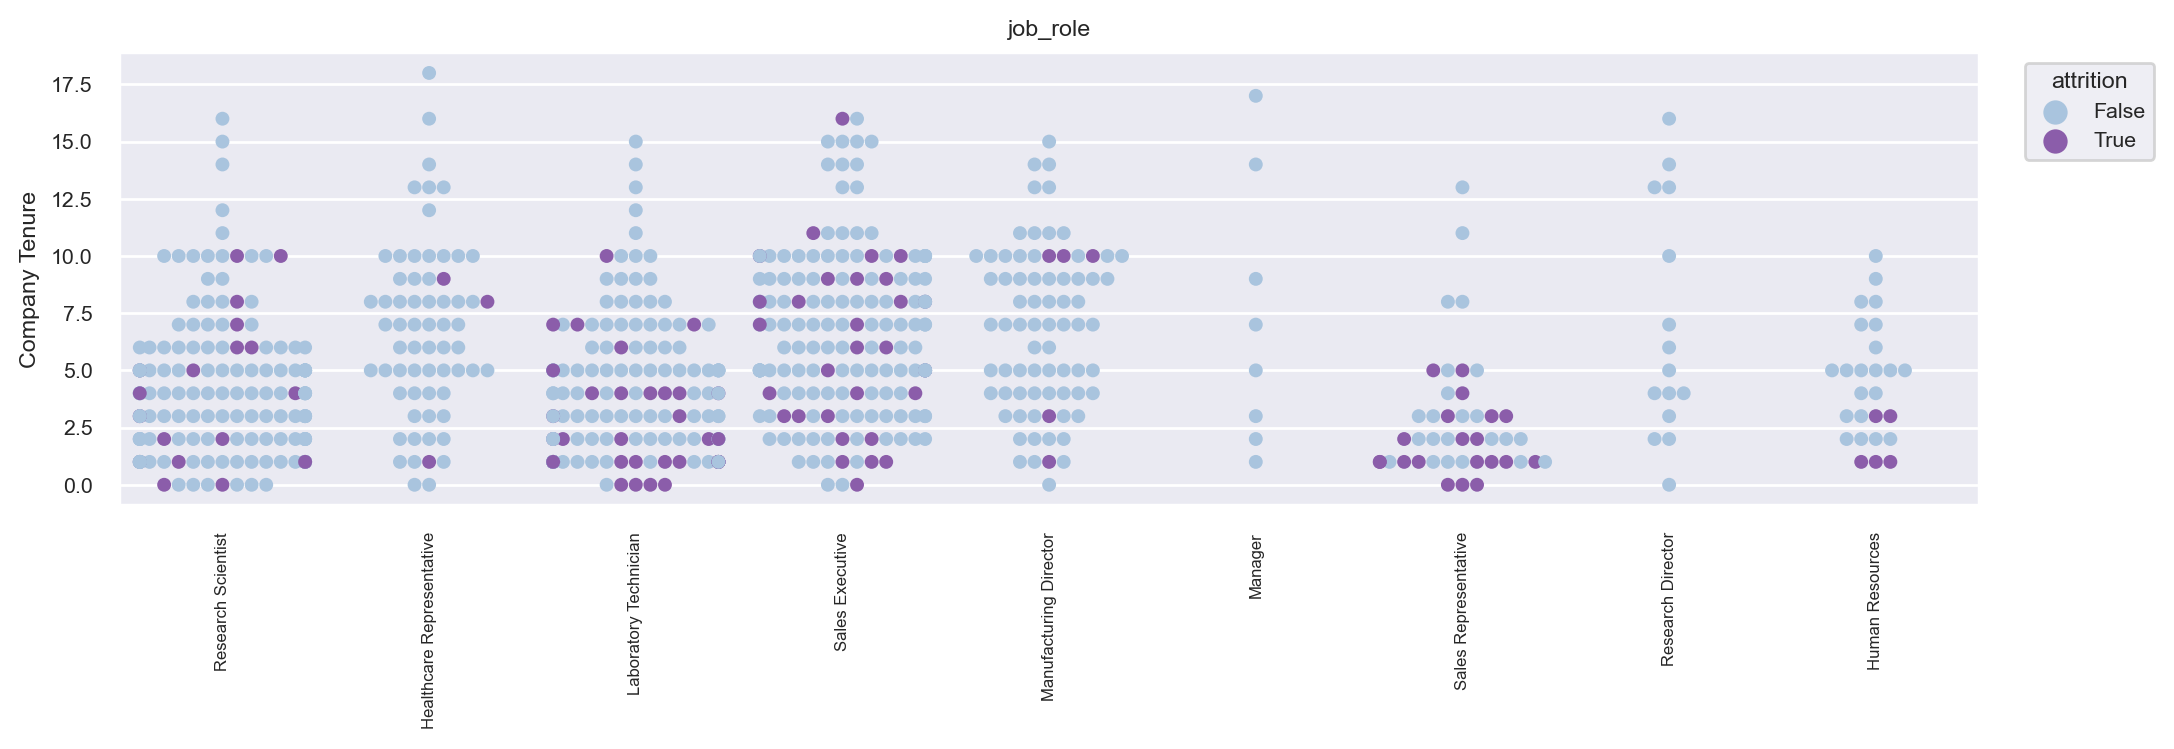

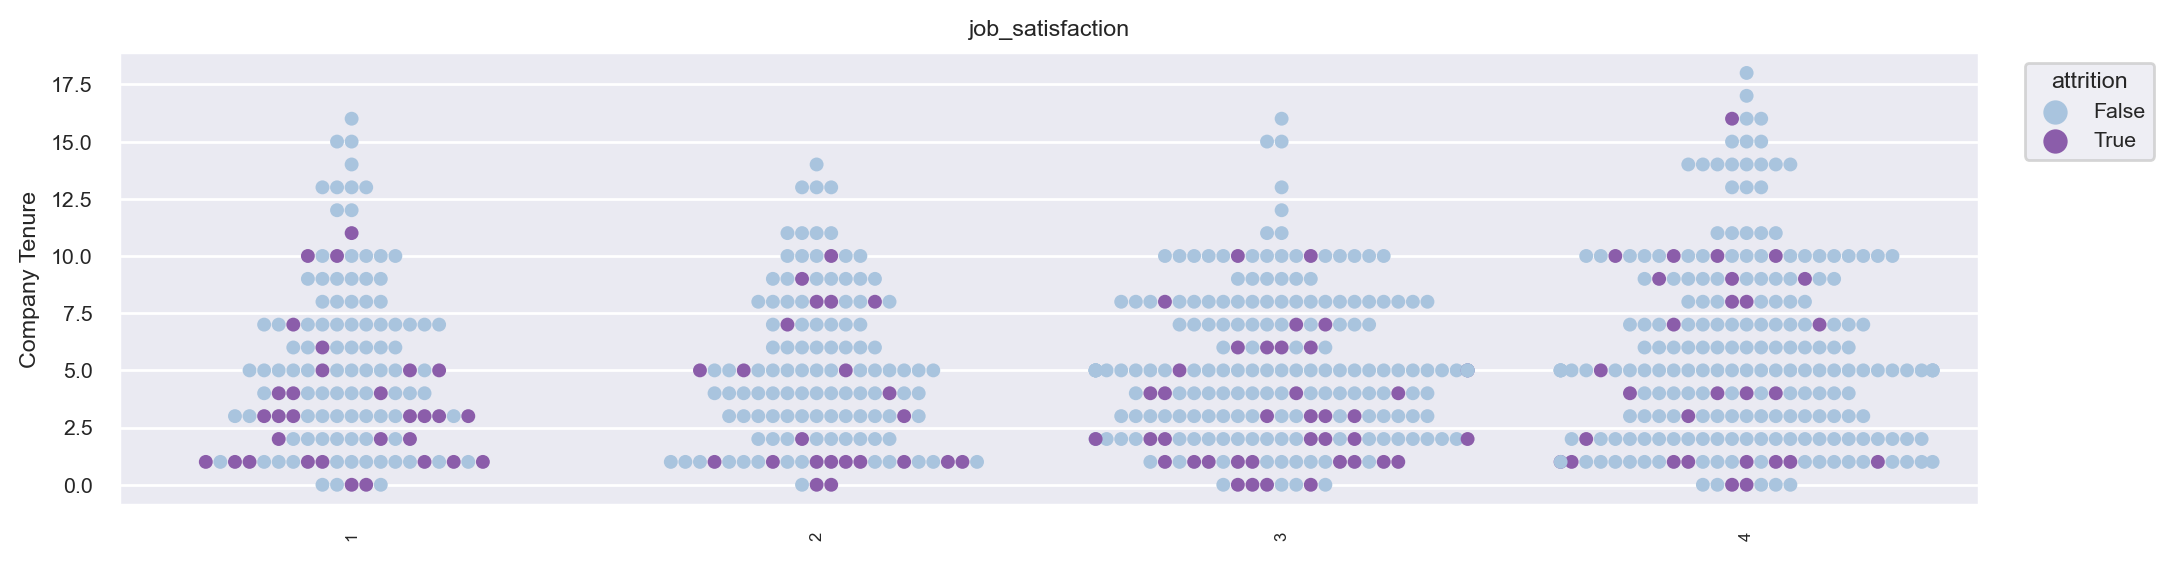

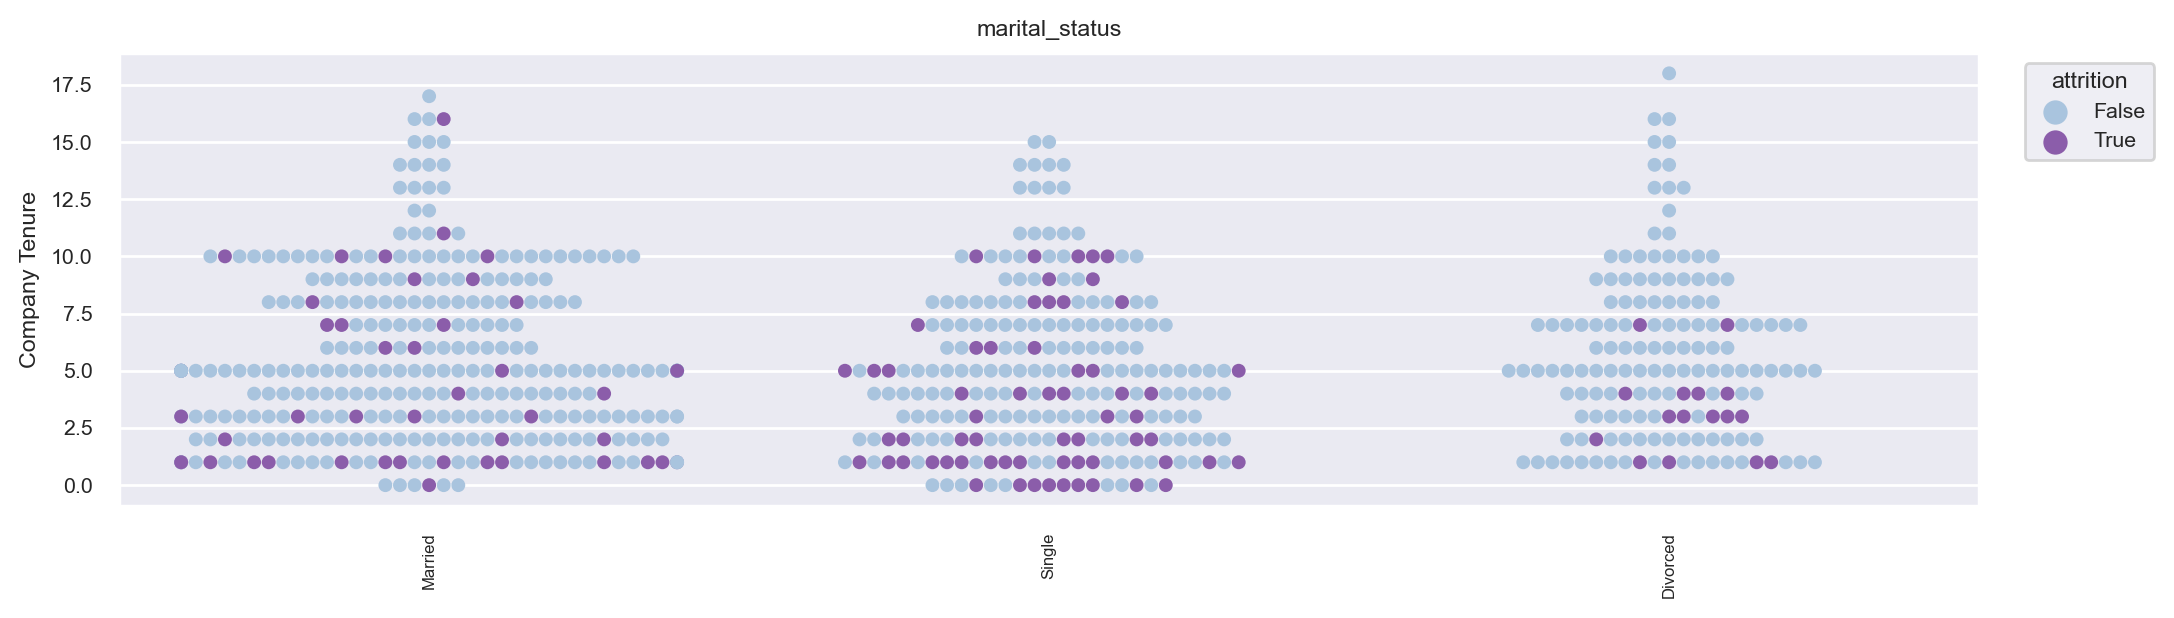

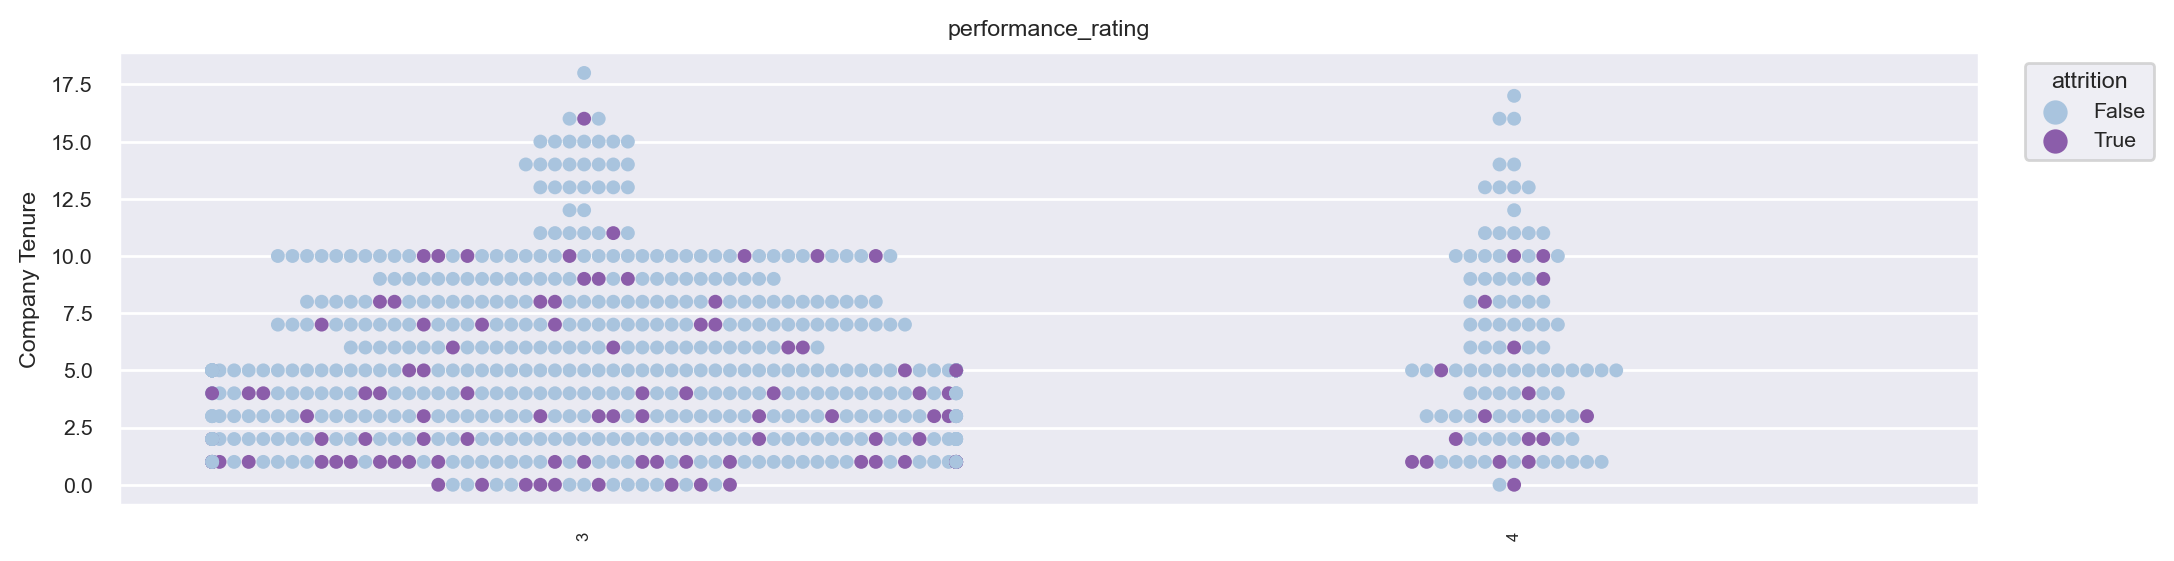

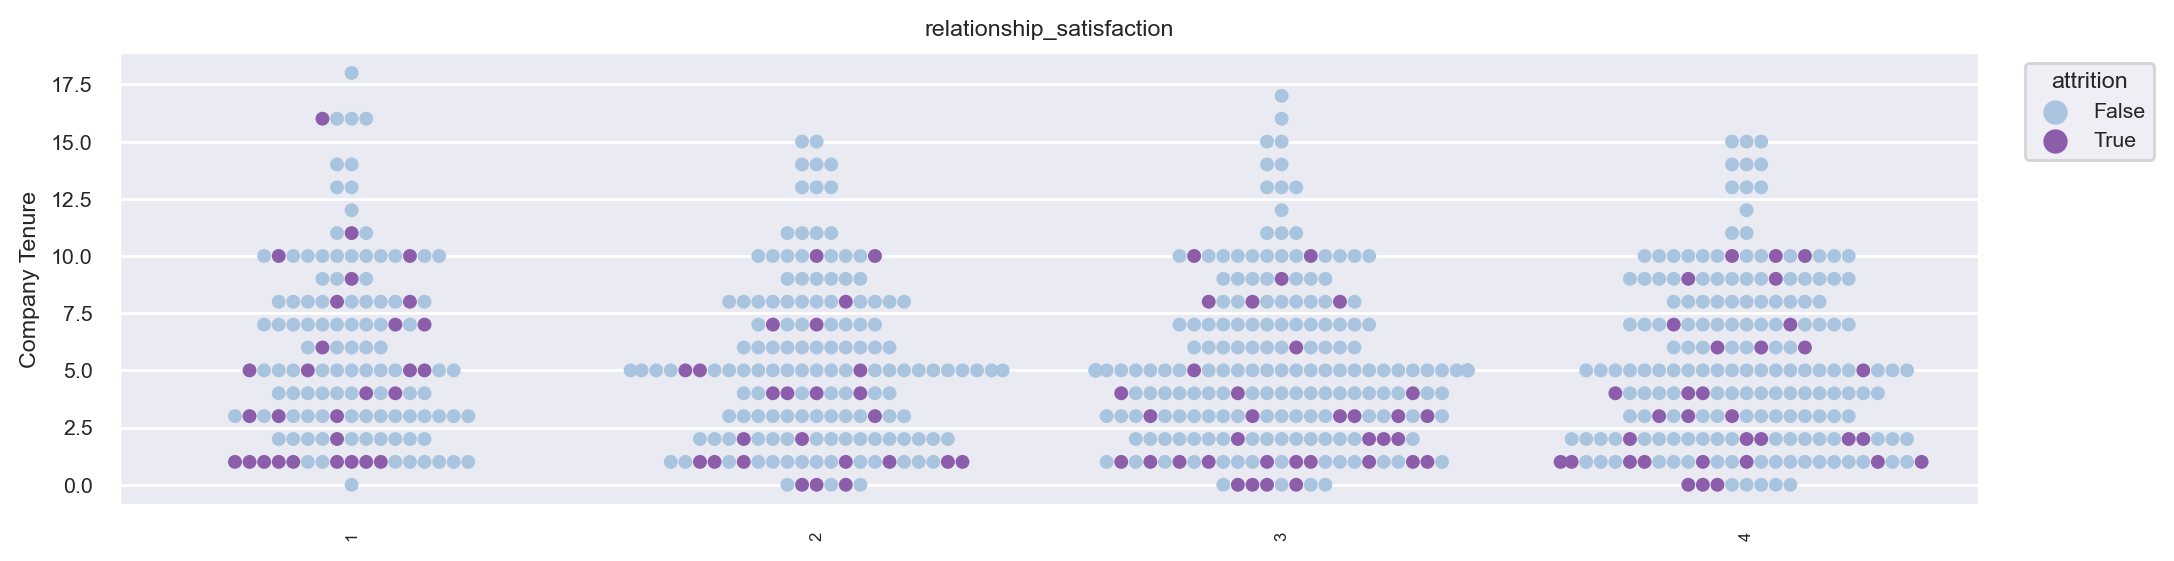

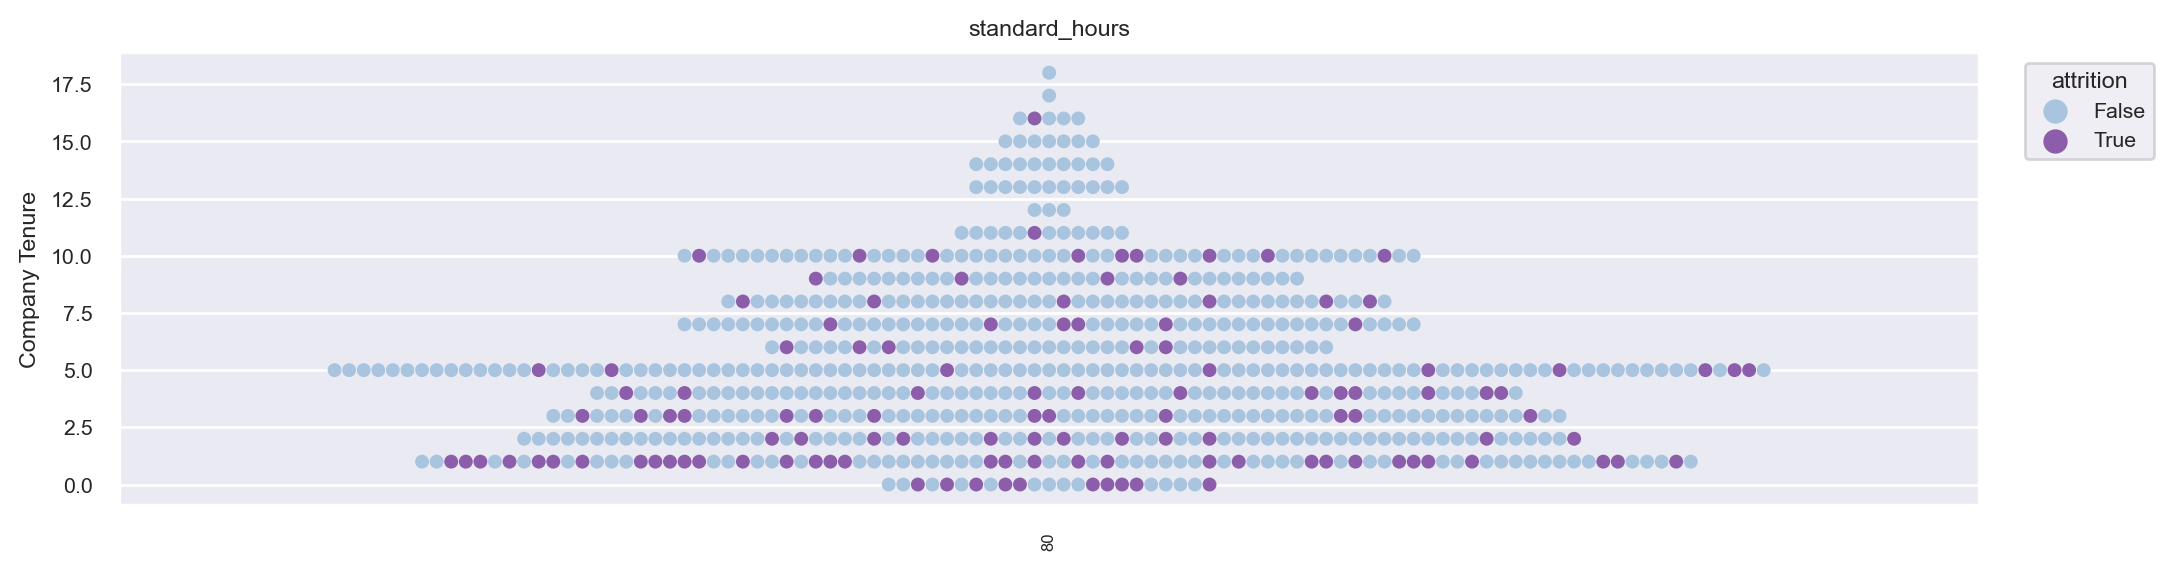

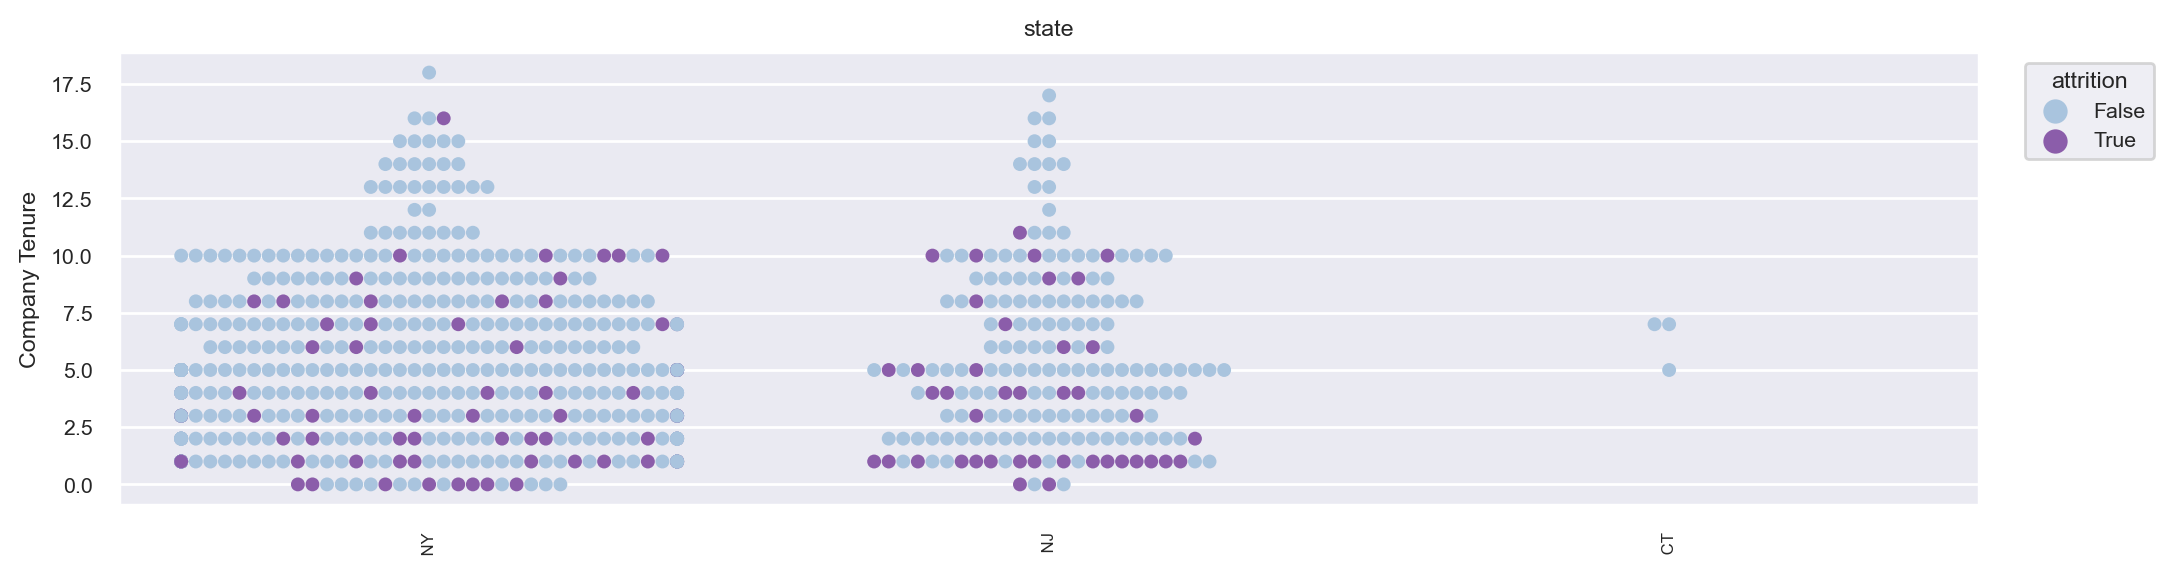

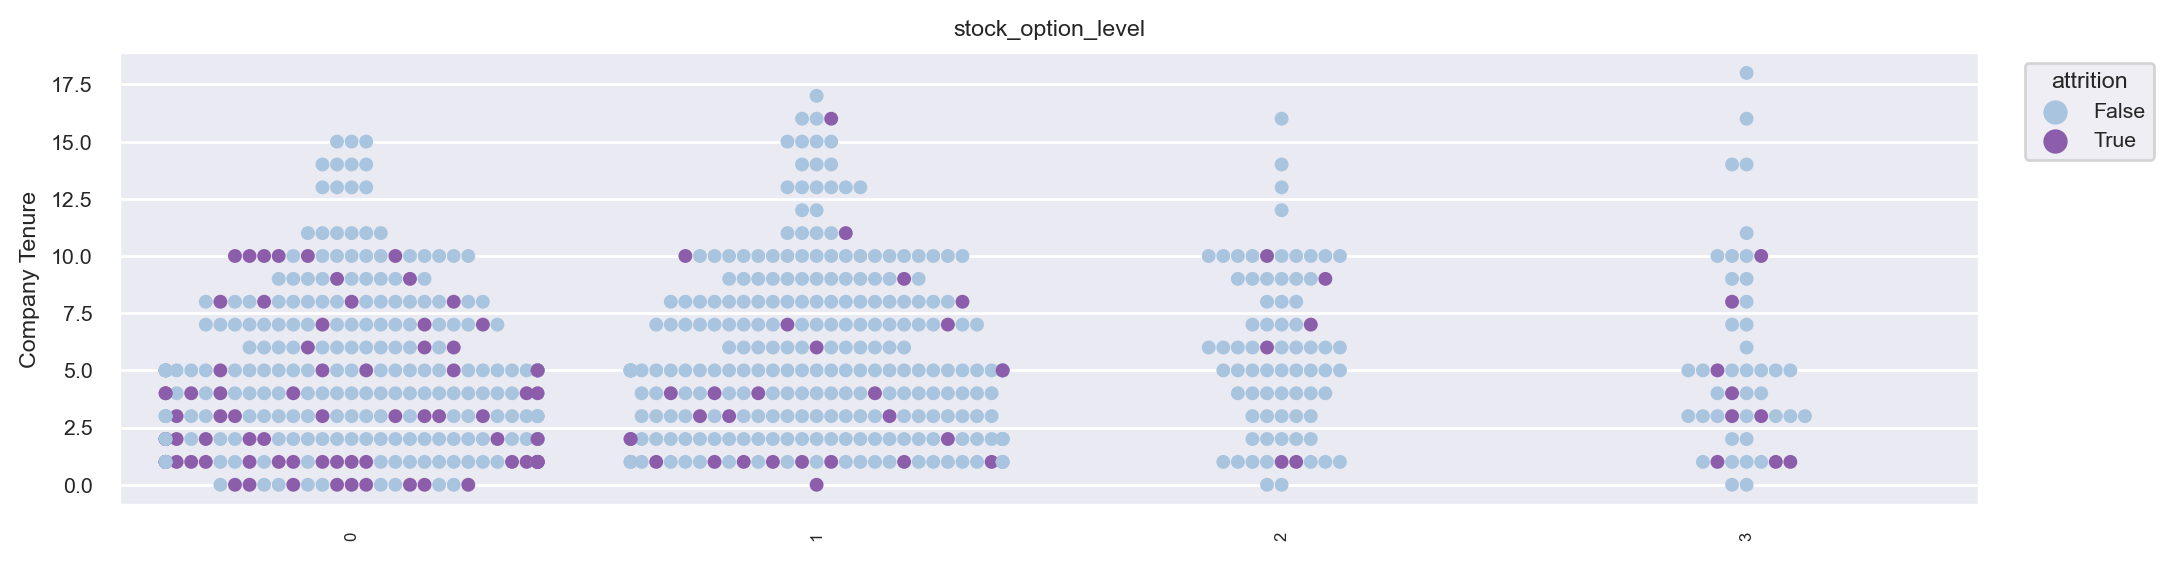

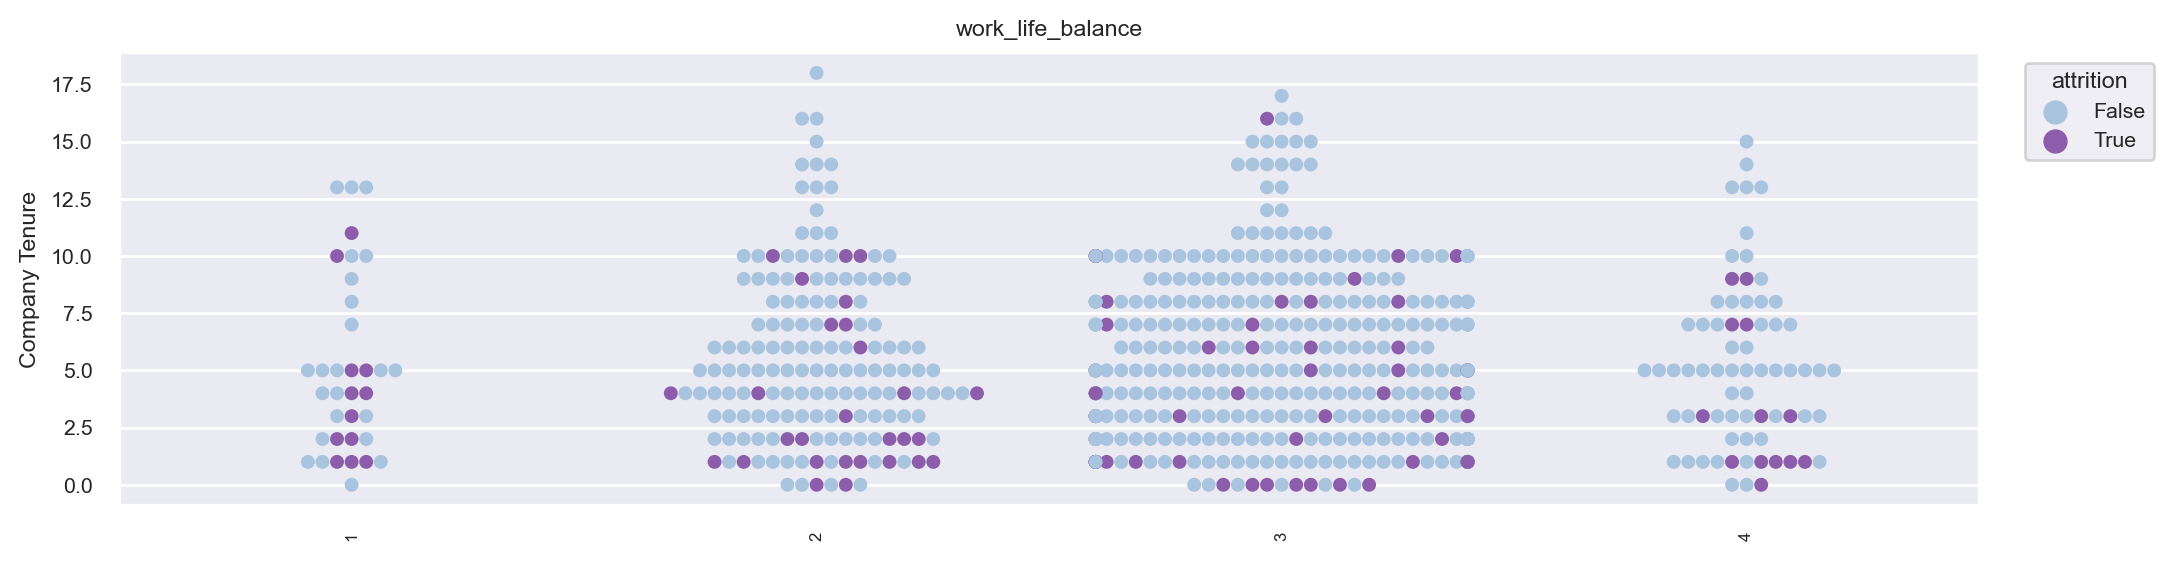

In [91]:
# sns.swarmplot

for col in disc_lst:
    plt.figure(figsize=(12, 3))
    sns.set(font_scale = .7)
    sns.swarmplot(x = col, y = "years_at_company", data = train, hue = "attrition", palette = "BuPu")

    plt.xlabel(None)
    plt.ylabel("Company Tenure")
    plt.xticks(fontsize = 6, rotation = 90)
    plt.title(col)

    plt.legend(
        bbox_to_anchor=(1.1, 1), 
        title = "attrition",
        loc = "upper right")
    plt.show()

In [105]:
# looping through discrete variables and conducting Chi-Squared test on target variable

alpha = 0.05
metrics = []

for col in disc_lst:
    # generating the ChiSquared Test and returning results
    observed = pd.crosstab(index = train[col], columns = train["attrition"], margins = True)

    chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

    if p_value < alpha:
        output = {
            "discrete_feature": col,
            "chi2": chi,
            "degs_of_freedom": degf,
            "p_value": p_value}
        
        metrics.append(output)

    else:
        print(f'variable: {col}')
        print('Not statistically significant.')
        print('---------------------------------------')

chi2_results = pd.DataFrame(metrics)
chi2_results.round(5)

variable: county_name
Not statistically significant.
---------------------------------------
variable: department
Not statistically significant.
---------------------------------------
variable: education
Not statistically significant.
---------------------------------------
variable: education_field
Not statistically significant.
---------------------------------------
variable: environment_satisfaction
Not statistically significant.
---------------------------------------
variable: gender
Not statistically significant.
---------------------------------------
variable: job_involvement
Not statistically significant.
---------------------------------------
variable: job_satisfaction
Not statistically significant.
---------------------------------------
variable: performance_rating
Not statistically significant.
---------------------------------------
variable: relationship_satisfaction
Not statistically significant.
---------------------------------------
variable: standard_hours
Not st

discrete_feature  chi2  degs_of_freedom  p_value
0           job_level 28.40                8     0.00
1            job_role 50.72               18     0.00
2      marital_status 21.84                6     0.00
3  stock_option_level 31.94                8     0.00

----

**``Chi_Squared results summary:``**

After initial discrete/categorical hypotheses testing against the "attrition" target variable - we can conclude that the following features/variables hold a statistical relationship with the target:

- job level
- job role
- marital status
- stop option level

<u>questions/thoughts after analysis:</u>

features such as job level and job role on its surface may not appear to be similar, however I presume that there may be some relationship amongst "titles"/"roles" and the level. For instance, certain job levels may only be applicable to a particular role such as a Director or Senior Vice President. 

I observe that there are only 4 distinct job levels and 9 distinct job roles at this company. On a second comb through of the data, I will want to conduct summary statistics and statistical testing across these features to investigate if there is any relationship amongst the independent variables.


----

#### **``Feature Selection & Scaling``**

In [103]:
# selecting statistically significant variables/features from testing

X_train = X_train[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_validate = X_validate[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_test = X_test[[
'job_level', 
'job_role', 
'marital_status', 
'stock_option_level',
'age',
'employment_rates_at_35yrs',
'high_school_graduation_rate',
'household_income_at_35',
'monthly_income',
'percentage_married_by_35',
'poverty_rate',
'total_working_years',
'women_teenage_birthrate',
'years_at_company',
'years_in_current_role',
'years_with_curr_manager']]

X_train.shape

(688, 16)